In [677]:
# Isaac Berez
# 17.01.23
import sys
from scipy.io import mmread
import os
import glob
import pandas as pd
import numpy as np
from pandas_ods_reader import read_ods
from copy import deepcopy
import pprint
import json
import re
from datetime import datetime
import logging
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn import preprocessing
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from collections import Counter
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import harmonypy as hm
from matplotlib.cm import ScalarMappable
from datetime import date
import mpld3
import hvplot.pandas
import holoviews as hv
from holoviews import opts
import panel as pn
import bokeh
from bokeh.resources import INLINE

import dimorph_processing as dp

today = str(date.today())
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Table of Contents
1. [Introduction](#introduction)
2. [Data Loading](#data_loading)
3. [GABA Analysis](#gaba_analysis)
4. [Vglut1 Analysis](#vglut1_analysis)
5. [Vglut2 Analysis](#vglut2_analysis)
6. [Nonneuronal Analysis](#nn_analysis)

In [2]:
status_df = dp.intialize_status_df()

## Introduction <a name="introduction"></a>

### This notebook compares the amygdala data from Hochgerner et al.  (https://www.nature.com/articles/s41593-023-01469-3) to the sexual dimorphism data analyzed in both "dimorph_processing_nb.ipynb" (level1) and "dimorph_cell_analysis_nb.ipynb" (level2)

### Data Loading - Load data from Hochgerner et al. <a name="data_loading"></a>

In [3]:
amy_df = pd.read_csv('/bigdata/isaac/amy_fc_data/Amy_FC_allcells_with_metadata_31-Jul-2022.txt', encoding='utf-8', delimiter='\t') 

/tmp/ipykernel_3595369/1820059393.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,2

In [118]:
amy_df.head()

cellID GGGTATTTCTCGCGTT-1_10-1 GGTAACTAGACATCCT-1_18-1  \
0  celltype     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
1    sample                    10-1                    18-1   
2   FC time                       2                       2   
3     batch                       1                       1   
4      Xkr4                       0                       0   

  GGTAATCGTGGACTAG-1_18-1 TTCCGGTAGTGGTGGT-1_18-1 AGGGTGAAGTACAACA-1_19-1  \
0     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
1                    18-1                    18-1                    19-1   
2                       2                       2                       2   
3                       1                       1                       1   
4                       0                       0                       0   

  AGTACCATCCCTGGTT-1_19-1 CATGAGTTCCGGCTTT-1_19-1 TTGCCTGAGACGGTTG-1_19-1  \
0     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
1                    19-1                    19-1                    19-1   
2                       2                       2                       2   
3                       1                       1                       1   
4                       0                       0                       0   

  AAACGCTTCACCATGA-1_23-1  ... TCGAACAAGGAGCTGT-1_76-1  \
0     GABA-11-Adora2a-Id4  ...                     pvm   
1                    23-1  ...                    76-1   
2                       0  ...                       2   
3                       1  ...                       3   
4                       0  ...                       0   

  TGTACAGTCTGCAGCG-1_76-1 AGGACTTTCATGGAGG-1_76-2 CCCATTGGTACCTAGT-1_76-2  \
0                     pvm                     pvm                     pvm   
1                    76-1                    76-2                    76-2   
2                       2                       2                       2   
3                       3                       3                       3   
4                       0                       0                       0   

  CTATCTACAATTGCTG-1_76-2 CTCATCGTCACCCATC-1_76-2 CTGCCATGTATCGCTA-1_76-2  \
0                     pvm                     pvm                     pvm   
1                    76-2                    76-2                    76-2   
2                       2                       2                       2   
3                       3                       3                       3   
4                       0                       0                       0   

  GCATGATTCTCGTCGT-1_76-2 TGGGCGTAGAAGCCAC-1_76-2 TTCTGTAGTGGTATGG-1_76-2  
0                     pvm                     pvm                     pvm  
1                    76-2                    76-2                    76-2  
2                       2                       2                       2  
3                       3                       3                       3  
4                       0                       0                       0  

[5 rows x 55515 columns]

In [119]:
type(amy_df.columns[1])

str

In [18]:
np.array(amy_df.iloc[:,1:2])

array([['GABA-11-Adora2a-Id4'],
       ['10-1'],
       ['2'],
       ...,
       [0],
       [0],
       [0]], dtype=object)

In [19]:
#save as feather for faster loading
#folder = '/bigdata/isaac/amy_fc_data/'
#amy_df = amy_df.astype(str)
#amy_df.to_feather(folder + 'amy_df.feather')

In [59]:
amy_df.columns

Index(['cellID', 'GGGTATTTCTCGCGTT-1_10-1', 'GGTAACTAGACATCCT-1_18-1',
       'GGTAATCGTGGACTAG-1_18-1', 'TTCCGGTAGTGGTGGT-1_18-1',
       'AGGGTGAAGTACAACA-1_19-1', 'AGTACCATCCCTGGTT-1_19-1',
       'CATGAGTTCCGGCTTT-1_19-1', 'TTGCCTGAGACGGTTG-1_19-1',
       'AAACGCTTCACCATGA-1_23-1',
       ...
       'TCGAACAAGGAGCTGT-1_76-1', 'TGTACAGTCTGCAGCG-1_76-1',
       'AGGACTTTCATGGAGG-1_76-2', 'CCCATTGGTACCTAGT-1_76-2',
       'CTATCTACAATTGCTG-1_76-2', 'CTCATCGTCACCCATC-1_76-2',
       'CTGCCATGTATCGCTA-1_76-2', 'GCATGATTCTCGTCGT-1_76-2',
       'TGGGCGTAGAAGCCAC-1_76-2', 'TTCTGTAGTGGTATGG-1_76-2'],
      dtype='object', length=55515)

In [60]:
amy_df = amy_df.set_index('cellID')

In [61]:
amy_df

GGGTATTTCTCGCGTT-1_10-1 GGTAACTAGACATCCT-1_18-1  \
cellID                                                           
celltype           GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                            10-1                    18-1   
FC time                              2                       2   
batch                                1                       1   
Xkr4                                 0                       0   
...                                ...                     ...   
AC168977.1                           0                       0   
PISD                                 9                       0   
DHRSX                                0                       0   
Vmn2r122                             0                       0   
CAAA01147332.1                       0                       0   

               GGTAATCGTGGACTAG-1_18-1 TTCCGGTAGTGGTGGT-1_18-1  \
cellID                                                           
celltype           GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                            18-1                    18-1   
FC time                              2                       2   
batch                                1                       1   
Xkr4                                 0                       0   
...                                ...                     ...   
AC168977.1                           0                       3   
PISD                                 0                       3   
DHRSX                                0                       0   
Vmn2r122                             0                       0   
CAAA01147332.1                       0                       0   

               AGGGTGAAGTACAACA-1_19-1 AGTACCATCCCTGGTT-1_19-1  \
cellID                                                           
celltype           GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                            19-1                    19-1   
FC time                              2                       2   
batch                                1                       1   
Xkr4                                 0                       0   
...                                ...                     ...   
AC168977.1                           0                       0   
PISD                                 8                       0   
DHRSX                                0                       0   
Vmn2r122                             0                       0   
CAAA01147332.1                       0                       0   

               CATGAGTTCCGGCTTT-1_19-1 TTGCCTGAGACGGTTG-1_19-1  \
cellID                                                           
celltype           GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                            19-1                    19-1   
FC time                              2                       2   
batch                                1                       1   
Xkr4                                 0                       0   
...                                ...                     ...   
AC168977.1                           0                       0   
PISD                                 0                       4   
DHRSX                                0                       4   
Vmn2r122                             0                       0   
CAAA01147332.1                       0                       0   

               AAACGCTTCACCATGA-1_23-1 TACCCACCAGTGACCC-1_23-1  ...  \
cellID                                                          ...   
celltype           GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4  ...   
sample                            23-1                    23-1  ...   
FC time                              0                       0  ...   
batch                                1                       1  ...   
Xkr4                                 0                       0  ...   
...                                ...                     ...  ...   
AC168977.1 

In [62]:
amy_df.shape

(28002, 55514)

In [63]:
np.unique(np.array(amy_df.loc['celltype']))

array(['Astro', 'Astro_SC', 'Astro_agt', 'COP', 'EC', 'Epend',
       'GABA-1-Foxp2_Fmod', 'GABA-10-Prkcd-Adora2a',
       'GABA-11-Adora2a-Id4', 'GABA-12-Adora2a-Scn4b',
       'GABA-13-Adora2a-Crh', 'GABA-14-Drd1-Scn4b', 'GABA-15-Drd1-Ebf1',
       'GABA-16-Prkcd-Nts', 'GABA-17-Pdyn-Ebf1', 'GABA-18-Isl1-Tac1',
       'GABA-19-Isl1-Aldoc', 'GABA-2-Foxp2_Adra2a',
       'GABA-20-Gpr101-Gabre', 'GABA-21-Vdr-Nts', 'GABA-22-Gal-Avp',
       'GABA-23-Fign-Lrpprc', 'GABA-24-Fign-Ucn3', 'GABA-25-Lhx8-Th',
       'GABA-26-Cbln4-Sst', 'GABA-27-Lhx6-Nxph2', 'GABA-28-Cbln4-Luzp2',
       'GABA-29-Prlr-Greb1', 'GABA-3-Foxp2_Col6a1', 'GABA-30-Prlr-Calcr',
       'GABA-31-Prlr-Cbln1', 'GABA-32-Prlr-Tac1', 'GABA-33-Prlr-St18',
       'GABA-34-Prlr-Satb1', 'GABA-35-Chodl-Moxd1', 'GABA-36-Sst-Fign',
       'GABA-37-Sst-Npy', 'GABA-38-Sst-Tmtc4', 'GABA-39-Sst-Nek7',
       'GABA-4-Foxp2_Htr1f', 'GABA-40-Rpb4-Sst', 'GABA-41-Moxd1-Pvalb',
       'GABA-42-Moxd1-Vwc2', 'GABA-43-Crabp1-Etv1', 'GABA-44-Pthlh

### seperate out metadata

In [64]:
amy_metadata_df = amy_df.iloc[:4,:]

### add "cell_class" row to metadata

In [65]:
cls = [x.split('-')[0] for x in np.array(amy_metadata_df.loc['celltype'])]

In [66]:
np.unique(cls)

array(['Astro', 'Astro_SC', 'Astro_agt', 'COP', 'EC', 'Epend', 'GABA',
       'OL', 'OPC', 'OPC_cycling', 'Peri', 'VGLUT1', 'VGLUT2', 'VLMC',
       'VSM', 'microglia', 'pvm'], dtype='<U11')

In [67]:
amy_metadata_df.loc['cell_class'] = cls

/tmp/ipykernel_3595369/1827095788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amy_metadata_df.loc['cell_class'] = cls


In [ ]:
#re.split(r"-|_",markers[0][0])[2:4]

In [69]:
markers = [re.split(r"-|_",x)[2:4] for x in np.array(amy_metadata_df.loc['celltype'])]
markers

[['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 'Id4'],
 ['Adora2a', 

In [70]:
amy_metadata_df.loc['markers'] = markers

/tmp/ipykernel_3595369/4262783576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amy_metadata_df.loc['markers'] = markers


In [71]:
amy_metadata_df

GGGTATTTCTCGCGTT-1_10-1 GGTAACTAGACATCCT-1_18-1  \
cellID                                                       
celltype       GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                        10-1                    18-1   
FC time                          2                       2   
batch                            1                       1   
cell_class                    GABA                    GABA   
markers             [Adora2a, Id4]          [Adora2a, Id4]   

           GGTAATCGTGGACTAG-1_18-1 TTCCGGTAGTGGTGGT-1_18-1  \
cellID                                                       
celltype       GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                        18-1                    18-1   
FC time                          2                       2   
batch                            1                       1   
cell_class                    GABA                    GABA   
markers             [Adora2a, Id4]          [Adora2a, Id4]   

           AGGGTGAAGTACAACA-1_19-1 AGTACCATCCCTGGTT-1_19-1  \
cellID                                                       
celltype       GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                        19-1                    19-1   
FC time                          2                       2   
batch                            1                       1   
cell_class                    GABA                    GABA   
markers             [Adora2a, Id4]          [Adora2a, Id4]   

           CATGAGTTCCGGCTTT-1_19-1 TTGCCTGAGACGGTTG-1_19-1  \
cellID                                                       
celltype       GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                        19-1                    19-1   
FC time                          2                       2   
batch                            1                       1   
cell_class                    GABA                    GABA   
markers             [Adora2a, Id4]          [Adora2a, Id4]   

           AAACGCTTCACCATGA-1_23-1 TACCCACCAGTGACCC-1_23-1  ...  \
cellID                                                      ...   
celltype       GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4  ...   
sample                        23-1                    23-1  ...   
FC time                          0                       0  ...   
batch                            1                       1  ...   
cell_class                    GABA                    GABA  ...   
markers             [Adora2a, Id4]          [Adora2a, Id4]  ...   

           TCGAACAAGGAGCTGT-1_76-1 TGTACAGTCTGCAGCG-1_76-1  \
cellID                                                       
celltype                       pvm                     pvm   
sample                        76-1                    76-1   
FC time                          2                       2   
batch                            3                       3   
cell_class                     pvm                     pvm   
markers                         []                      []   

           AGGACTTTCATGGAGG-1_76-2 CCCATTGGTACCTAGT-1_76-2  \
cellID                                                       
celltype                       pvm                     pvm   
sample                        76-2                    76-2   
FC time                          2                       2   
batch                            3                       3   
cell_class                     pvm                     pvm   
markers                         []                      []   

           CTATCTACAATTGCTG-1_76-2 CTCATCGTCACCCATC-1_76-2  \
cellID                                                       
celltype                       pvm                     pvm   
sample                        76-2                    76-2   
FC time                          2                       2   
batch                            3                       3   
cell_class                     pvm                     pvm   
markers                         []                      []

### cell classes of interest: GABA, Vglut1, Vglut2, NN = microglia + epend + astro

In [72]:
amy_df.head()

GGGTATTTCTCGCGTT-1_10-1 GGTAACTAGACATCCT-1_18-1  \
cellID                                                     
celltype     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                      10-1                    18-1   
FC time                        2                       2   
batch                          1                       1   
Xkr4                           0                       0   

         GGTAATCGTGGACTAG-1_18-1 TTCCGGTAGTGGTGGT-1_18-1  \
cellID                                                     
celltype     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                      18-1                    18-1   
FC time                        2                       2   
batch                          1                       1   
Xkr4                           0                       0   

         AGGGTGAAGTACAACA-1_19-1 AGTACCATCCCTGGTT-1_19-1  \
cellID                                                     
celltype     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                      19-1                    19-1   
FC time                        2                       2   
batch                          1                       1   
Xkr4                           0                       0   

         CATGAGTTCCGGCTTT-1_19-1 TTGCCTGAGACGGTTG-1_19-1  \
cellID                                                     
celltype     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                      19-1                    19-1   
FC time                        2                       2   
batch                          1                       1   
Xkr4                           0                       0   

         AAACGCTTCACCATGA-1_23-1 TACCCACCAGTGACCC-1_23-1  ...  \
cellID                                                    ...   
celltype     GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4  ...   
sample                      23-1                    23-1  ...   
FC time                        0                       0  ...   
batch                          1                       1  ...   
Xkr4                           0                       0  ...   

         TCGAACAAGGAGCTGT-1_76-1 TGTACAGTCTGCAGCG-1_76-1  \
cellID                                                     
celltype                     pvm                     pvm   
sample                      76-1                    76-1   
FC time                        2                       2   
batch                          3                       3   
Xkr4                           0                       0   

         AGGACTTTCATGGAGG-1_76-2 CCCATTGGTACCTAGT-1_76-2  \
cellID                                                     
celltype                     pvm                     pvm   
sample                      76-2                    76-2   
FC time                        2                       2   
batch                          3                       3   
Xkr4                           0                       0   

         CTATCTACAATTGCTG-1_76-2 CTCATCGTCACCCATC-1_76-2  \
cellID                                                     
celltype                     pvm                     pvm   
sample                      76-2                    76-2   
FC time                        2                       2   
batch                          3                       3   
Xkr4                           0                       0   

         CTGCCATGTATCGCTA-1_76-2 GCATGATTCTCGTCGT-1_76-2  \
cellID                                                     
celltype                     pvm                     pvm   
sample                      76-2                    76-2   
FC time                        2                       2   
batch                          3                       3   
Xkr4                           0                       0   

         TGGGCGTAGAAGCCAC-1_76-2 TTCTGTAGTGGTATGG-1_76-2  
cellID                                                    
celltype                     pvm                     pvm  
sample  

In [73]:
amy_df.loc['celltype'].index

Index(['GGGTATTTCTCGCGTT-1_10-1', 'GGTAACTAGACATCCT-1_18-1',
       'GGTAATCGTGGACTAG-1_18-1', 'TTCCGGTAGTGGTGGT-1_18-1',
       'AGGGTGAAGTACAACA-1_19-1', 'AGTACCATCCCTGGTT-1_19-1',
       'CATGAGTTCCGGCTTT-1_19-1', 'TTGCCTGAGACGGTTG-1_19-1',
       'AAACGCTTCACCATGA-1_23-1', 'TACCCACCAGTGACCC-1_23-1',
       ...
       'TCGAACAAGGAGCTGT-1_76-1', 'TGTACAGTCTGCAGCG-1_76-1',
       'AGGACTTTCATGGAGG-1_76-2', 'CCCATTGGTACCTAGT-1_76-2',
       'CTATCTACAATTGCTG-1_76-2', 'CTCATCGTCACCCATC-1_76-2',
       'CTGCCATGTATCGCTA-1_76-2', 'GCATGATTCTCGTCGT-1_76-2',
       'TGGGCGTAGAAGCCAC-1_76-2', 'TTCTGTAGTGGTATGG-1_76-2'],
      dtype='object', length=55514)

## GABA Analysis <a name="gaba_analysis"></a>

In [74]:
gaba_cols = [c for c,x in zip(amy_df.loc['celltype'].index,np.array(amy_df.loc['celltype'])) if 'GABA' in x]

In [75]:
amy_df_gaba = amy_df.loc[:,gaba_cols]

In [76]:
amy_df_gaba_expr = amy_df_gaba.iloc[4:,:]

In [77]:
amy_df_gaba_expr

GGGTATTTCTCGCGTT-1_10-1 GGTAACTAGACATCCT-1_18-1  \
cellID                                                           
Xkr4                                 0                       0   
Gm1992                               0                       0   
Gm37381                              0                       0   
Rp1                                  0                       0   
Rp1                                  0                       0   
...                                ...                     ...   
AC168977.1                           0                       0   
PISD                                 9                       0   
DHRSX                                0                       0   
Vmn2r122                             0                       0   
CAAA01147332.1                       0                       0   

               GGTAATCGTGGACTAG-1_18-1 TTCCGGTAGTGGTGGT-1_18-1  \
cellID                                                           
Xkr4                                 0                       0   
Gm1992                               0                       0   
Gm37381                              0                       0   
Rp1                                  0                       0   
Rp1                                  0                       0   
...                                ...                     ...   
AC168977.1                           0                       3   
PISD                                 0                       3   
DHRSX                                0                       0   
Vmn2r122                             0                       0   
CAAA01147332.1                       0                       0   

               AGGGTGAAGTACAACA-1_19-1 AGTACCATCCCTGGTT-1_19-1  \
cellID                                                           
Xkr4                                 0                       0   
Gm1992                               0                       0   
Gm37381                              0                       0   
Rp1                                  0                       0   
Rp1                                  0                       0   
...                                ...                     ...   
AC168977.1                           0                       0   
PISD                                 8                       0   
DHRSX                                0                       0   
Vmn2r122                             0                       0   
CAAA01147332.1                       0                       0   

               CATGAGTTCCGGCTTT-1_19-1 TTGCCTGAGACGGTTG-1_19-1  \
cellID                                                           
Xkr4                                 0                       0   
Gm1992                               0                       0   
Gm37381                              0                       0   
Rp1                                  0                       0   
Rp1                                  0                       0   
...                                ...                     ...   
AC168977.1                           0                       0   
PISD                                 0                       4   
DHRSX                                0                       4   
Vmn2r122                             0                       0   
CAAA01147332.1                       0                       0   

               AAACGCTTCACCATGA-1_23-1 TACCCACCAGTGACCC-1_23-1  ...  \
cellID                                                          ...   
Xkr4                                 0                       0  ...   
Gm1992                               0                       0  ...   
Gm37381                              0                       0  ...   
Rp1                                  0                       0  ...   
Rp1                                  0                       0  ...   
...                                ...                     ...  ...   
AC168977.1 

In [78]:
amy_metadata_df_gaba = amy_metadata_df.loc[:,gaba_cols]

### add "cluster_label" row to metadata

In [79]:
amy_gaba_cluster_labels = np.array(amy_metadata_df_gaba.loc['celltype'].apply(lambda x: int(re.search(r'-(\d+)-', x).group(1))))

In [80]:
np.unique(amy_gaba_cluster_labels)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56])

In [81]:
amy_metadata_df_gaba.loc['cluster_label'] = amy_gaba_cluster_labels

In [82]:
amy_metadata_df_gaba

GGGTATTTCTCGCGTT-1_10-1 GGTAACTAGACATCCT-1_18-1  \
cellID                                                          
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           10-1                    18-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              GGTAATCGTGGACTAG-1_18-1 TTCCGGTAGTGGTGGT-1_18-1  \
cellID                                                          
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           18-1                    18-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              AGGGTGAAGTACAACA-1_19-1 AGTACCATCCCTGGTT-1_19-1  \
cellID                                                          
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           19-1                    19-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              CATGAGTTCCGGCTTT-1_19-1 TTGCCTGAGACGGTTG-1_19-1  \
cellID                                                          
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           19-1                    19-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              AAACGCTTCACCATGA-1_23-1 TACCCACCAGTGACCC-1_23-1  ...  \
cellID                                                         ...   
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4  ...   
sample                           23-1                    23-1  ...   
FC time                             0                       0  ...   
batch                               1                       1  ...   
cell_class                       GABA                    GABA  ...   
markers                [Adora2a, Id4]          [Adora2a, Id4]  ...   
cluster_label                      11                      11  ...   

              GTCAAACTCCCGATCT-1_76-2 GTGTAACGTGAGACCA-1_76-2  \
cellID                                                          
celltype              GABA-51-Vip-Crh         GABA-51-Vip-Crh   
sample                           76-2                    76-2   
FC time                             2                       2   
batch                               2                       2   
cell_class                       GABA                    GABA   
markers                    [Vip, Crh]              [Vip, Crh]   
cluster_label                      51                      51   

              GTGTGATAGGTGAGAA-1_76-2 TACTTCAGTAACTAAG-1_76-2  \
cellID                                                          
celltype              GABA-51-Vip-Crh         GABA-51-Vip-Crh   
sample                           76-2                    76-2   
FC time                             2                       2   
batch                               2                       2   
cell_class                       GABA                    GABA  

In [83]:
amy_df_gaba_expr.shape

(27998, 13006)

In [84]:
amy_df_gaba_expr.head()

GGGTATTTCTCGCGTT-1_10-1 GGTAACTAGACATCCT-1_18-1  \
cellID                                                    
Xkr4                          0                       0   
Gm1992                        0                       0   
Gm37381                       0                       0   
Rp1                           0                       0   
Rp1                           0                       0   

        GGTAATCGTGGACTAG-1_18-1 TTCCGGTAGTGGTGGT-1_18-1  \
cellID                                                    
Xkr4                          0                       0   
Gm1992                        0                       0   
Gm37381                       0                       0   
Rp1                           0                       0   
Rp1                           0                       0   

        AGGGTGAAGTACAACA-1_19-1 AGTACCATCCCTGGTT-1_19-1  \
cellID                                                    
Xkr4                          0                       0   
Gm1992                        0                       0   
Gm37381                       0                       0   
Rp1                           0                       0   
Rp1                           0                       0   

        CATGAGTTCCGGCTTT-1_19-1 TTGCCTGAGACGGTTG-1_19-1  \
cellID                                                    
Xkr4                          0                       0   
Gm1992                        0                       0   
Gm37381                       0                       0   
Rp1                           0                       0   
Rp1                           0                       0   

        AAACGCTTCACCATGA-1_23-1 TACCCACCAGTGACCC-1_23-1  ...  \
cellID                                                   ...   
Xkr4                          0                       0  ...   
Gm1992                        0                       0  ...   
Gm37381                       0                       0  ...   
Rp1                           0                       0  ...   
Rp1                           0                       0  ...   

        GTCAAACTCCCGATCT-1_76-2 GTGTAACGTGAGACCA-1_76-2  \
cellID                                                    
Xkr4                          7                       0   
Gm1992                        0                       0   
Gm37381                       0                       0   
Rp1                           0                       0   
Rp1                           0                       0   

        GTGTGATAGGTGAGAA-1_76-2 TACTTCAGTAACTAAG-1_76-2  \
cellID                                                    
Xkr4                          6                       0   
Gm1992                        0                       0   
Gm37381                       0                       0   
Rp1                           0                       0   
Rp1                           0                       0   

        TCCGATCTCGTTTACT-1_76-2 TCGCTCAAGATTGAGT-1_76-2  \
cellID                                                    
Xkr4                          0                       0   
Gm1992                        0                       0   
Gm37381                       0                       0   
Rp1                           0                       0   
Rp1                           0                       0   

        TGCAGGCTCTTACACT-1_76-2 TTACAGGTCCGAGATT-1_76-2  \
cellID                                                    
Xkr4                          2                       0   
Gm1992                        0                       0   
Gm37381                       0                       0   
Rp1                           0                       0   
Rp1                           0                       0   

        TTGCGTCCAACACGAG-1_76-2 TTGCTGCAGCACTCCG-1_76-2  
cellID                                                   
Xkr4                          0                       0  
Gm1992                        0                       0  
Gm37381        

In [85]:
amy_df_gaba_expr[amy_df_gaba_expr.index.duplicated()][8:14]

GGGTATTTCTCGCGTT-1_10-1 GGTAACTAGACATCCT-1_18-1  \
cellID                                                   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   

       GGTAATCGTGGACTAG-1_18-1 TTCCGGTAGTGGTGGT-1_18-1  \
cellID                                                   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   

       AGGGTGAAGTACAACA-1_19-1 AGTACCATCCCTGGTT-1_19-1  \
cellID                                                   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   

       CATGAGTTCCGGCTTT-1_19-1 TTGCCTGAGACGGTTG-1_19-1  \
cellID                                                   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   

       AAACGCTTCACCATGA-1_23-1 TACCCACCAGTGACCC-1_23-1  ...  \
cellID                                                  ...   
Flg                          0                       0  ...   
Flg                          0                       0  ...   
Flg                          0                       0  ...   
Flg                          0                       0  ...   
Flg                          0                       0  ...   
Flg                          0                       0  ...   

       GTCAAACTCCCGATCT-1_76-2 GTGTAACGTGAGACCA-1_76-2  \
cellID                                                   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   

       GTGTGATAGGTGAGAA-1_76-2 TACTTCAGTAACTAAG-1_76-2  \
cellID                                                   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   

       TCCGATCTCGTTTACT-1_76-2 TCGCTCAAGATTGAGT-1_76-2  \
cellID                                                   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   
Flg                          0                       0   

       TGCAGGCTCTTACACT-1_76-2 TTACAGGTCCGAGATT-1_76-2  \
cellID                                                   
Flg                          0                       0   
Flg                          0                       0   
Flg            

In [86]:
print ('# duplicate gene rows: ', amy_df_gaba_expr[amy_df_gaba_expr.index.duplicated()].shape[0])

# duplicate gene rows:  65


### Remove duplicate gene rows, keeping first instance

In [87]:
amy_df_gaba_expr = amy_df_gaba_expr[~amy_df_gaba_expr.index.duplicated(keep='first')]

In [88]:
amy_df_gaba_expr.shape

(27933, 13006)

### remove IEG genes

In [89]:
IEG_list = []

with open('/bigdata/isaac/IEG_cluster.txt', 'r') as fh:
    for g in fh:
        IEG_list.append(g[:-1])

In [90]:
amy_df_gaba_expr = dp.gene_remover(IEG_list, amy_df_gaba_expr)

removing  53  genes found in  ['Btg2', 'Jun', 'Egr4', 'Fosb', 'Junb', 'Gadd45g', 'Fos', 'Arc', 'Nr4a1', 'Npas4', 'Coq10b', 'Tns1', 'Per2', 'Ptgs2', 'Rnd3', 'Tnfaip6', 'Srxn1', 'Tiparp', 'Ccnl1', 'Mcl1', 'Dnajb5', 'Nr4a3', 'Fosl2', 'Nptx2', 'Rasl11a', 'Mest', 'Sertad1', 'Egr2', 'Midn', 'Gadd45b', 'Dusp6', 'Irs2', 'Plat', 'Ier2', 'Rrad', 'Tpbg', 'Csrnp1', 'Peli1', 'Per1', 'Kdm6b', 'Inhba', 'Plk2', 'Ifrd1', 'Baz1a', 'Trib1', 'Pim3', 'Lrrk2', 'Dusp1', 'Cdkn1a', 'Pim1', 'Sik1', 'Frat2', 'Dusp5']


In [91]:
amy_df_gaba_expr.shape

(27880, 13006)

In [92]:
#ensure all values are integers
amy_df_gaba_expr = amy_df_gaba_expr.astype('int')

### Perform gene exclusion + feature selection to get high variable genes of interest for amy data

In [93]:
amy_df_gaba_bool = amy_df_gaba_expr.mask(amy_df_gaba_expr>0, other = 1)

In [94]:
amy_df_gaba_expr

GGGTATTTCTCGCGTT-1_10-1  GGTAACTAGACATCCT-1_18-1  \
cellID                                                             
Xkr4                                  0                        0   
Gm1992                                0                        0   
Gm37381                               0                        0   
Rp1                                   0                        0   
Sox17                                 0                        0   
...                                 ...                      ...   
AC168977.1                            0                        0   
PISD                                  9                        0   
DHRSX                                 0                        0   
Vmn2r122                              0                        0   
CAAA01147332.1                        0                        0   

                GGTAATCGTGGACTAG-1_18-1  TTCCGGTAGTGGTGGT-1_18-1  \
cellID                                                             
Xkr4                                  0                        0   
Gm1992                                0                        0   
Gm37381                               0                        0   
Rp1                                   0                        0   
Sox17                                 0                        0   
...                                 ...                      ...   
AC168977.1                            0                        3   
PISD                                  0                        3   
DHRSX                                 0                        0   
Vmn2r122                              0                        0   
CAAA01147332.1                        0                        0   

                AGGGTGAAGTACAACA-1_19-1  AGTACCATCCCTGGTT-1_19-1  \
cellID                                                             
Xkr4                                  0                        0   
Gm1992                                0                        0   
Gm37381                               0                        0   
Rp1                                   0                        0   
Sox17                                 0                        0   
...                                 ...                      ...   
AC168977.1                            0                        0   
PISD                                  8                        0   
DHRSX                                 0                        0   
Vmn2r122                              0                        0   
CAAA01147332.1                        0                        0   

                CATGAGTTCCGGCTTT-1_19-1  TTGCCTGAGACGGTTG-1_19-1  \
cellID                                                             
Xkr4                                  0                        0   
Gm1992                                0                        0   
Gm37381                               0                        0   
Rp1                                   0                        0   
Sox17                                 0                        0   
...                                 ...                      ...   
AC168977.1                            0                        0   
PISD                                  0                        4   
DHRSX                                 0                        4   
Vmn2r122                              0                        0   
CAAA01147332.1                        0                        0   

                AAACGCTTCACCATGA-1_23-1  TACCCACCAGTGACCC-1_23-1  ...  \
cellID                                                            ...   
Xkr4                                  0                        0  ...   
Gm1992                                0                        0  ...   
Gm37381                               0                        0  ...   
Rp1                                   0                        0  ...   
Sox17                                 

In [95]:
amy_df_gaba_expr_ge, amy_df_gaba_bool, amy_metadata_df_gaba, status_df = dp.gene_exclusion(num_cell_lwr_bound=10,
                                                      percent_cell_upper_bound=50,
                                                     df_bool=amy_df_gaba_bool,
                                                     df = amy_df_gaba_expr,
                                                     meta_data_df = amy_metadata_df_gaba,
                                                     status_df = status_df)

Total genes reduced from 27880 to 14303


In [96]:
amy_df_gaba_expr_ge.shape

(14303, 13006)

<IPython.core.display.Javascript object>


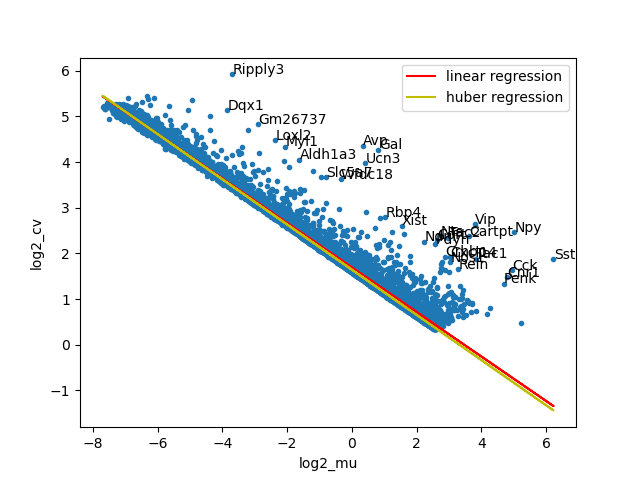

In [97]:
amy_gaba_cv_df = dp.analyze_cv(df = amy_df_gaba_expr_ge,
                      norm_scale_factor=20000,
                      num_top_genes=30,
                      plot_flag=1,
                     use_huber = True)

<IPython.core.display.Javascript object>


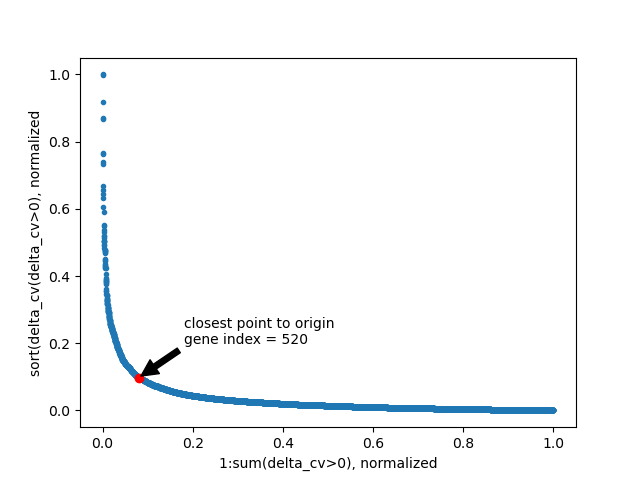

In [98]:
amy_gaba_gene_index, amy_df_gaba_expr_ge_cv, status_df = dp.get_top_cv_genes(df = amy_df_gaba_expr_ge, cv_df=amy_gaba_cv_df, plot_flag=1, status_df=status_df)

### log and standerdize amy_df_gaba_expr to match gaba_df_prelinkage_ls

In [99]:
amy_arr_gaba_expr_ge_cv_ls,status_df = dp.log_and_standerdize_df(amy_df_gaba_expr_ge_cv,status_df)

column (gene) mean after standardization: -0.00
column (gene) sigma after standardization: 1.00


In [100]:
#put outputted log/standerdized array back into dataframe format
amy_df_gaba_expr_ge_cv_ls = pd.DataFrame(data=amy_arr_gaba_expr_ge_cv_ls.T, index=amy_df_gaba_expr_ge_cv.index, columns=amy_df_gaba_expr_ge_cv.columns)

In [101]:
amy_df_gaba_expr_ge_cv_ls.shape

(520, 13006)

In [102]:
amy_df_gaba_expr_ge_cv_ls.head()

GGGTATTTCTCGCGTT-1_10-1  GGTAACTAGACATCCT-1_18-1  \
cellID                                                     
Sst                   -0.545385                 0.306249   
Npy                    1.105514                -0.442248   
Gal                   -0.112651                -0.112651   
Avp                   -0.108845                -0.108845   
Vip                   -0.222700                -0.222700   

        GGTAATCGTGGACTAG-1_18-1  TTCCGGTAGTGGTGGT-1_18-1  \
cellID                                                     
Sst                   -0.545385                -0.545385   
Npy                   -0.442248                -0.442248   
Gal                   -0.112651                -0.112651   
Avp                   -0.108845                -0.108845   
Vip                   -0.222700                -0.222700   

        AGGGTGAAGTACAACA-1_19-1  AGTACCATCCCTGGTT-1_19-1  \
cellID                                                     
Sst                   -0.545385                -0.545385   
Npy                   -0.442248                -0.442248   
Gal                   -0.112651                -0.112651   
Avp                   -0.108845                -0.108845   
Vip                   -0.222700                -0.222700   

        CATGAGTTCCGGCTTT-1_19-1  TTGCCTGAGACGGTTG-1_19-1  \
cellID                                                     
Sst                   -0.545385                 1.157884   
Npy                   -0.442248                -0.442248   
Gal                   -0.112651                -0.112651   
Avp                   -0.108845                -0.108845   
Vip                   -0.222700                -0.222700   

        AAACGCTTCACCATGA-1_23-1  TACCCACCAGTGACCC-1_23-1  ...  \
cellID                                                    ...   
Sst                   -0.545385                 0.443332  ...   
Npy                   -0.442248                -0.442248  ...   
Gal                   -0.112651                -0.112651  ...   
Avp                   -0.108845                -0.108845  ...   
Vip                   -0.222700                -0.222700  ...   

        GTCAAACTCCCGATCT-1_76-2  GTGTAACGTGAGACCA-1_76-2  \
cellID                                                     
Sst                   -0.545385                -0.545385   
Npy                   -0.442248                -0.442248   
Gal                   -0.112651                -0.112651   
Avp                   -0.108845                -0.108845   
Vip                    4.745730                 5.499811   

        GTGTGATAGGTGAGAA-1_76-2  TACTTCAGTAACTAAG-1_76-2  \
cellID                                                     
Sst                   -0.545385                -0.545385   
Npy                   -0.442248                -0.442248   
Gal                   -0.112651                -0.112651   
Avp                   -0.108845                -0.108845   
Vip                    5.231021                 4.307494   

        TCCGATCTCGTTTACT-1_76-2  TCGCTCAAGATTGAGT-1_76-2  \
cellID                                                     
Sst                   -0.545385                -0.545385   
Npy                   -0.442248                -0.442248   
Gal                   -0.112651                -0.112651   
Avp                   -0.108845                -0.108845   
Vip                    5.422867                 4.210936   

        TGCAGGCTCTTACACT-1_76-2  TTACAGGTCCGAGATT-1_76-2  \
cellID                                                     
Sst                   -0.545385                -0.545385   
Npy                   -0.442248                -0.442248   
Gal                   -0.112651                -0.112651   
Avp                   -0.108845                -0.108845   
Vip                    5.386956                 5.816290   

        TTGCGTCCAACACGAG-1_76-2  TTGCTGCAGCACTCCG-1_76-2  
cellID                                                    
Sst                   -0.545385                -0.545385  
Npy    

In [ ]:
#save to file

#folder = '/bigdata/isaac/gaba_files/'

#file1 = 'amy_df_gaba_expr_ge_cv_ls_orig' 
#file2 = 'amy_metadata_df_gaba_orig' 

#amy_df_gaba_expr_ge_cv_ls.to_feather(folder+file1+'.feather')
#amy_metadata_df_gaba.to_json(folder+file2+'.json')

In [103]:
folder = '/bigdata/isaac/gaba_files/'

In [104]:
amy_df_gaba_expr_ge_cv_ls_orig = pd.read_feather(folder + 'amy_df_gaba_expr_ge_cv_ls_orig.feather')
amy_metadata_df_gaba_orig = pd.read_json(folder + 'amy_metadata_df_gaba_orig.json')

### Load gaba_df_prelinkage_ls saved from "dimorph_cell_analysis_nb.ipynb"
### already has feature selected genes

In [626]:
#gaba_df_marker = pd.read_feather('/bigdata/isaac/gaba_files/gaba_df_marker_2024-06-07.feather')
gaba_meta_data_df_plis = pd.read_json('/bigdata/isaac/gaba_files/gaba_meta_data_df_plis2024-06-07.json')

gaba_df_prelinkage_ls_orig = pd.read_feather('/bigdata/isaac/gaba_files/gaba_df_pre_linkage_ls_2024-06-04.feather')
gaba_metadata_df_prelinkage_ls_orig = pd.read_json('/bigdata/isaac/gaba_files/gaba_meta_data_df_pre_linkage_2024-06-04.json')


In [106]:
lco = pd.unique(gaba_meta_data_df_plis.loc['cluster_label'])
lco

array([31, 12, 42, 43, 40, 39, 36, 55, 65, 33, 16, 38, 2, 20, 35, 0, 14,
       4, 5, 3, 15, 11, 10, 6, 21, 41, 37, 25, 18, 26, 22, 27, 24, 28, 8,
       7, 19, 17, 44, 46, 45, 9, 47, 50, 23, 1, 13, 29, 30, 32, 56, 51,
       57, 53, 48, 49, 59, 58, 61, 60, 63, 62, 54, 34, 64, 52],
      dtype=object)

In [107]:
pd.unique(gaba_metadata_df_prelinkage_ls_orig.loc['cluster_label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65], dtype=object)

In [627]:
gaba_df_prelinkage_ls_orig.shape

(13529, 559)

In [628]:
gaba_df_prelinkage_ls_orig = dp.gene_remover(IEG_list, gaba_df_prelinkage_ls_orig)

removing  0  genes found in  ['Btg2', 'Jun', 'Egr4', 'Fosb', 'Junb', 'Gadd45g', 'Fos', 'Arc', 'Nr4a1', 'Npas4', 'Coq10b', 'Tns1', 'Per2', 'Ptgs2', 'Rnd3', 'Tnfaip6', 'Srxn1', 'Tiparp', 'Ccnl1', 'Mcl1', 'Dnajb5', 'Nr4a3', 'Fosl2', 'Nptx2', 'Rasl11a', 'Mest', 'Sertad1', 'Egr2', 'Midn', 'Gadd45b', 'Dusp6', 'Irs2', 'Plat', 'Ier2', 'Rrad', 'Tpbg', 'Csrnp1', 'Peli1', 'Per1', 'Kdm6b', 'Inhba', 'Plk2', 'Ifrd1', 'Baz1a', 'Trib1', 'Pim3', 'Lrrk2', 'Dusp1', 'Cdkn1a', 'Pim1', 'Sik1', 'Frat2', 'Dusp5']


In [629]:
gaba_df_prelinkage_ls_orig = gaba_df_prelinkage_ls_orig.T

In [109]:
gaba_df_prelinkage_ls_orig.shape

(559, 13529)

In [110]:
gaba_df_prelinkage_ls_orig.head()

CCGGGTAGTGTTGAGG-1_10X51_3  TCTAACTAGTGGCCTC-1_10X36_1  \
gene                                                             
Avp                      -0.201913                   -0.201913   
Vip                      -0.154338                   -0.154338   
Sst                      -0.395937                   -0.395937   
Cartpt                   -0.487214                   -0.487214   
Ucn3                     -0.158813                   -0.158813   

        CTATCCGGTAAGGTCG-1_10X51_2  AGCGATTGTGTCTAAC-1_10X52_1  \
gene                                                             
Avp                       2.945428                   -0.201913   
Vip                      -0.154338                   -0.154338   
Sst                       1.929167                    1.804529   
Cartpt                   -0.487214                   -0.487214   
Ucn3                     -0.158813                   -0.158813   

        TCGGATAGTAGGAAAG-1_10X37_1  TTACGTTGTATCAAGA-1_10X37_2  \
gene                                                             
Avp                      -0.201913                   -0.201913   
Vip                      -0.154338                   -0.154338   
Sst                       2.318293                   -0.395937   
Cartpt                   -0.487214                   -0.487214   
Ucn3                     -0.158813                   -0.158813   

        GGGCGTTAGCGTATAA-1_10X51_1  TAGACCACAGTCCGTG-1_10X51_1  \
gene                                                             
Avp                      -0.201913                   -0.201913   
Vip                      -0.154338                   -0.154338   
Sst                       1.929167                    2.774148   
Cartpt                   -0.487214                   -0.487214   
Ucn3                     -0.158813                   -0.158813   

        CTACTATAGCCTGAGA-1_10X38_1  TCACGGGGTATCACGT-1_10X38_1  ...  \
gene                                                            ...   
Avp                      -0.201913                   -0.201913  ...   
Vip                      -0.154338                   -0.154338  ...   
Sst                      -0.395937                   -0.395937  ...   
Cartpt                   -0.487214                   -0.487214  ...   
Ucn3                      1.443596                   -0.158813  ...   

        TTGAGTGTCAGTGCGC-1_10X36_1  CGCAGGTCATCGATGT-1_10X37_1  \
gene                                                             
Avp                      -0.201913                   -0.201913   
Vip                      -0.154338                   -0.154338   
Sst                       1.663226                    1.929167   
Cartpt                    0.178540                   -0.487214   
Ucn3                     -0.158813                   -0.158813   

        ATCGTAGAGAAGCTCG-1_10X52_2  GCAGCTGGTGTGTCCG-1_10X52_3  \
gene                                                             
Avp                      -0.201913                   -0.201913   
Vip                      -0.154338                   -0.154338   
Sst                       1.929167                    2.318293   
Cartpt                   -0.487214                   -0.487214   
Ucn3                     -0.158813                   -0.158813   

        CATACCCCAGTTTCGA-1_10X52_1  ACCCAAAAGCATTGAA-1_10X38_1  \
gene                                                             
Avp                      -0.201913                   -0.201913   
Vip                      -0.154338                   -0.154338   
Sst                       2.233592                    2.825778   
Cartpt                   -0.487214                   -0.487214   
Ucn3                     -0.158813                   -0.158813   

        CAGCGTGAGCCACAAG-1_10X51_2  AATTCCTGTGAATTAG-1_10X51_1  \
gene                                                             
Avp                      -0.201913                   -0.201913   
Vip                      -0.154338                   -0.154338   
Sst  

In [112]:
gaba_metadata_df_prelinkage_ls_orig.tail()

CCGGGTAGTGTTGAGG-1_10X51_3 TCTAACTAGTGGCCTC-1_10X36_1  \
ngperul_seqlib                        22.0                       11.4   
lengthbp_seqlib                      487.0                      476.0   
Sample_Index                            B2                         H8   
cell_class                            GABA                       GABA   
cluster_label                            0                          0   

                CTATCCGGTAAGGTCG-1_10X51_2 AGCGATTGTGTCTAAC-1_10X52_1  \
ngperul_seqlib                        22.2                       15.7   
lengthbp_seqlib                      474.0                      466.0   
Sample_Index                            A2                        D12   
cell_class                            GABA                       GABA   
cluster_label                            0                          0   

                TCGGATAGTAGGAAAG-1_10X37_1 TTACGTTGTATCAAGA-1_10X37_2  \
ngperul_seqlib                        15.9                       16.0   
lengthbp_seqlib                      440.0                      460.0   
Sample_Index                            E9                         F9   
cell_class                            GABA                       GABA   
cluster_label                            0                          0   

                GGGCGTTAGCGTATAA-1_10X51_1 TAGACCACAGTCCGTG-1_10X51_1  \
ngperul_seqlib                        19.2                       19.2   
lengthbp_seqlib                      478.0                      478.0   
Sample_Index                            G1                         G1   
cell_class                            GABA                       GABA   
cluster_label                            0                          0   

                CTACTATAGCCTGAGA-1_10X38_1 TCACGGGGTATCACGT-1_10X38_1  ...  \
ngperul_seqlib                        15.0                       15.0  ...   
lengthbp_seqlib                      420.0                      420.0  ...   
Sample_Index                            B9                         B9  ...   
cell_class                            GABA                       GABA  ...   
cluster_label                            0                          0  ...   

                TTGAGTGTCAGTGCGC-1_10X36_1 CGCAGGTCATCGATGT-1_10X37_1  \
ngperul_seqlib                        11.4                       15.9   
lengthbp_seqlib                      476.0                      440.0   
Sample_Index                            H8                         E9   
cell_class                            GABA                       GABA   
cluster_label                           65                         65   

                ATCGTAGAGAAGCTCG-1_10X52_2 GCAGCTGGTGTGTCCG-1_10X52_3  \
ngperul_seqlib                        17.5          20.4(second prep)   
lengthbp_seqlib                      440.0                      507.0   
Sample_Index                           E12                        F12   
cell_class                            GABA                       GABA   
cluster_label                           65                         65   

                CATACCCCAGTTTCGA-1_10X52_1 ACCCAAAAGCATTGAA-1_10X38_1  \
ngperul_seqlib                        15.7                       15.0   
lengthbp_seqlib                      466.0                      420.0   
Sample_Index                           D12                         B9   
cell_class                            GABA                       GABA   
cluster_label                           65                         65   

                CAGCGTGAGCCACAAG-1_10X51_2 AATTCCTGTGAATTAG-1_10X51_1  \
ngperul_seqlib                        22.2                       19.2   
lengthbp_seqlib                      474.0                      478.0   
Sample_Index                            A2                         G1   
cell_class                            GABA                       GABA   
cluster_label                           65                         65   

                GACCTTCGTATGAGGC-1_

### Get Gene index shared by both datasets, then isolate only these genes from each

In [113]:
amy_df_gaba_expr_ge_cv_ls_orig.index

Index(['Sst', 'Npy', 'Gal', 'Avp', 'Vip', 'Ucn3', 'Cartpt', 'Ripply3', 'Cck',
       'Cnr1',
       ...
       'Pdzrn4', 'Krt12', 'Ppargc1a', 'Sowaha', 'Gm26822', 'Mdfic', 'Pld5',
       'Kcnip4', 'Tppp3', 'Lhfp'],
      dtype='object', name='cellID', length=520)

In [114]:
gaba_df_prelinkage_ls_orig.index

Index(['Avp', 'Vip', 'Sst', 'Cartpt', 'Ucn3', 'Nts', 'Gal', 'Cck', 'Npy',
       'Cort',
       ...
       'Tox', 'Pgr15l', 'Pex5l', 'Sema6d', 'Igsf1', 'Glra2', 'Dpy19l1',
       'Anxa2', 'Rnase4', 'Etv4'],
      dtype='object', name='gene', length=559)

In [115]:
#change to union?
intersected_gene_ind = amy_df_gaba_expr_ge_cv_ls_orig.index.intersection(gaba_df_prelinkage_ls_orig.index)
intersected_gene_ind

Index(['Sst', 'Npy', 'Gal', 'Avp', 'Vip', 'Ucn3', 'Cartpt', 'Ripply3', 'Cck',
       'Cnr1',
       ...
       'Nbl1', 'Jsrp1', 'Sostdc1', 'Shisa6', 'Fam19a2', 'Pdlim5', 'Ppargc1a',
       'Pld5', 'Kcnip4', 'Lhfp'],
      dtype='object', length=378)

In [116]:
amy_df_gaba_expr_ge_cv = amy_df_gaba_expr_ge_cv_ls_orig.reindex(index = intersected_gene_ind)
gaba_df_prelinkage_ls = gaba_df_prelinkage_ls_orig.reindex(index = intersected_gene_ind)

In [117]:
amy_df_gaba_expr_ge_cv.shape

(378, 13006)

In [118]:
gaba_df_prelinkage_ls.shape

(378, 13529)

### Checkpoint - save intersected data/metadata to file / load from here

In [119]:
folder

'/bigdata/isaac/gaba_files/'

In [ ]:
#save to file

#folder = '/bigdata/isaac/gaba_files/'

#file1 = 'amy_df_gaba_expr_ge_cv_ls_cell_comp' 
#file2 = 'amy_metadata_df_gaba_cell_comp' 

#amy_df_gaba_expr_ge_cv_ls.to_feather(folder+file1+'.feather')
#amy_metadata_df_gaba.to_json(folder+file2+'.json')

#################################

#file1 = 'gaba_df_prelinkage_ls_cell_comp' 
#file2 = 'gaba_meta_data_df_prelinkage_cell_comp' 

#gaba_df_prelinkage_ls.to_feather(folder+file1+'.feather')
#gaba_meta_data_df_pre_linkage.to_json(folder+file2+'.json')


In [120]:
#load data
folder = '/bigdata/isaac/gaba_files/'

amy_df_gaba_expr_ge_cv_ls = pd.read_feather(folder + 'amy_df_gaba_expr_ge_cv_ls_cell_comp.feather')
amy_metadata_df_gaba = pd.read_json(folder + 'amy_metadata_df_gaba_cell_comp.json')

gaba_df_prelinkage_ls = pd.read_feather(folder + 'gaba_df_prelinkage_ls_cell_comp.feather')
gaba_meta_data_df_prelinkage = pd.read_json(folder + 'gaba_meta_data_df_prelinkage_cell_comp.json' )

### Compute avg expression for all genes, for every cluster

In [121]:
amy_avgs = dp.compute_avg_expr_per_cluster_label(amy_df_gaba_expr_ge_cv_ls,amy_metadata_df_gaba)

In [122]:
amy_avgs

1         2         3         4         5         6   \
Sst      -0.155349 -0.280595 -0.455989 -0.492804 -0.148882 -0.314029   
Npy      -0.359158  -0.22505  0.068509  0.900939 -0.086038 -0.150077   
Gal      -0.112651 -0.112651 -0.089581 -0.112651 -0.074812 -0.069099   
Avp      -0.108845 -0.071297 -0.028345 -0.108845 -0.052378 -0.021984   
Vip      -0.211028  -0.20211 -0.196752 -0.158658 -0.172872 -0.205202   
...            ...       ...       ...       ...       ...       ...   
Pdlim5   -0.213751  0.238679 -0.262204 -0.221797 -0.258688 -0.112715   
Ppargc1a  0.367969 -0.343563 -0.508327  -0.56609 -0.381029 -0.377084   
Pld5       0.36542  0.951358 -0.240701 -0.005046  0.487558  0.130078   
Kcnip4    0.535392  0.517315  0.247973  0.685572  0.714297  0.258686   
Lhfp     -0.107726 -0.149704 -0.015354 -0.075132 -0.110292 -0.107323   

                7         8         9         10  ...        47        48  \
Sst       0.423542 -0.263417 -0.395131 -0.501013  ...  0.155029 -0.447587   
Npy       -0.38883 -0.387799 -0.364963 -0.282428  ... -0.333043 -0.372397   
Gal      -0.112651 -0.087391 -0.068467 -0.112651  ... -0.097408 -0.105911   
Avp      -0.073287 -0.055146  -0.05929 -0.052248  ... -0.086099 -0.053048   
Vip      -0.204007  -0.19946 -0.199775 -0.193786  ... -0.172384 -0.192407   
...            ...       ...       ...       ...  ...       ...       ...   
Pdlim5   -0.231641 -0.040965  0.636983 -0.275033  ... -0.089209 -0.245919   
Ppargc1a -0.113144 -0.000711  0.085683  0.054693  ...   0.26656  0.462964   
Pld5       0.07014 -0.385895 -0.406659 -0.206469  ... -0.077231 -0.328914   
Kcnip4   -0.060652 -0.047448  0.049714  0.321894  ... -0.681736  0.666536   
Lhfp     -0.166229 -0.150522 -0.122178 -0.051377  ... -0.081822  0.020414   

                49        50        51        52        53        54  \
Sst      -0.450272 -0.514228 -0.427441 -0.440583 -0.451893 -0.427688   
Npy      -0.366435 -0.401907 -0.352834 -0.374402 -0.396366 -0.403158   
Gal      -0.050846  0.248763 -0.100601 -0.041433 -0.112651 -0.112651   
Avp       0.014219  0.012632  0.005873 -0.026616  -0.08045 -0.026667   
Vip      -0.048683   2.22628  4.872482   -0.2227 -0.116881  0.244626   
...            ...       ...       ...       ...       ...       ...   
Pdlim5   -0.256575 -0.021224  0.016749 -0.197397 -0.220275  -0.12304   
Ppargc1a  0.207191 -0.251954 -0.049666 -0.366242 -0.364607 -0.226413   
Pld5      0.729462  0.605465 -0.204186 -0.336766 -0.136654 -0.280694   
Kcnip4    0.522226 -0.083875  0.150193 -0.050973 -0.617036  0.345685   
Lhfp     -0.080104  0.418846   -0.1343 -0.166229 -0.047641 -0.082517   

                55        56  
Sst      -0.345629 -0.444237  
Npy      -0.264757 -0.154209  
Gal      -0.112651   -0.0807  
Avp      -0.108845 -0.067684  
Vip       3.712796    -0.111  
...            ...       ...  
Pdlim5   -0.148883  0.892313  
Ppargc1a -0.300026  -0.28419  
Pld5     -0.142431 -0.358911  
Kcnip4    0.713779 -0.487957  
Lhfp     -0.106776  0.000309  

[378 rows x 56 columns]

In [123]:
sd_avgs = dp.compute_avg_expr_per_cluster_label(gaba_df_prelinkage_ls,gaba_meta_data_df_prelinkage)

In [124]:
sd_avgs

0         1         2         3         4         5   \
Sst      -0.052799 -0.335815 -0.350333 -0.355693 -0.383913 -0.355985   
Npy      -0.283375 -0.266134 -0.274041 -0.277158 -0.251861 -0.277019   
Gal      -0.126186 -0.074353  0.206326 -0.121254 -0.126186 -0.126186   
Avp       0.125462 -0.006238 -0.049596  0.012925 -0.072924  0.011349   
Vip      -0.140506 -0.154338 -0.154338 -0.141714 -0.154338 -0.146863   
...            ...       ...       ...       ...       ...       ...   
Pdlim5    -0.11998 -0.189726 -0.149567  -0.18336 -0.089394  -0.17088   
Ppargc1a  0.235094  0.649442 -0.308002   0.18521 -0.250753 -0.095112   
Pld5     -0.278213 -0.290832 -0.170091 -0.381998  0.077507  0.216949   
Kcnip4    0.348098 -0.235703 -0.318286  0.679367 -0.318462  0.103619   
Lhfp     -0.061433  0.611826  0.339463 -0.119438 -0.200898 -0.038214   

                6         7         8         9   ...        56        57  \
Sst      -0.340964  -0.19556 -0.265766 -0.236357  ... -0.345609 -0.358898   
Npy      -0.264008 -0.249343 -0.260414 -0.258252  ... -0.254232 -0.279362   
Gal      -0.115208 -0.086827 -0.126186 -0.037761  ... -0.126186 -0.126186   
Avp       0.023045 -0.097437  0.052388   0.03684  ... -0.093788  0.046217   
Vip      -0.148718 -0.143694 -0.148833 -0.150188  ...  6.180234  0.292554   
...            ...       ...       ...       ...  ...       ...       ...   
Pdlim5   -0.161391 -0.155866 -0.056705 -0.147878  ...  0.067439   0.64145   
Ppargc1a  -0.21442 -0.241566 -0.379606  0.034571  ... -0.370182 -0.106719   
Pld5      0.506481  0.246273  0.035793 -0.234992  ... -0.230746 -0.386371   
Kcnip4    0.194134  0.035256  0.159885   0.24254  ... -0.105421 -0.326052   
Lhfp     -0.178235 -0.152353 -0.116703  0.070704  ... -0.177504 -0.133191   

                58        59        60        61        62        63  \
Sst      -0.361009 -0.373029  0.168473  -0.35041  3.078125  -0.03385   
Npy      -0.083082  0.189093  0.126427 -0.287002  3.211631  0.065238   
Gal      -0.126186 -0.126186 -0.105983 -0.126186 -0.091943 -0.126186   
Avp      -0.201913  -0.02162 -0.085422 -0.071679 -0.099653 -0.047967   
Vip      -0.128649 -0.138424 -0.143997 -0.154338 -0.148495 -0.154338   
...            ...       ...       ...       ...       ...       ...   
Pdlim5    1.137411  2.250012 -0.150619 -0.161587 -0.160266 -0.145376   
Ppargc1a -0.106876 -0.580984  1.162206  1.274981   0.27052  0.336414   
Pld5      0.332568  0.861317 -0.348903  -0.39976 -0.222383 -0.267581   
Kcnip4   -0.788783 -0.521333 -0.664137 -0.800358 -0.669239 -0.630478   
Lhfp     -0.149097 -0.174738  0.073733  0.181716 -0.123317  -0.15505   

                64        65  
Sst       3.957141  1.575562  
Npy       3.251905  1.751706  
Gal      -0.126186 -0.126186  
Avp      -0.201913   0.04019  
Vip      -0.154338 -0.154338  
...            ...       ...  
Pdlim5    0.050282 -0.189726  
Ppargc1a  0.719777 -0.197765  
Pld5     -0.313061 -0.352265  
Kcnip4    0.099243 -0.284288  
Lhfp     -0.200898 -0.200898  

[378 rows x 66 columns]

In [125]:
sd_avgs.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
      dtype='object')

In [126]:
np.unique(np.array(gaba_meta_data_df_prelinkage.loc['cluster_label']))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65], dtype=object)

### Compute pearson correlation coeffcient for every column between avg expr datasets

corr_matrix_manual = dim(sd_avgs x amy_avgs)

In [127]:
# Initialize an empty dataframe to hold the correlation coefficients
corr_matrix_manual = pd.DataFrame(index=sd_avgs.columns, columns=amy_avgs.columns)

# Compute the correlation coefficients
for col1 in sd_avgs.columns:
    for col2 in amy_avgs.columns:
        corr_matrix_manual.loc[col1, col2] = sd_avgs[col1].corr(amy_avgs[col2])

In [128]:
corr_matrix_manual.shape

(66, 56)

In [129]:
corr_matrix_manual

1         2         3         4         5         6         7   \
0   -0.01201  0.020433   0.06362  -0.02082  0.000904  0.027228  0.034012   
1    0.08766 -0.039294 -0.034626 -0.013889 -0.004004 -0.069779  0.044852   
2   0.084488  0.032233  0.093602  0.166215  0.187083  0.114193  0.165848   
3   0.175915   0.19637  0.155996  0.099051  0.128262  0.006573  0.079272   
4   0.051464  0.081996  0.149322   0.24157   0.41849  0.237807   0.35341   
..       ...       ...       ...       ...       ...       ...       ...   
61 -0.104907 -0.137763 -0.173484 -0.163342 -0.263405 -0.211678 -0.229007   
62 -0.101302 -0.171687 -0.226034 -0.195269 -0.288026 -0.229857 -0.188199   
63 -0.059025 -0.187182 -0.280098 -0.283435 -0.349985 -0.302309 -0.282447   
64 -0.054707 -0.126893 -0.159199 -0.112919 -0.173601 -0.170755 -0.109088   
65 -0.043558 -0.105922 -0.108965 -0.108461 -0.175166 -0.182968 -0.097166   

          8         9         10  ...        47        48        49        50  \
0   -0.06181  0.142248  0.164479  ...   0.04024  0.159923 -0.092633 -0.031112   
1   0.064597   -0.0973 -0.034907  ...  0.047653  0.152267  0.005393 -0.017404   
2   0.172464  0.054936  0.028032  ... -0.245826 -0.215955  -0.11534 -0.009132   
3   0.061207  0.151743  0.176193  ... -0.003676  0.629394  0.083292 -0.046276   
4   0.281377  0.224841  0.186672  ... -0.165283   0.03575  0.024819 -0.019976   
..       ...       ...       ...  ...       ...       ...       ...       ...   
61 -0.167774 -0.131576 -0.111821  ...  0.087417 -0.072357 -0.092484 -0.013462   
62 -0.187155 -0.162989 -0.174742  ...  0.128739 -0.094751 -0.073041 -0.059805   
63 -0.196692 -0.133033  -0.16159  ...  0.095116 -0.058105   0.02356 -0.018006   
64 -0.101524 -0.132849  -0.13749  ...  0.054623 -0.073408  0.016512 -0.063889   
65 -0.012585 -0.002416 -0.040313  ... -0.058263 -0.022981 -0.017018 -0.043647   

          51        52        53        54        55        56  
0  -0.052816 -0.112296 -0.084936 -0.113639 -0.106715 -0.086127  
1  -0.110333  -0.10663 -0.077786 -0.035559  -0.04132  0.005037  
2  -0.198511 -0.267668 -0.196831 -0.220429 -0.166209 -0.118693  
3  -0.101233  -0.02545 -0.022972 -0.059853 -0.065599 -0.082605  
4  -0.117015 -0.139005 -0.126627 -0.155594 -0.149778 -0.129659  
..       ...       ...       ...       ...       ...       ...  
61  0.050144 -0.028618   0.00802  0.012118  0.033511   0.04108  
62  0.006234 -0.014712  0.033338 -0.026364 -0.054414 -0.021657  
63  0.086695  0.090782   0.01142 -0.000663 -0.017045 -0.025021  
64 -0.094688 -0.053171 -0.042992 -0.081869 -0.065134 -0.043778  
65  0.020059  0.033946 -0.021316 -0.095032  -0.07366 -0.162091  

[66 rows x 56 columns]

In [130]:
# Calculate the 2nd and 98th percentiles for robust scaling (mimicing seaborn's robust = TRUE)
#vmin, vmax = np.percentile(corr_matrix_manual.values, [2, 98])

# Create the heatmap
heatmap = corr_matrix_manual.hvplot.heatmap( cmap='viridis', width=900, height=900, colorbar=True)
# Display the plot
hvplot.show(heatmap)
    
# Ensure output is displayed inline
hv.output(heatmap, backend='bokeh')

Launching server at http://localhost:33471


:HeatMap   [columns,index]   (value)

In [131]:
#take argmax of every row of corr_matrix_manual, store in seperate dataframe, then resort corr_matrix_manual rows by ascending arg_max values
heatmap_argmax_df = pd.DataFrame(columns = ['argmax','max'], index=corr_matrix_manual.index)
for i in corr_matrix_manual.index:
    heatmap_argmax_df.iloc[i,:] = (np.argmax(corr_matrix_manual.loc[i,:]),np.max(corr_matrix_manual.loc[i,:]))
heatmap_argmax_df.sort_values(by = 'argmax')
corr_matrix_manual_sorted = corr_matrix_manual.reindex(index = heatmap_argmax_df.sort_values(by = 'argmax').index)

In [132]:
corr_matrix_manual_sorted.index

Index([17, 19, 44,  4,  6, 25, 18,  8, 46, 22, 28, 26, 15, 14,  0, 24, 11,  7,
       10, 30, 45, 27, 32, 34, 23,  1, 35, 47, 29, 50, 13,  5, 20,  2, 38,  9,
       16, 39, 43, 12, 40, 42, 55, 65, 33, 36, 54, 64, 52, 62, 60, 63, 61, 58,
       59, 53,  3, 49, 48, 37, 41, 21, 31, 56, 51, 57],
      dtype='object')

In [133]:
corr_matrix_manual_sorted

1         2         3         4         5         6         7   \
17  0.454419  0.832672  0.803021  0.748034  0.371633  0.192474  0.187261   
19  0.150352  0.167306  0.347238  0.241095  0.191112  0.201605  0.111167   
44  0.129356  0.177138  0.384141  0.312789   0.27007  0.314081  0.122117   
4   0.051464  0.081996  0.149322   0.24157   0.41849  0.237807   0.35341   
6   0.039921  0.135038  0.224698  0.279188  0.365738  0.263527  0.243114   
..       ...       ...       ...       ...       ...       ...       ...   
21  0.059859  0.109444  0.074455  0.112215  0.200794  0.094597  0.216131   
31  0.004663 -0.001427 -0.015587 -0.019255  0.010691  0.091802   0.02666   
56 -0.130521 -0.164516 -0.170299 -0.204525 -0.200786 -0.255927 -0.215673   
51 -0.035846 -0.100492 -0.126225 -0.175526 -0.225366 -0.277157 -0.240271   
57 -0.091128 -0.163251 -0.230491 -0.254378 -0.269656 -0.259885 -0.253261   

          8         9         10  ...        47        48        49        50  \
17  0.080278  0.105659   0.17905  ... -0.163907 -0.114661 -0.113758 -0.077285   
19  0.102905  0.084646  0.141948  ... -0.192649 -0.118739 -0.019246  0.021432   
44  0.097171  0.099063  0.219512  ... -0.176532 -0.165148 -0.123377  0.017607   
4   0.281377  0.224841  0.186672  ... -0.165283   0.03575  0.024819 -0.019976   
6   0.146278  0.043015  0.104321  ... -0.153249 -0.073177  0.181785 -0.009951   
..       ...       ...       ...  ...       ...       ...       ...       ...   
21   0.10002 -0.099584  -0.06769  ...  0.060636  0.206905  0.606596  0.029971   
31  0.024942  0.001592 -0.014212  ... -0.046535 -0.029529 -0.024156  0.887527   
56 -0.112106 -0.093364 -0.102917  ...  0.148411 -0.040106  0.177473  0.215484   
51 -0.176025 -0.164085 -0.177361  ...  0.372539  0.085133  0.175069  0.117657   
57 -0.192884 -0.177627  -0.14485  ...  0.357175  0.053852  0.105276  0.074913   

          51        52        53        54        55        56  
17 -0.193746 -0.200553 -0.142442  -0.22069 -0.172419 -0.162796  
19 -0.009899 -0.054148 -0.124346 -0.063262  -0.04084 -0.073694  
44 -0.113162 -0.139942 -0.144746 -0.173643 -0.119941 -0.095706  
4  -0.117015 -0.139005 -0.126627 -0.155594 -0.149778 -0.129659  
6  -0.005331 -0.011447 -0.049938  0.012084  0.018422 -0.033226  
..       ...       ...       ...       ...       ...       ...  
21  0.137644  0.196431  0.141816  0.172982  0.171186  0.103465  
31 -0.022797 -0.057957 -0.001193 -0.028446 -0.061469   0.00666  
56  0.937958  0.536146  0.393072  0.493056  0.658563  0.254165  
51  0.530856  0.785322  0.926582  0.662005   0.44507  0.359548  
57  0.387566  0.476856  0.611874  0.872103  0.679781  0.849278  

[66 rows x 56 columns]

In [134]:
#create tuple list of pos/ylabels to show updated index order on y axis
pos_ylabel = [(pos,ylabel) for pos,ylabel in zip(np.arange(len(corr_matrix_manual_sorted.index)),corr_matrix_manual_sorted.index)]

# Create the heatmap
# have reset the index to plot with updated order
heatmap2 = corr_matrix_manual_sorted.reset_index().drop(columns='index').hvplot.heatmap(title='Arg Max sorted Sd_avgs (y) correlated with Amy_avgs',
                                                        cmap='viridis', width=900, height=900, colorbar=True)

heatmap2.opts(xlabel='Cluster IDs (Amy_avgs)',ylabel='Cluster IDs (Sd_avgs)',yticks = pos_ylabel)

# Display the plot
hvplot.show(heatmap2)
    
# Ensure output is displayed inline
hv.output(heatmap2, backend='bokeh')

#save
#folder = '/bigdata/isaac/gaba_files/'
#panel_object = pn.pane.HoloViews(heatmap2)
#pn.pane.HoloViews(heatmap2).save(folder+'gaba_corr_plot_sd_amy', embed=True, resources=INLINE)

Launching server at http://localhost:36931


:HeatMap   [columns,index]   (value)

In [135]:
#flip axes - put amy_avgs on vertical

In [136]:
# Initialize an empty dataframe to hold the correlation coefficients
corr_matrix_manual_alt = pd.DataFrame(index=amy_avgs.columns, columns=sd_avgs.columns)

# Compute the correlation coefficients (note we could also have just taken transpose of corr_matrix_manual)
for col1 in amy_avgs.columns:
    for col2 in sd_avgs.columns:
        corr_matrix_manual_alt.loc[col1, col2] = amy_avgs[col1].corr(sd_avgs[col2])

In [137]:
#corr_matrix_manual.T.compare(corr_matrix_manual_alt)

In [138]:
#pandas bug?

In [139]:
corr_matrix_manual.T.iloc[2:3,:1] == corr_matrix_manual_alt.iloc[2:3,:1]

0
3  True

In [140]:
corr_matrix_manual.T.iloc[2:3,:1]

0
3  0.06362

In [141]:
corr_matrix_manual_alt.iloc[2:3,:1]

0
3  0.06362

In [142]:
corr_matrix_manual.T.head()

0         1         2         3         4         5         6   \
1  -0.01201   0.08766  0.084488  0.175915  0.051464  0.159289  0.039921   
2  0.020433 -0.039294  0.032233   0.19637  0.081996    0.1562  0.135038   
3   0.06362 -0.034626  0.093602  0.155996  0.149322  0.193274  0.224698   
4  -0.02082 -0.013889  0.166215  0.099051   0.24157  0.218484  0.279188   
5  0.000904 -0.004004  0.187083  0.128262   0.41849  0.319849  0.365738   

         7         8         9   ...        56        57        58        59  \
1 -0.001414  0.113346  0.152873  ... -0.130521 -0.091128 -0.158778 -0.152925   
2   0.05036  0.252681  0.080612  ... -0.164516 -0.163251  -0.11688  -0.08438   
3  0.120819  0.336158  0.107055  ... -0.170299 -0.230491 -0.238772 -0.219743   
4  0.153875   0.42638  0.153371  ... -0.204525 -0.254378 -0.252921 -0.238519   
5  0.346808  0.583184  0.237838  ... -0.200786 -0.269656 -0.327786 -0.292073   

         60        61        62        63        64        65  
1 -0.116517 -0.104907 -0.101302 -0.059025 -0.054707 -0.043558  
2 -0.218683 -0.137763 -0.171687 -0.187182 -0.126893 -0.105922  
3  -0.26012 -0.173484 -0.226034 -0.280098 -0.159199 -0.108965  
4 -0.267836 -0.163342 -0.195269 -0.283435 -0.112919 -0.108461  
5 -0.356197 -0.263405 -0.288026 -0.349985 -0.173601 -0.175166  

[5 rows x 66 columns]

In [143]:
corr_matrix_manual_alt.head()

0         1         2         3         4         5         6   \
1  -0.01201   0.08766  0.084488  0.175915  0.051464  0.159289  0.039921   
2  0.020433 -0.039294  0.032233   0.19637  0.081996    0.1562  0.135038   
3   0.06362 -0.034626  0.093602  0.155996  0.149322  0.193274  0.224698   
4  -0.02082 -0.013889  0.166215  0.099051   0.24157  0.218484  0.279188   
5  0.000904 -0.004004  0.187083  0.128262   0.41849  0.319849  0.365738   

         7         8         9   ...        56        57        58        59  \
1 -0.001414  0.113346  0.152873  ... -0.130521 -0.091128 -0.158778 -0.152925   
2   0.05036  0.252681  0.080612  ... -0.164516 -0.163251  -0.11688  -0.08438   
3  0.120819  0.336158  0.107055  ... -0.170299 -0.230491 -0.238772 -0.219743   
4  0.153875   0.42638  0.153371  ... -0.204525 -0.254378 -0.252921 -0.238519   
5  0.346808  0.583184  0.237838  ... -0.200786 -0.269656 -0.327786 -0.292073   

         60        61        62        63        64        65  
1 -0.116517 -0.104907 -0.101302 -0.059025 -0.054707 -0.043558  
2 -0.218683 -0.137763 -0.171687 -0.187182 -0.126893 -0.105922  
3  -0.26012 -0.173484 -0.226034 -0.280098 -0.159199 -0.108965  
4 -0.267836 -0.163342 -0.195269 -0.283435 -0.112919 -0.108461  
5 -0.356197 -0.263405 -0.288026 -0.349985 -0.173601 -0.175166  

[5 rows x 66 columns]

In [144]:
corr_matrix_manual.T.head() == corr_matrix_manual_alt.head()

0      1      2      3      4     5      6      7     8      9   ...  \
1   True  False   True   True  False  True   True  False  True   True  ...   
2  False   True   True   True   True  True   True  False  True  False  ...   
3   True   True   True  False   True  True   True  False  True   True  ...   
4   True  False   True   True  False  True  False   True  True   True  ...   
5  False  False  False   True   True  True  False   True  True   True  ...   

      56     57     58    59     60     61    62     63     64     65  
1   True  False  False  True  False   True  True  False  False   True  
2  False   True   True  True   True   True  True  False   True  False  
3   True   True  False  True   True   True  True   True   True   True  
4   True   True   True  True  False  False  True   True   True   True  
5  False   True   True  True   True   True  True   True  False  False  

[5 rows x 66 columns]

In [145]:
# Create the heatmap
heatmap = corr_matrix_manual_alt.hvplot.heatmap( cmap='viridis', width=900, height=900, colorbar=True)
# Display the plot
hvplot.show(heatmap)
    
# Ensure output is displayed inline
hv.output(heatmap, backend='bokeh')

Launching server at http://localhost:38617


:HeatMap   [columns,index]   (value)

In [146]:
corr_matrix_manual.shape

(66, 56)

In [147]:
corr_matrix_manual_alt.index

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56],
      dtype='object')

In [148]:
heatmap_argmax_df_alt = pd.DataFrame(columns = ['argmax','max'], index=corr_matrix_manual_alt.index)
for i in corr_matrix_manual_alt.index:
    #print (i)
    heatmap_argmax_df_alt.loc[i,:] = (np.argmax(corr_matrix_manual_alt.loc[i,:]),np.max(corr_matrix_manual_alt.loc[i,:]))
heatmap_argmax_df_alt.sort_values(by = 'argmax')
corr_matrix_manual_alt_sorted = corr_matrix_manual_alt.reindex(index = heatmap_argmax_df_alt.sort_values(by = 'argmax').index)

In [149]:
corr_matrix_manual_alt_sorted.index

Index([21, 28, 23, 16,  5,  6,  7,  8,  9, 29, 30,  1,  3,  4,  2, 13, 12, 11,
       10, 27, 22, 18, 20, 19, 17, 15, 14, 50, 25, 33, 26, 34, 31, 49, 32, 24,
       48, 53, 52, 37, 47, 35, 51, 54, 56, 55, 45, 46, 41, 40, 39, 44, 38, 43,
       42, 36],
      dtype='object')

In [150]:
#create tuple list of pos/ylabels to show updated index order on y axis
pos_ylabel = [(pos,ylabel) for pos,ylabel in zip(np.arange(len(corr_matrix_manual_alt_sorted.index)),corr_matrix_manual_alt_sorted.index)]


heatmap2 = corr_matrix_manual_alt_sorted.reset_index().drop(columns='index').hvplot.heatmap(title='Arg Max sorted Amy_avgs (y) correlated with Sd_avgs',
                                                                                            cmap='viridis', width=900, height=900, colorbar=True)
# Display the plot
hvplot.show(heatmap2)

heatmap2.opts(xlabel='Cluster IDs (Sd_avgs)',ylabel='Cluster IDs (Amy_avgs)',yticks = pos_ylabel)

# Ensure output is displayed inline
hv.output(heatmap2, backend='bokeh')

#save
#folder = '/bigdata/isaac/gaba_files/'
#panel_object = pn.pane.HoloViews(heatmap2)
#pn.pane.HoloViews(heatmap2).save(folder+'gaba_corr_plot_amy_sd', embed=True, resources=INLINE)

Launching server at http://localhost:44345


:HeatMap   [columns,index]   (value)

Repeat argmax sort of amy_avgs, but start with linkage clustered ordered (lco) version of sd_avgs

In [151]:
lco

array([31, 12, 42, 43, 40, 39, 36, 55, 65, 33, 16, 38, 2, 20, 35, 0, 14,
       4, 5, 3, 15, 11, 10, 6, 21, 41, 37, 25, 18, 26, 22, 27, 24, 28, 8,
       7, 19, 17, 44, 46, 45, 9, 47, 50, 23, 1, 13, 29, 30, 32, 56, 51,
       57, 53, 48, 49, 59, 58, 61, 60, 63, 62, 54, 34, 64, 52],
      dtype=object)

In [152]:
sd_avgs_lco = sd_avgs.reindex(columns=lco)
sd_avgs_lco

31        12        42        43        40        39  \
Sst      -0.223437 -0.315668 -0.357998 -0.338641 -0.321785 -0.314075   
Npy      -0.132572 -0.283049 -0.264271 -0.266695 -0.186919 -0.228086   
Gal       1.480564  0.785527 -0.126186  0.038577 -0.126186  0.490776   
Avp      -0.201913   0.06041  0.123674 -0.033364 -0.060235 -0.035591   
Vip      -0.154338 -0.140265 -0.154338 -0.144008 -0.144348  0.061426   
...            ...       ...       ...       ...       ...       ...   
Pdlim5     1.30081   0.09411  0.355809 -0.120277  0.051682 -0.123382   
Ppargc1a  0.157807  0.162561  0.450427  0.182796  0.050666 -0.459735   
Pld5      2.932195  0.063337  0.431184   0.29747 -0.132108  0.932919   
Kcnip4    0.820734  -0.62794 -0.507226 -0.262336 -0.382275 -0.225523   
Lhfp       0.61497  0.905891  1.477635  1.470573  0.082842 -0.121301   

                36        55        65        33  ...        59        58  \
Sst       0.122518  0.880006  1.575562 -0.116293  ... -0.373029 -0.361009   
Npy       0.169287  0.908454  1.751706  0.011504  ...  0.189093 -0.083082   
Gal       0.703989 -0.126186 -0.126186 -0.044276  ... -0.126186 -0.126186   
Avp       0.014414 -0.201913   0.04019 -0.083046  ...  -0.02162 -0.201913   
Vip      -0.143829  0.036057 -0.154338 -0.122114  ... -0.138424 -0.128649   
...            ...       ...       ...       ...  ...       ...       ...   
Pdlim5   -0.030759 -0.189726 -0.189726 -0.169257  ...  2.250012  1.137411   
Ppargc1a  0.378237  0.383763 -0.197765  0.139078  ... -0.580984 -0.106876   
Pld5     -0.072004  0.703668 -0.352265   0.65838  ...  0.861317  0.332568   
Kcnip4   -0.215369 -0.158069 -0.284288  0.215449  ... -0.521333 -0.788783   
Lhfp     -0.200898 -0.200898 -0.200898 -0.156312  ... -0.174738 -0.149097   

                61        60        63        62        54        34  \
Sst       -0.35041  0.168473  -0.03385  3.078125  2.945473  2.450386   
Npy      -0.287002  0.126427  0.065238  3.211631  3.563586  -0.10661   
Gal      -0.126186 -0.105983 -0.126186 -0.091943 -0.117074 -0.074353   
Avp      -0.071679 -0.085422 -0.047967 -0.099653 -0.015205  0.030267   
Vip      -0.154338 -0.143997 -0.154338 -0.148495  -0.14501 -0.141072   
...            ...       ...       ...       ...       ...       ...   
Pdlim5   -0.161587 -0.150619 -0.145376 -0.160266  0.193419 -0.156282   
Ppargc1a  1.274981  1.162206  0.336414   0.27052 -0.023761   0.44754   
Pld5      -0.39976 -0.348903 -0.267581 -0.222383 -0.400876 -0.378972   
Kcnip4   -0.800358 -0.664137 -0.630478 -0.669239 -0.052005  1.300695   
Lhfp      0.181716  0.073733  -0.15505 -0.123317 -0.153874 -0.174148   

                64        52  
Sst       3.957141  3.768919  
Npy       3.251905  5.167316  
Gal      -0.126186 -0.040732  
Avp      -0.201913   0.13834  
Vip      -0.154338 -0.110598  
...            ...       ...  
Pdlim5    0.050282 -0.079452  
Ppargc1a  0.719777 -0.105637  
Pld5     -0.313061 -0.062061  
Kcnip4    0.099243 -0.014176  
Lhfp     -0.200898  0.063708  

[378 rows x 66 columns]

In [153]:
# Initialize an empty dataframe to hold the correlation coefficients
corr_matrix_manual_alt_lco = pd.DataFrame(index=amy_avgs.columns, columns=sd_avgs_lco.columns)

# Compute the correlation coefficients (note we could also have just taken transpose of corr_matrix_manual)
for col1 in amy_avgs.columns:
    for col2 in sd_avgs_lco.columns:
        corr_matrix_manual_alt_lco.loc[col1, col2] = amy_avgs[col1].corr(sd_avgs_lco[col2])

In [154]:
# Create the heatmap
heatmap = corr_matrix_manual_alt_lco.hvplot.heatmap( cmap='viridis', width=900, height=900, colorbar=True)
# Display the plot
hvplot.show(heatmap)
    
# Ensure output is displayed inline
hv.output(heatmap, backend='bokeh')

Launching server at http://localhost:33801


:HeatMap   [columns,index]   (value)

In [155]:
heatmap_argmax_df_alt_lco = pd.DataFrame(columns = ['argmax','max'], index=corr_matrix_manual_alt_lco.index)
for i in corr_matrix_manual_alt_lco.index:
    #print (i)
    heatmap_argmax_df_alt_lco.loc[i,:] = (np.argmax(corr_matrix_manual_alt_lco.loc[i,:]),np.max(corr_matrix_manual_alt_lco.loc[i,:]))
heatmap_argmax_df_alt_lco.sort_values(by = 'argmax')
corr_matrix_manual_alt_lco_sorted = corr_matrix_manual_alt_lco.reindex(index = heatmap_argmax_df_alt_lco.sort_values(by = 'argmax').index)

In [286]:
heatmap_argmax_df_alt_lco

argmax       max
1      37  0.454419
2      37  0.832672
3      37  0.803021
4      37  0.748034
5      34  0.583184
6      34  0.850473
7      34  0.507027
8      34  0.380026
9      34  0.239009
10     28  0.344838
11     28  0.456062
12     28  0.518989
13     28  0.275533
14     29  0.320652
15     29  0.398394
16     35  0.252406
17     29  0.289208
18     32  0.517463
19     29  0.608402
20     32  0.390439
21     15  0.313583
22     32  0.834666
23     35  0.833422
24     40   0.87142
25     49  0.889799
26     63  0.915261
27     44  0.831754
28     18  0.719461
29     41  0.774819
30     10  0.888857
31      5  0.887938
32      3  0.873589
33      9   0.89231
34      6  0.893623
35     62  0.901402
36     64  0.858516
37     65   0.90997
38     61  0.912524
39     59  0.667568
40     59  0.865225
41     59   0.92954
42     60  0.940145
43     60  0.616825
44     58  0.956332
45     57  0.956128
46     56  0.946995
47     53   0.94901
48     55   0.80487
49     25  0.829003
50      0  0.887527
51     50  0.937958
52     51  0.785322
53     51  0.926582
54     52  0.872103
55     52  0.679781
56     52  0.849278

In [156]:
corr_matrix_manual_alt_lco_sorted.index

Index([50, 32, 31, 34, 33, 30, 21, 28, 49, 10, 11, 12, 13, 14, 15, 17, 19, 22,
       20, 18,  6,  5,  7,  8,  9, 16, 23,  1,  4,  2,  3, 24, 29, 27, 25, 51,
       53, 52, 54, 55, 56, 47, 48, 46, 45, 44, 40, 39, 41, 43, 42, 38, 35, 26,
       36, 37],
      dtype='object')

In [157]:
pos_ylabel = [(pos,ylabel) for pos,ylabel in zip(np.arange(len(corr_matrix_manual_alt_lco_sorted.index)),corr_matrix_manual_alt_lco_sorted.index)]
heatmap2 = corr_matrix_manual_alt_lco_sorted.reset_index().drop(columns='index').hvplot.heatmap(title='Arg Max sorted Amy_avgs (y) correlated with Sd_avgs_linkage_sorted (x)',  
                                                                                                yticks = corr_matrix_manual_alt_lco_sorted.index,
                                                                                                cmap='viridis', width=900, height=900, colorbar=True)
heatmap2.opts(xlabel='Cluster IDs (Sd_avgs)',ylabel='Cluster IDs (Amy_avgs)',yticks = pos_ylabel )

# Display the plot
hvplot.show(heatmap2)
    
# Ensure output is displayed inline
hv.output(heatmap2, backend='bokeh')

#save
#folder = '/bigdata/isaac/gaba_files/'
#panel_object = pn.pane.HoloViews(heatmap2)
#pn.pane.HoloViews(heatmap2).save(folder+'gaba_corr_plot_amy_sd_lco', embed=True, resources=INLINE)

Launching server at http://localhost:44323


:HeatMap   [columns,index]   (value)

In [287]:
pos_ylabel

[(0, 50),
 (1, 32),
 (2, 31),
 (3, 34),
 (4, 33),
 (5, 30),
 (6, 21),
 (7, 28),
 (8, 49),
 (9, 10),
 (10, 11),
 (11, 12),
 (12, 13),
 (13, 14),
 (14, 15),
 (15, 17),
 (16, 19),
 (17, 22),
 (18, 20),
 (19, 18),
 (20, 6),
 (21, 5),
 (22, 7),
 (23, 8),
 (24, 9),
 (25, 16),
 (26, 23),
 (27, 1),
 (28, 4),
 (29, 2),
 (30, 3),
 (31, 24),
 (32, 29),
 (33, 27),
 (34, 25),
 (35, 51),
 (36, 53),
 (37, 52),
 (38, 54),
 (39, 55),
 (40, 56),
 (41, 47),
 (42, 48),
 (43, 46),
 (44, 45),
 (45, 44),
 (46, 40),
 (47, 39),
 (48, 41),
 (49, 43),
 (50, 42),
 (51, 38),
 (52, 35),
 (53, 26),
 (54, 36),
 (55, 37)]

In [159]:
connector_df_alt_lco = heatmap_argmax_df_alt_lco.sort_values(by = 'argmax').copy()
connector_df_alt_lco.insert(2, 'corr_cluster', corr_matrix_manual_alt_lco.columns[np.array(connector_df_alt_lco['argmax']).astype('int')])

In [160]:
np.array(connector_df_alt_lco['argmax']).astype('int')

array([ 0,  3,  5,  6,  9, 10, 15, 18, 25, 28, 28, 28, 28, 29, 29, 29, 29,
       32, 32, 32, 34, 34, 34, 34, 34, 35, 35, 37, 37, 37, 37, 40, 41, 44,
       49, 50, 51, 51, 52, 52, 52, 53, 55, 56, 57, 58, 59, 59, 59, 60, 60,
       61, 62, 63, 64, 65])

In [161]:
corr_matrix_manual_alt_lco.columns[np.array(connector_df_alt_lco['argmax']).astype('int')]

Index([31, 43, 39, 36, 33, 16,  0,  5, 41, 18, 18, 18, 18, 26, 26, 26, 26, 24,
       24, 24,  8,  8,  8,  8,  8,  7,  7, 17, 17, 17, 17, 45,  9, 23, 32, 56,
       51, 51, 57, 57, 57, 53, 49, 59, 58, 61, 60, 60, 60, 63, 63, 62, 54, 34,
       64, 52],
      dtype='object')

In [162]:
connector_df_alt_lco = connector_df_alt_lco.reset_index()

In [163]:
connector_df_alt_lco

index argmax       max corr_cluster
0      50      0  0.887527           31
1      32      3  0.873589           43
2      31      5  0.887938           39
3      34      6  0.893623           36
4      33      9   0.89231           33
5      30     10  0.888857           16
6      21     15  0.313583            0
7      28     18  0.719461            5
8      49     25  0.829003           41
9      10     28  0.344838           18
10     11     28  0.456062           18
11     12     28  0.518989           18
12     13     28  0.275533           18
13     14     29  0.320652           26
14     15     29  0.398394           26
15     17     29  0.289208           26
16     19     29  0.608402           26
17     22     32  0.834666           24
18     20     32  0.390439           24
19     18     32  0.517463           24
20      6     34  0.850473            8
21      5     34  0.583184            8
22      7     34  0.507027            8
23      8     34  0.380026            8
24      9     34  0.239009            8
25     16     35  0.252406            7
26     23     35  0.833422            7
27      1     37  0.454419           17
28      4     37  0.748034           17
29      2     37  0.832672           17
30      3     37  0.803021           17
31     24     40   0.87142           45
32     29     41  0.774819            9
33     27     44  0.831754           23
34     25     49  0.889799           32
35     51     50  0.937958           56
36     53     51  0.926582           51
37     52     51  0.785322           51
38     54     52  0.872103           57
39     55     52  0.679781           57
40     56     52  0.849278           57
41     47     53   0.94901           53
42     48     55   0.80487           49
43     46     56  0.946995           59
44     45     57  0.956128           58
45     44     58  0.956332           61
46     40     59  0.865225           60
47     39     59  0.667568           60
48     41     59   0.92954           60
49     43     60  0.616825           63
50     42     60  0.940145           63
51     38     61  0.912524           62
52     35     62  0.901402           54
53     26     63  0.915261           34
54     36     64  0.858516           64
55     37     65   0.90997           52

In [164]:
np.array(connector_df_alt_lco['index'])

array([50, 32, 31, 34, 33, 30, 21, 28, 49, 10, 11, 12, 13, 14, 15, 17, 19,
       22, 20, 18,  6,  5,  7,  8,  9, 16, 23,  1,  4,  2,  3, 24, 29, 27,
       25, 51, 53, 52, 54, 55, 56, 47, 48, 46, 45, 44, 40, 39, 41, 43, 42,
       38, 35, 26, 36, 37])

In [165]:
len(connector_df_alt_lco['index'])

56

In [166]:
np.zeros((1,len(connector_df_alt_lco['index'])))[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [167]:
amy_c_pts = [(x,y) for x,y in zip(np.zeros((1,len(connector_df_alt_lco['index'])))[0],np.array(connector_df_alt_lco['index']))]

In [168]:
sd_c_pts = [(x,y) for x,y in zip(np.ones((1,len(connector_df_alt_lco['corr_cluster'])))[0],np.array(connector_df_alt_lco['corr_cluster']))]

In [169]:
np.sort(np.array(connector_df_alt_lco['index']))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56])

In [170]:
np.sort(np.array(connector_df_alt_lco['corr_cluster']))

array([0, 5, 7, 7, 8, 8, 8, 8, 8, 9, 16, 17, 17, 17, 17, 18, 18, 18, 18,
       23, 24, 24, 24, 26, 26, 26, 26, 31, 32, 33, 34, 36, 39, 41, 43, 45,
       49, 51, 51, 52, 53, 54, 56, 57, 57, 57, 58, 59, 60, 60, 60, 61, 62,
       63, 63, 64], dtype=object)

In [171]:
folder

'/bigdata/isaac/gaba_files/'

<IPython.core.display.Javascript object>


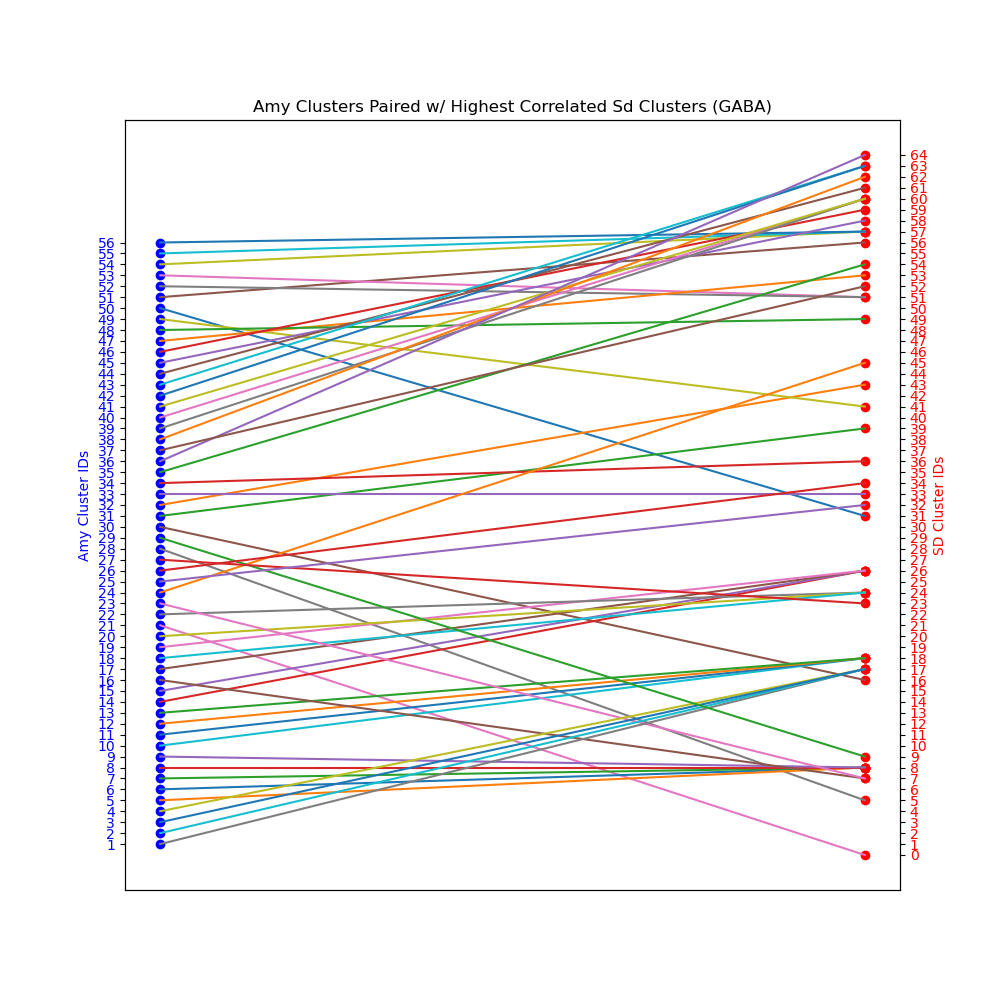

In [172]:
fig,ax1 = plt.subplots(figsize = (10,10))
ax1.set_title('Amy Clusters Paired w/ Highest Correlated Sd Clusters (GABA)')

ax2 = ax1.twinx()

x1 = np.zeros((1,len(connector_df_alt_lco['index'])))[0]
y1 = np.array(connector_df_alt_lco['index'])

x2 = np.ones((1,len(connector_df_alt_lco['corr_cluster'])))[0]
y2 = np.array(connector_df_alt_lco['corr_cluster'])

ax1.scatter(x = x1, 
            y = y1, color = 'b', label = 'amy_clusters')


ax1.set_yticks(np.sort(np.array(connector_df_alt_lco['index'])))
#plt.xticks([])
ax1.set_xticks([])
ax1.set_ylabel('Amy Cluster IDs', color = 'b')
ax1.tick_params(labelcolor = 'b')



ax1.scatter(x = x2, 
            y = y2, color = 'r', label = 'sd_clusters')

for i in range(len(connector_df_alt_lco)):
    plt.plot([x1[i], x2[i]], [y1[i], y2[i]], '-') 
    

#plt.ylabel('cluster_id')
#plt.yticks(np.arange(1,57))



ax2.set_yticks(np.arange(-1,np.max(np.array(connector_df_alt_lco['corr_cluster'])))+1)

ax2.set_ylabel('SD Cluster IDs', color = 'r')
ax2.tick_params(labelcolor = 'r')

#ax1.legend()
#plt.savefig(folder+'gaba_connector_plot_amy_sd_lco_v2.png')
plt.show()

In [173]:
amy_metadata_df_gaba

GGGTATTTCTCGCGTT-1_10-1 GGTAACTAGACATCCT-1_18-1  \
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           10-1                    18-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              GGTAATCGTGGACTAG-1_18-1 TTCCGGTAGTGGTGGT-1_18-1  \
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           18-1                    18-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              AGGGTGAAGTACAACA-1_19-1 AGTACCATCCCTGGTT-1_19-1  \
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           19-1                    19-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              CATGAGTTCCGGCTTT-1_19-1 TTGCCTGAGACGGTTG-1_19-1  \
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           19-1                    19-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              AAACGCTTCACCATGA-1_23-1 TACCCACCAGTGACCC-1_23-1  ...  \
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4  ...   
sample                           23-1                    23-1  ...   
FC time                             0                       0  ...   
batch                               1                       1  ...   
cell_class                       GABA                    GABA  ...   
markers                [Adora2a, Id4]          [Adora2a, Id4]  ...   
cluster_label                      11                      11  ...   

              GTCAAACTCCCGATCT-1_76-2 GTGTAACGTGAGACCA-1_76-2  \
celltype              GABA-51-Vip-Crh         GABA-51-Vip-Crh   
sample                           76-2                    76-2   
FC time                             2                       2   
batch                               2                       2   
cell_class                       GABA                    GABA   
markers                    [Vip, Crh]              [Vip, Crh]   
cluster_label                      51                      51   

              GTGTGATAGGTGAGAA-1_76-2 TACTTCAGTAACTAAG-1_76-2  \
celltype              GABA-51-Vip-Crh         GABA-51-Vip-Crh   
sample                           76-2                    76-2   
FC time                             2                       2   
batch                               2                       2   
cell_class                       GABA                    GABA   
markers                    [Vip, Crh]              [Vip, Crh]   
cluster_label                      51                      51   

              TCCGATCTCGTTTACT-1_76-2 TCGCTCAAGATTGAGT-1_76-2  \
celltype              GABA-51-Vip-Crh         GABA-51-Vip-Crh   
sample                           76-2                    76-2   
FC time                             2                       2   
batch                               2                       2   
ce

In [174]:
pd.unique(amy_metadata_df_gaba.loc['cluster_label'])

array([11, 12, 30, 50, 43, 13, 7, 48, 18, 15, 14, 19, 55, 31, 34, 1, 22,
       25, 20, 42, 41, 45, 4, 54, 29, 46, 56, 27, 23, 28, 49, 8, 5, 6, 3,
       10, 9, 16, 52, 47, 53, 40, 2, 26, 39, 35, 36, 38, 37, 33, 32, 17,
       24, 44, 21, 51], dtype=object)

In [175]:
#get list of lists of markers, then list of unique marker list, preserving order
all_m = [amy_metadata_df_gaba.loc['markers'][x] for x in range((amy_metadata_df_gaba.loc['markers'].shape[0]))]

all_m_u = []
for x in all_m:
    if x not in all_m_u:
        all_m_u.append(x)

/tmp/ipykernel_3595369/1033362093.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_m = [amy_metadata_df_gaba.loc['markers'][x] for x in range((amy_metadata_df_gaba.loc['markers'].shape[0]))]


In [176]:
#sanity check of markers from meta data in index of expression matrix
error_genes = []
for x in all_m_u:
    for g in x:
        if g in amy_df_gaba_expr_ge_cv_ls_orig.index:
            pass
        else:
            print ('gene, ',g ,'not found in index')
            error_genes.append(g)

gene,  Cyp26a1 not found in index
gene,  Hctr2 not found in index
gene,  Scng not found in index
gene,  Lrpprc not found in index
gene,  Luzp2 not found in index
gene,  Rpb4 not found in index


In [177]:
error_genes

['Cyp26a1', 'Hctr2', 'Scng', 'Lrpprc', 'Luzp2', 'Rpb4']

There are 3 typos of marker genes in amy metadata stored in 'error genes' list above. The corrected gene names do appear in the index:

In [178]:
correct_gene_names = ['Hcrtr2','Sncg','Rbp4']

In [179]:
for g in correct_gene_names:
    if g in amy_df_gaba_expr.index:
        print ('found gene, ',g ,' in index')

found gene,  Hcrtr2  in index
found gene,  Sncg  in index
found gene,  Rbp4  in index


In [180]:
error_genes

['Cyp26a1', 'Hctr2', 'Scng', 'Lrpprc', 'Luzp2', 'Rpb4']

Replace the misspelled genes in with correct ones in all_m_u

In [181]:
for eg,cg in zip(error_genes,correct_gene_names):
    for i,x in enumerate(all_m_u):
        for j,g in enumerate(x):
            if g == eg:
                #print (all_m_u[i][j])
                #if first and last letter of eg matches cg, replace with cg
                if cg[:1] == g[:1] and cg[-1:] == g[-1:]:
                    #print (cg)
                    #print (all_m_u[i][j])
                    all_m_u[i][j] = cg
                
                

                

In [182]:
all_m_u

[['Adora2a', 'Id4'],
 ['Adora2a', 'Scn4b'],
 ['Prlr', 'Calcr'],
 ['Chat', 'Vip'],
 ['Crabp1', 'Etv1'],
 ['Adora2a', 'Crh'],
 ['Pax6', 'Cyp26a1'],
 ['Reln', 'Crim1'],
 ['Isl1', 'Tac1'],
 ['Drd1', 'Ebf1'],
 ['Drd1', 'Scn4b'],
 ['Isl1', 'Aldoc'],
 ['Sncg', 'Vip'],
 ['Prlr', 'Cbln1'],
 ['Prlr', 'Satb1'],
 ['Foxp2', 'Fmod'],
 ['Gal', 'Avp'],
 ['Lhx8', 'Th'],
 ['Gpr101', 'Gabre'],
 ['Moxd1', 'Vwc2'],
 ['Moxd1', 'Pvalb'],
 ['Lamp5', 'Hctr2'],
 ['Foxp2', 'Htr1f'],
 ['Scng', 'Kcnc2'],
 ['Prlr', 'Greb1'],
 ['Lamp5', 'Kit'],
 ['Sncg', 'Krt73'],
 ['Lhx6', 'Nxph2'],
 ['Fign', 'Lrpprc'],
 ['Cbln4', 'Luzp2'],
 ['Npnt', 'Calca'],
 ['Prkcd', 'Oprk1'],
 ['Pax6', 'Enpp2'],
 ['Pax6', 'Th'],
 ['Foxp2', 'Col6a1'],
 ['Prkcd', 'Adora2a'],
 ['Prkcd', 'Ezr'],
 ['Prkcd', 'Nts'],
 ['Calb2', 'Rgs12'],
 ['Reln', 'Ndnf'],
 ['Htr3a', 'Kcnc2'],
 ['Rpb4', 'Sst'],
 ['Foxp2', 'Adra2a'],
 ['Cbln4', 'Sst'],
 ['Sst', 'Nek7'],
 ['Chodl', 'Moxd1'],
 ['Sst', 'Fign'],
 ['Sst', 'Tmtc4'],
 ['Sst', 'Npy'],
 ['Prlr', 'St18'],
 ['Pr

In [183]:
cluster_2_markers_dict = dict(zip(pd.unique(amy_metadata_df_gaba.loc['cluster_label']),all_m_u))

In [184]:
sorted(cluster_2_markers_dict.items())

[(1, ['Foxp2', 'Fmod']),
 (2, ['Foxp2', 'Adra2a']),
 (3, ['Foxp2', 'Col6a1']),
 (4, ['Foxp2', 'Htr1f']),
 (5, ['Pax6', 'Enpp2']),
 (6, ['Pax6', 'Th']),
 (7, ['Pax6', 'Cyp26a1']),
 (8, ['Prkcd', 'Oprk1']),
 (9, ['Prkcd', 'Ezr']),
 (10, ['Prkcd', 'Adora2a']),
 (11, ['Adora2a', 'Id4']),
 (12, ['Adora2a', 'Scn4b']),
 (13, ['Adora2a', 'Crh']),
 (14, ['Drd1', 'Scn4b']),
 (15, ['Drd1', 'Ebf1']),
 (16, ['Prkcd', 'Nts']),
 (17, ['Pdyn', 'Ebf1']),
 (18, ['Isl1', 'Tac1']),
 (19, ['Isl1', 'Aldoc']),
 (20, ['Gpr101', 'Gabre']),
 (21, ['Vdr', 'Nts']),
 (22, ['Gal', 'Avp']),
 (23, ['Fign', 'Lrpprc']),
 (24, ['Fign', 'Ucn3']),
 (25, ['Lhx8', 'Th']),
 (26, ['Cbln4', 'Sst']),
 (27, ['Lhx6', 'Nxph2']),
 (28, ['Cbln4', 'Luzp2']),
 (29, ['Prlr', 'Greb1']),
 (30, ['Prlr', 'Calcr']),
 (31, ['Prlr', 'Cbln1']),
 (32, ['Prlr', 'Tac1']),
 (33, ['Prlr', 'St18']),
 (34, ['Prlr', 'Satb1']),
 (35, ['Chodl', 'Moxd1']),
 (36, ['Sst', 'Fign']),
 (37, ['Sst', 'Npy']),
 (38, ['Sst', 'Tmtc4']),
 (39, ['Sst', 'Nek7']),
 (4

In [185]:
#check makers in orig sd data

In [186]:
for x in all_m_u:
    for g in x:
        if g in gaba_df_prelinkage_ls.index:
            pass
        else:
            print ('gene',g ,'not found in index')

gene Scn4b not found in index
gene Cyp26a1 not found in index
gene Crim1 not found in index
gene Scn4b not found in index
gene Fmod not found in index
gene Hctr2 not found in index
gene Scng not found in index
gene Lrpprc not found in index
gene Luzp2 not found in index
gene Prkcd not found in index
gene Prkcd not found in index
gene Prkcd not found in index
gene Ezr not found in index
gene Prkcd not found in index
gene Rpb4 not found in index
gene Tmtc4 not found in index
gene Vdr not found in index


In [187]:
#check to see if connected sd_cluster also shows high marker avg expr
#replot connector w/ cluster markers instead of cluster ids

In [188]:
connector_df_alt_lco_marker = connector_df_alt_lco.copy()

In [189]:
connector_df_alt_lco_marker

index argmax       max corr_cluster
0      50      0  0.887527           31
1      32      3  0.873589           43
2      31      5  0.887938           39
3      34      6  0.893623           36
4      33      9   0.89231           33
5      30     10  0.888857           16
6      21     15  0.313583            0
7      28     18  0.719461            5
8      49     25  0.829003           41
9      10     28  0.344838           18
10     11     28  0.456062           18
11     12     28  0.518989           18
12     13     28  0.275533           18
13     14     29  0.320652           26
14     15     29  0.398394           26
15     17     29  0.289208           26
16     19     29  0.608402           26
17     22     32  0.834666           24
18     20     32  0.390439           24
19     18     32  0.517463           24
20      6     34  0.850473            8
21      5     34  0.583184            8
22      7     34  0.507027            8
23      8     34  0.380026            8
24      9     34  0.239009            8
25     16     35  0.252406            7
26     23     35  0.833422            7
27      1     37  0.454419           17
28      4     37  0.748034           17
29      2     37  0.832672           17
30      3     37  0.803021           17
31     24     40   0.87142           45
32     29     41  0.774819            9
33     27     44  0.831754           23
34     25     49  0.889799           32
35     51     50  0.937958           56
36     53     51  0.926582           51
37     52     51  0.785322           51
38     54     52  0.872103           57
39     55     52  0.679781           57
40     56     52  0.849278           57
41     47     53   0.94901           53
42     48     55   0.80487           49
43     46     56  0.946995           59
44     45     57  0.956128           58
45     44     58  0.956332           61
46     40     59  0.865225           60
47     39     59  0.667568           60
48     41     59   0.92954           60
49     43     60  0.616825           63
50     42     60  0.940145           63
51     38     61  0.912524           62
52     35     62  0.901402           54
53     26     63  0.915261           34
54     36     64  0.858516           64
55     37     65   0.90997           52

In [190]:
cluster_2_markers_dict[32]

['Prlr', 'Tac1']

In [191]:
np.array(connector_df_alt_lco.loc[:,'index'])

array([50, 32, 31, 34, 33, 30, 21, 28, 49, 10, 11, 12, 13, 14, 15, 17, 19,
       22, 20, 18,  6,  5,  7,  8,  9, 16, 23,  1,  4,  2,  3, 24, 29, 27,
       25, 51, 53, 52, 54, 55, 56, 47, 48, 46, 45, 44, 40, 39, 41, 43, 42,
       38, 35, 26, 36, 37])

In [192]:
connector_df_alt_lco_marker

index argmax       max corr_cluster
0      50      0  0.887527           31
1      32      3  0.873589           43
2      31      5  0.887938           39
3      34      6  0.893623           36
4      33      9   0.89231           33
5      30     10  0.888857           16
6      21     15  0.313583            0
7      28     18  0.719461            5
8      49     25  0.829003           41
9      10     28  0.344838           18
10     11     28  0.456062           18
11     12     28  0.518989           18
12     13     28  0.275533           18
13     14     29  0.320652           26
14     15     29  0.398394           26
15     17     29  0.289208           26
16     19     29  0.608402           26
17     22     32  0.834666           24
18     20     32  0.390439           24
19     18     32  0.517463           24
20      6     34  0.850473            8
21      5     34  0.583184            8
22      7     34  0.507027            8
23      8     34  0.380026            8
24      9     34  0.239009            8
25     16     35  0.252406            7
26     23     35  0.833422            7
27      1     37  0.454419           17
28      4     37  0.748034           17
29      2     37  0.832672           17
30      3     37  0.803021           17
31     24     40   0.87142           45
32     29     41  0.774819            9
33     27     44  0.831754           23
34     25     49  0.889799           32
35     51     50  0.937958           56
36     53     51  0.926582           51
37     52     51  0.785322           51
38     54     52  0.872103           57
39     55     52  0.679781           57
40     56     52  0.849278           57
41     47     53   0.94901           53
42     48     55   0.80487           49
43     46     56  0.946995           59
44     45     57  0.956128           58
45     44     58  0.956332           61
46     40     59  0.865225           60
47     39     59  0.667568           60
48     41     59   0.92954           60
49     43     60  0.616825           63
50     42     60  0.940145           63
51     38     61  0.912524           62
52     35     62  0.901402           54
53     26     63  0.915261           34
54     36     64  0.858516           64
55     37     65   0.90997           52

In [193]:
connector_df_alt_lco_marker.insert(1, 'amy_marker',[cluster_2_markers_dict[v] for v in np.array(connector_df_alt_lco.loc[:,'index'])])

In [194]:
connector_df_alt_lco_marker

index        amy_marker argmax       max corr_cluster
0      50       [Chat, Vip]      0  0.887527           31
1      32      [Prlr, Tac1]      3  0.873589           43
2      31     [Prlr, Cbln1]      5  0.887938           39
3      34     [Prlr, Satb1]      6  0.893623           36
4      33      [Prlr, St18]      9   0.89231           33
5      30     [Prlr, Calcr]     10  0.888857           16
6      21        [Vdr, Nts]     15  0.313583            0
7      28    [Cbln4, Luzp2]     18  0.719461            5
8      49     [Npnt, Calca]     25  0.829003           41
9      10  [Prkcd, Adora2a]     28  0.344838           18
10     11    [Adora2a, Id4]     28  0.456062           18
11     12  [Adora2a, Scn4b]     28  0.518989           18
12     13    [Adora2a, Crh]     28  0.275533           18
13     14     [Drd1, Scn4b]     29  0.320652           26
14     15      [Drd1, Ebf1]     29  0.398394           26
15     17      [Pdyn, Ebf1]     29  0.289208           26
16     19     [Isl1, Aldoc]     29  0.608402           26
17     22        [Gal, Avp]     32  0.834666           24
18     20   [Gpr101, Gabre]     32  0.390439           24
19     18      [Isl1, Tac1]     32  0.517463           24
20      6        [Pax6, Th]     34  0.850473            8
21      5     [Pax6, Enpp2]     34  0.583184            8
22      7   [Pax6, Cyp26a1]     34  0.507027            8
23      8    [Prkcd, Oprk1]     34  0.380026            8
24      9      [Prkcd, Ezr]     34  0.239009            8
25     16      [Prkcd, Nts]     35  0.252406            7
26     23    [Fign, Lrpprc]     35  0.833422            7
27      1     [Foxp2, Fmod]     37  0.454419           17
28      4    [Foxp2, Htr1f]     37  0.748034           17
29      2   [Foxp2, Adra2a]     37  0.832672           17
30      3   [Foxp2, Col6a1]     37  0.803021           17
31     24      [Fign, Ucn3]     40   0.87142           45
32     29     [Prlr, Greb1]     41  0.774819            9
33     27     [Lhx6, Nxph2]     44  0.831754           23
34     25        [Lhx8, Th]     49  0.889799           32
35     51        [Vip, Crh]     50  0.937958           56
36     53    [Htr3a, Kcnc2]     51  0.926582           51
37     52    [Calb2, Rgs12]     51  0.785322           51
38     54     [Scng, Kcnc2]     52  0.872103           57
39     55       [Sncg, Vip]     52  0.679781           57
40     56     [Sncg, Krt73]     52  0.849278           57
41     47      [Reln, Ndnf]     53   0.94901           53
42     48     [Reln, Crim1]     55   0.80487           49
43     46      [Lamp5, Kit]     56  0.946995           59
44     45    [Lamp5, Hctr2]     57  0.956128           58
45     44    [Pthlh, Pvalb]     58  0.956332           61
46     40       [Rpb4, Sst]     59  0.865225           60
47     39       [Sst, Nek7]     59  0.667568           60
48     41    [Moxd1, Pvalb]     59   0.92954           60
49     43    [Crabp1, Etv1]     60  0.616825           63
50     42     [Moxd1, Vwc2]     60  0.940145           63
51     38      [Sst, Tmtc4]     61  0.912524           62
52     35    [Chodl, Moxd1]     62  0.901402           54
53     26      [Cbln4, Sst]     63  0.915261           34
54     36       [Sst, Fign]     64  0.858516           64
55     37        [Sst, Npy]     65   0.90997           52

In [195]:
#jitter plot of one cluster / marker pair

In [196]:
cluster_2_markers_dict

{11: ['Adora2a', 'Id4'],
 12: ['Adora2a', 'Scn4b'],
 30: ['Prlr', 'Calcr'],
 50: ['Chat', 'Vip'],
 43: ['Crabp1', 'Etv1'],
 13: ['Adora2a', 'Crh'],
 7: ['Pax6', 'Cyp26a1'],
 48: ['Reln', 'Crim1'],
 18: ['Isl1', 'Tac1'],
 15: ['Drd1', 'Ebf1'],
 14: ['Drd1', 'Scn4b'],
 19: ['Isl1', 'Aldoc'],
 55: ['Sncg', 'Vip'],
 31: ['Prlr', 'Cbln1'],
 34: ['Prlr', 'Satb1'],
 1: ['Foxp2', 'Fmod'],
 22: ['Gal', 'Avp'],
 25: ['Lhx8', 'Th'],
 20: ['Gpr101', 'Gabre'],
 42: ['Moxd1', 'Vwc2'],
 41: ['Moxd1', 'Pvalb'],
 45: ['Lamp5', 'Hctr2'],
 4: ['Foxp2', 'Htr1f'],
 54: ['Scng', 'Kcnc2'],
 29: ['Prlr', 'Greb1'],
 46: ['Lamp5', 'Kit'],
 56: ['Sncg', 'Krt73'],
 27: ['Lhx6', 'Nxph2'],
 23: ['Fign', 'Lrpprc'],
 28: ['Cbln4', 'Luzp2'],
 49: ['Npnt', 'Calca'],
 8: ['Prkcd', 'Oprk1'],
 5: ['Pax6', 'Enpp2'],
 6: ['Pax6', 'Th'],
 3: ['Foxp2', 'Col6a1'],
 10: ['Prkcd', 'Adora2a'],
 9: ['Prkcd', 'Ezr'],
 16: ['Prkcd', 'Nts'],
 52: ['Calb2', 'Rgs12'],
 47: ['Reln', 'Ndnf'],
 53: ['Htr3a', 'Kcnc2'],
 40: ['Rpb4', 'Sst']

In [197]:
cluster_2_markers_dict[11][0]

'Adora2a'

In [198]:
amy_metadata_df_gaba.loc['cluster_label'].T

GGGTATTTCTCGCGTT-1_10-1    11
GGTAACTAGACATCCT-1_18-1    11
GGTAATCGTGGACTAG-1_18-1    11
TTCCGGTAGTGGTGGT-1_18-1    11
AGGGTGAAGTACAACA-1_19-1    11
                           ..
TCGCTCAAGATTGAGT-1_76-2    51
TGCAGGCTCTTACACT-1_76-2    51
TTACAGGTCCGAGATT-1_76-2    51
TTGCGTCCAACACGAG-1_76-2    51
TTGCTGCAGCACTCCG-1_76-2    51
Name: cluster_label, Length: 13006, dtype: object

In [199]:
amy_metadata_df_gaba

GGGTATTTCTCGCGTT-1_10-1 GGTAACTAGACATCCT-1_18-1  \
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           10-1                    18-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              GGTAATCGTGGACTAG-1_18-1 TTCCGGTAGTGGTGGT-1_18-1  \
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           18-1                    18-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              AGGGTGAAGTACAACA-1_19-1 AGTACCATCCCTGGTT-1_19-1  \
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           19-1                    19-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              CATGAGTTCCGGCTTT-1_19-1 TTGCCTGAGACGGTTG-1_19-1  \
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4   
sample                           19-1                    19-1   
FC time                             2                       2   
batch                               1                       1   
cell_class                       GABA                    GABA   
markers                [Adora2a, Id4]          [Adora2a, Id4]   
cluster_label                      11                      11   

              AAACGCTTCACCATGA-1_23-1 TACCCACCAGTGACCC-1_23-1  ...  \
celltype          GABA-11-Adora2a-Id4     GABA-11-Adora2a-Id4  ...   
sample                           23-1                    23-1  ...   
FC time                             0                       0  ...   
batch                               1                       1  ...   
cell_class                       GABA                    GABA  ...   
markers                [Adora2a, Id4]          [Adora2a, Id4]  ...   
cluster_label                      11                      11  ...   

              GTCAAACTCCCGATCT-1_76-2 GTGTAACGTGAGACCA-1_76-2  \
celltype              GABA-51-Vip-Crh         GABA-51-Vip-Crh   
sample                           76-2                    76-2   
FC time                             2                       2   
batch                               2                       2   
cell_class                       GABA                    GABA   
markers                    [Vip, Crh]              [Vip, Crh]   
cluster_label                      51                      51   

              GTGTGATAGGTGAGAA-1_76-2 TACTTCAGTAACTAAG-1_76-2  \
celltype              GABA-51-Vip-Crh         GABA-51-Vip-Crh   
sample                           76-2                    76-2   
FC time                             2                       2   
batch                               2                       2   
cell_class                       GABA                    GABA   
markers                    [Vip, Crh]              [Vip, Crh]   
cluster_label                      51                      51   

              TCCGATCTCGTTTACT-1_76-2 TCGCTCAAGATTGAGT-1_76-2  \
celltype              GABA-51-Vip-Crh         GABA-51-Vip-Crh   
sample                           76-2                    76-2   
FC time                             2                       2   
batch                               2                       2   
ce

In [200]:
np.unique(amy_metadata_df_gaba.loc['cell_class'])[0]

'GABA'

In [201]:
def gene_explorer(gene,dataset_name,df,metadata_df,output_folder= None,markers = False):
    '''Takes in a gene and dataset_name as strings, dataframe and corresponding metadata, returns
    jitter plot of all cells categorized into into cluster id. option to include markers if known and included as row in metadata.'''
    #extract gene expr data
    jitter_test = df.loc[gene,:].T
    #get x axis labels, combining cluster label + marker if known
    if markers:
        jitter_x = metadata_df.loc['cluster_label'].astype(str).T + '-' + metadata_df.loc['markers'].astype(str).T
    else:
        jitter_x = metadata_df.loc['cluster_label'].astype(str).T
    # remove unwanted characters in x axis labels
    jitter_x_fmt = pd.Series([re.sub("[',']","",x) for x in jitter_x])
    #match up index
    jitter_x_fmt.index = jitter_test.index
    
    jitter_test_df = pd.concat([jitter_test,jitter_x_fmt,metadata_df.loc['cluster_label'].T],axis=1)
    if markers:
        jitter_test_df = jitter_test_df.rename({0:'Cluster_ID-Markers'}, axis = 'columns')
    else:
        jitter_test_df = jitter_test_df.rename({0:'Cluster_ID'}, axis = 'columns')
    jitter_test_df_sorted = jitter_test_df.sort_values(by = 'cluster_label')
    
    fig,ax = plt.subplots(figsize = (15,10))
    sns.stripplot(x=jitter_test_df_sorted.columns[1], y=jitter_test_df_sorted.columns[0], data=jitter_test_df_sorted, 
                  jitter = 0.4, s = 2)
    #plt.xticks(rotation = 45)
    if markers:
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha="right")

    cell_class = np.unique(amy_metadata_df_gaba.loc['cell_class'])[0]
    plt.title(cell_class + '-' +  gene)
    plt.ylabel('log/standerdized expr')
    plt.tight_layout()
    plt.savefig(output_folder + dataset_name + '_jitter_plot_' + cell_class +'_' + gene +'.png')
    plt.show()
    
    return ax.get_xticklabels()


In [202]:
folder


'/bigdata/isaac/gaba_files/'

In [203]:
str('amy_df_gaba_expr_ge_cv_ls')

'amy_df_gaba_expr_ge_cv_ls'

<IPython.core.display.Javascript object>


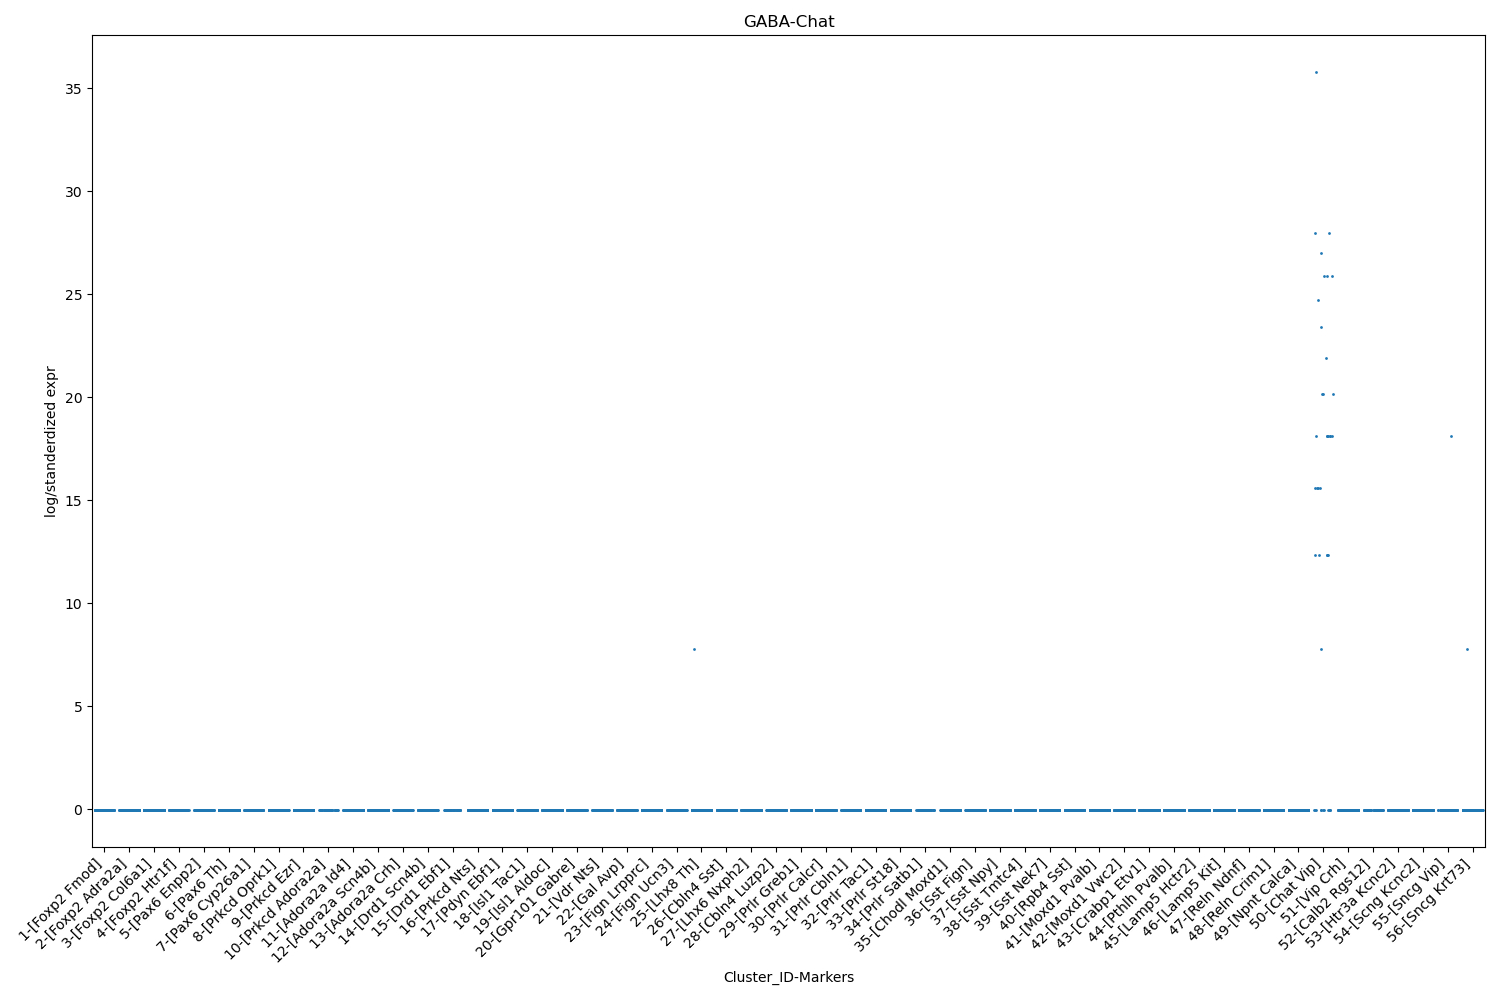

/home/isaac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/isaac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_3595369/314010820.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha="right")


In [623]:
xticks = gene_explorer('Chat', 'amy', amy_df_gaba_expr_ge_cv_ls, amy_metadata_df_gaba,output_folder = '/bigdata/isaac/gaba_files/gene_explorer/',markers = True)

<IPython.core.display.Javascript object>


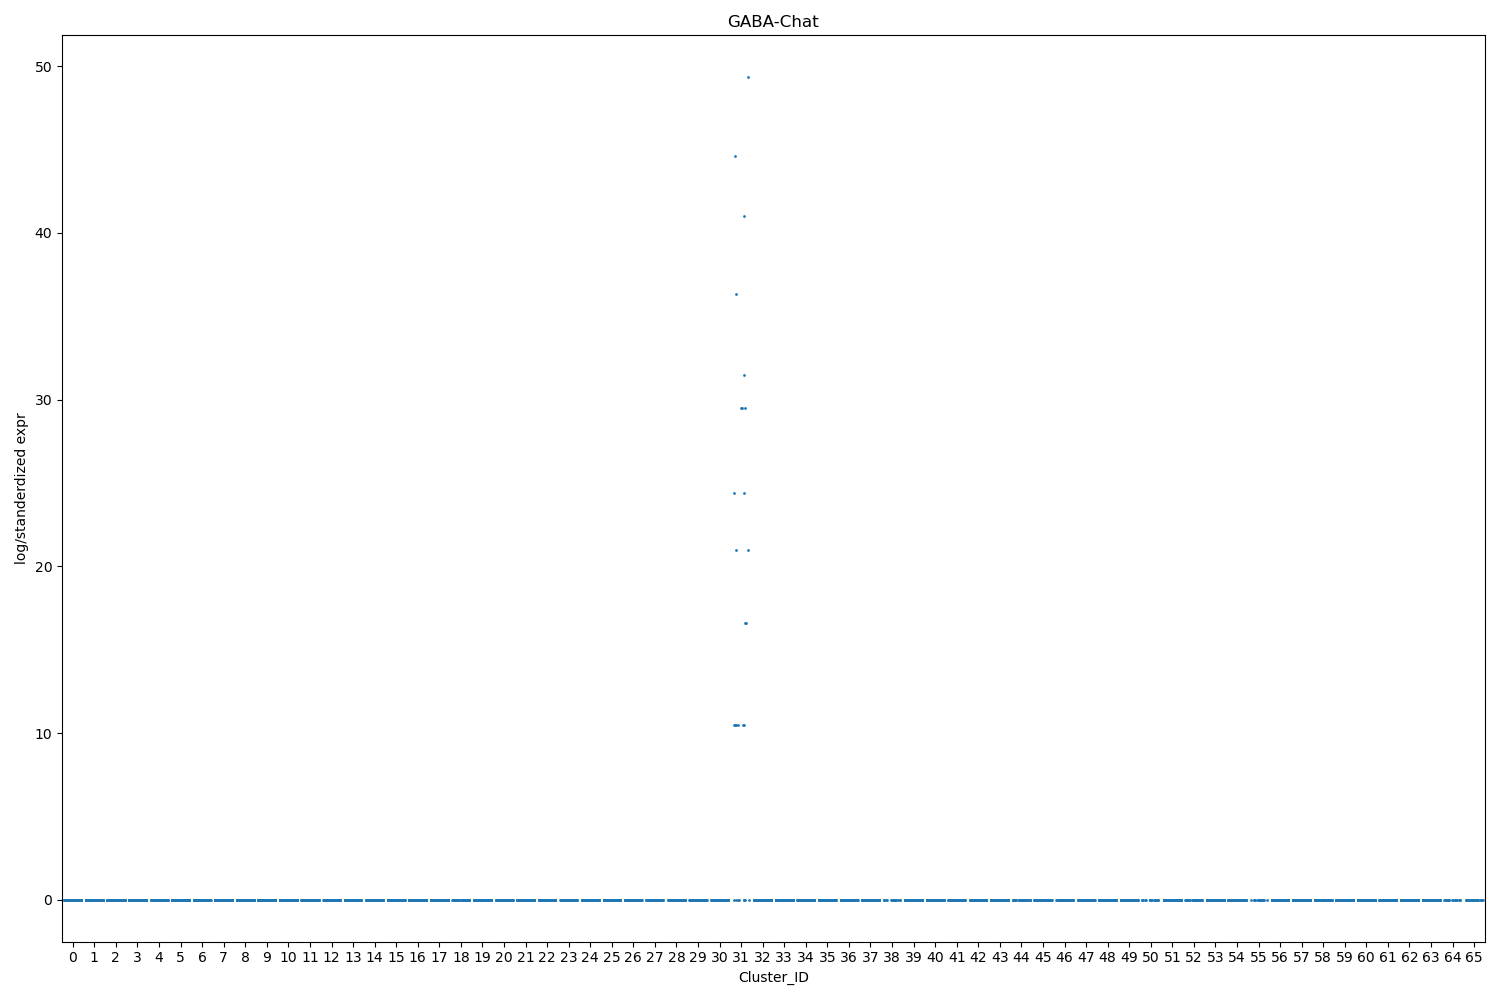

/home/isaac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/isaac/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30'),
 Text(31, 0, '31'),
 Text(32, 0, '32'),
 Text(33, 0, '33'),
 Text(34, 0, '34'),
 Text(35, 0, '35'),
 Text(36, 0, '36'),
 Text(37, 0, '37'),
 Text(38, 0, '38'),
 Text(39, 0, '39'),
 Text(40, 0, '40'),
 Text(41, 0, '41'),
 Text(42, 0, '42'),
 Text(43, 0, '43'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '46'),
 Text(47, 0, '47'),
 Text(48, 0, '48'),
 Text(49, 0, '49'),
 Text(50, 0, '50'),


In [622]:
gene_explorer('Chat','sd', gaba_df_prelinkage_ls, gaba_meta_data_df_prelinkage, output_folder= '/bigdata/isaac/gaba_files/gene_explorer/', markers = False)

In [206]:
sd_std = dp.compute_std_expr_per_cluster_label(gaba_df_prelinkage_ls,gaba_meta_data_df_prelinkage)

In [207]:
gaba_df_prelinkage_ls.loc[:,gaba_meta_data_df_prelinkage.loc['cluster_label']==0].std(axis=1)

Sst         7.768847e-01
Npy         1.430234e-01
Gal         1.672497e-16
Avp         1.043787e+00
Vip         1.496168e-01
                ...     
Pdlim5      5.311497e-01
Ppargc1a    1.128393e+00
Pld5        5.152531e-01
Kcnip4      1.024121e+00
Lhfp        6.629060e-01
Length: 378, dtype: float64

In [208]:
np.abs([-1,-3,-5])

array([1, 3, 5])

In [209]:
sd_std

0         1         2         3         4         5   \
Sst       0.776885  0.202036  0.180046   0.17176  0.093525   0.17008   
Npy       0.143023  0.196455  0.173661  0.169205  0.249825  0.195486   
Gal            0.0  0.403154  1.465221  0.124884       0.0       0.0   
Avp       1.043787  0.811323  0.689354  0.821005  0.626541  0.843928   
Vip       0.149617       0.0       0.0  0.142485       0.0   0.10986   
...            ...       ...       ...       ...       ...       ...   
Pdlim5     0.53115       0.0  0.403188  0.161156  0.634507  0.276976   
Ppargc1a  1.128393  1.273338  0.706607  1.119145  0.778067  0.912663   
Pld5      0.515253  0.522404  0.738841  0.315603  0.993318  1.196767   
Kcnip4    1.024121   0.79913   0.74553  1.145173   0.73169  0.919887   
Lhfp      0.662906  2.857532  1.645378   0.50952       0.0  0.726961   

                6         7         8         9   ...        56        57  \
Sst        0.19791  0.561444  0.455506  0.494832  ...  0.365258  0.173379   
Npy       0.201488  0.275809  0.227831  0.235606  ...  0.354867  0.156925   
Gal       0.186312  0.351295       0.0  0.612514  ...       0.0       0.0   
Avp       0.831688  0.565005  0.912278  0.848428  ...  0.602359   0.84993   
Vip       0.095362  0.165228  0.094384  0.081948  ...  2.606596  1.702085   
...            ...       ...       ...       ...  ...       ...       ...   
Pdlim5    0.339419  0.370915   0.76126  0.411615  ...  1.077942  1.927902   
Ppargc1a  0.789761  0.746423  0.674794  0.967174  ...  0.710619  0.871343   
Pld5      1.260979  1.109927  0.980382  0.614963  ...  0.644694  0.275002   
Kcnip4    0.937835  0.933302  0.974124  0.992664  ...  0.893442  0.850294   
Lhfp      0.271482  0.444818  0.549812  1.440326  ...   0.27581   0.46613   

                58        59        60        61        62        63  \
Sst       0.157458  0.131578  1.156917   0.17759  0.883498  0.827899   
Npy       0.712928  1.284656  1.085777  0.128583  1.419952  0.859638   
Gal            0.0       0.0  0.252338       0.0  0.327853       0.0   
Avp            0.0  0.744618  0.668681  0.629016  0.559034   0.68069   
Vip       0.203893  0.215803  0.129157       0.0  0.097237       0.0   
...            ...       ...       ...       ...       ...       ...   
Pdlim5    2.360427  3.011629  0.398169  0.338837  0.346068   0.42422   
Ppargc1a  0.759681  0.449726  1.263833  1.179106  1.026274  1.014752   
Pld5      1.189795  1.435724  0.393102  0.225334  0.675174   0.56526   
Kcnip4    0.162458  0.636214  0.515652  0.107085  0.510776  0.535291   
Lhfp      0.411159  0.291305  0.974706  1.053523  0.532762   0.44976   

                64        65  
Sst       0.823865  0.856126  
Npy       1.369865  1.278128  
Gal            0.0       0.0  
Avp            0.0  0.855279  
Vip            0.0       0.0  
...            ...       ...  
Pdlim5    0.989579       0.0  
Ppargc1a  0.988718  1.001407  
Pld5      0.466966  0.377592  
Kcnip4    1.226141   0.86319  
Lhfp           0.0       0.0  

[378 rows x 66 columns]

In [210]:
np.unique(gaba_meta_data_df_prelinkage.loc['cluster_label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65], dtype=object)

In [211]:
sd_avgs

0         1         2         3         4         5   \
Sst      -0.052799 -0.335815 -0.350333 -0.355693 -0.383913 -0.355985   
Npy      -0.283375 -0.266134 -0.274041 -0.277158 -0.251861 -0.277019   
Gal      -0.126186 -0.074353  0.206326 -0.121254 -0.126186 -0.126186   
Avp       0.125462 -0.006238 -0.049596  0.012925 -0.072924  0.011349   
Vip      -0.140506 -0.154338 -0.154338 -0.141714 -0.154338 -0.146863   
...            ...       ...       ...       ...       ...       ...   
Pdlim5    -0.11998 -0.189726 -0.149567  -0.18336 -0.089394  -0.17088   
Ppargc1a  0.235094  0.649442 -0.308002   0.18521 -0.250753 -0.095112   
Pld5     -0.278213 -0.290832 -0.170091 -0.381998  0.077507  0.216949   
Kcnip4    0.348098 -0.235703 -0.318286  0.679367 -0.318462  0.103619   
Lhfp     -0.061433  0.611826  0.339463 -0.119438 -0.200898 -0.038214   

                6         7         8         9   ...        56        57  \
Sst      -0.340964  -0.19556 -0.265766 -0.236357  ... -0.345609 -0.358898   
Npy      -0.264008 -0.249343 -0.260414 -0.258252  ... -0.254232 -0.279362   
Gal      -0.115208 -0.086827 -0.126186 -0.037761  ... -0.126186 -0.126186   
Avp       0.023045 -0.097437  0.052388   0.03684  ... -0.093788  0.046217   
Vip      -0.148718 -0.143694 -0.148833 -0.150188  ...  6.180234  0.292554   
...            ...       ...       ...       ...  ...       ...       ...   
Pdlim5   -0.161391 -0.155866 -0.056705 -0.147878  ...  0.067439   0.64145   
Ppargc1a  -0.21442 -0.241566 -0.379606  0.034571  ... -0.370182 -0.106719   
Pld5      0.506481  0.246273  0.035793 -0.234992  ... -0.230746 -0.386371   
Kcnip4    0.194134  0.035256  0.159885   0.24254  ... -0.105421 -0.326052   
Lhfp     -0.178235 -0.152353 -0.116703  0.070704  ... -0.177504 -0.133191   

                58        59        60        61        62        63  \
Sst      -0.361009 -0.373029  0.168473  -0.35041  3.078125  -0.03385   
Npy      -0.083082  0.189093  0.126427 -0.287002  3.211631  0.065238   
Gal      -0.126186 -0.126186 -0.105983 -0.126186 -0.091943 -0.126186   
Avp      -0.201913  -0.02162 -0.085422 -0.071679 -0.099653 -0.047967   
Vip      -0.128649 -0.138424 -0.143997 -0.154338 -0.148495 -0.154338   
...            ...       ...       ...       ...       ...       ...   
Pdlim5    1.137411  2.250012 -0.150619 -0.161587 -0.160266 -0.145376   
Ppargc1a -0.106876 -0.580984  1.162206  1.274981   0.27052  0.336414   
Pld5      0.332568  0.861317 -0.348903  -0.39976 -0.222383 -0.267581   
Kcnip4   -0.788783 -0.521333 -0.664137 -0.800358 -0.669239 -0.630478   
Lhfp     -0.149097 -0.174738  0.073733  0.181716 -0.123317  -0.15505   

                64        65  
Sst       3.957141  1.575562  
Npy       3.251905  1.751706  
Gal      -0.126186 -0.126186  
Avp      -0.201913   0.04019  
Vip      -0.154338 -0.154338  
...            ...       ...  
Pdlim5    0.050282 -0.189726  
Ppargc1a  0.719777 -0.197765  
Pld5     -0.313061 -0.352265  
Kcnip4    0.099243 -0.284288  
Lhfp     -0.200898 -0.200898  

[378 rows x 66 columns]

In [212]:
sd_std.iloc[:,18]

Sst         0.912844
Npy         1.677503
Gal              0.0
Avp         0.879085
Vip              0.0
              ...   
Pdlim5      0.823947
Ppargc1a    0.873861
Pld5        1.162904
Kcnip4      1.063221
Lhfp        0.659029
Name: 18, Length: 378, dtype: object

In [213]:
np.array(sd_std.loc['Adora2a'])

array([9.756234245242099e-17, 9.754511229096483e-17, 0.5747838647135928,
       1.8055213276984092e-16, 9.754511229096483e-17,
       5.279659495517803e-16, 3.892544352118349e-16,
       3.3376007547841565e-16, 1.5998462458516982, 0.6560004250636323,
       1.2224706349042307, 2.3651146329460456e-16, 9.756965679380792e-17,
       5.569588103046496e-17, 4.17766800724901e-17, 8.377291221954001e-17,
       8.333847759423452e-17, 0.8714411209622085, 4.329793130180194,
       2.582252515110505, 4.179196728701715e-17, 4.179076800536723e-17,
       9.764916487990167e-17, 9.757341084458916e-17,
       2.643110496159276e-16, 9.762424357054043e-17,
       9.759740529001386e-17, 1.4959111270242904, 8.393554664213075e-17,
       1.2703393606882192, 9.759322149812297e-17, 4.239734207189668e-17,
       2.2261910680355885e-16, 0.0, 9.754511229096483e-17,
       9.768874588585031e-17, 6.96153309588041e-17, 9.744952173064797e-17,
       0.0, 3.337459435814906e-16, 0.7197205765593593, 0.0,
       8.3993

In [214]:
np.array(sd_avgs.loc['Adora2a'])

array([-0.06410437518995861, -0.06410437518995861, -0.03860246499691091,
       -0.06410437518995853, -0.06410437518995861, -0.06410437518995923,
       -0.0641043751899591, -0.06410437518995904, 0.09386529488939169,
       -0.030886502425681046, 0.00924181717544089, -0.06410437518995894,
       -0.06410437518995861, -0.06410437518995876, -0.06410437518995875,
       -0.06410437518995862, -0.06410437518995879, -0.005351675062664265,
       1.5552669220685988, 0.38810202330670357, -0.06410437518995867,
       -0.06410437518995867, -0.06410437518995861, -0.06410437518995861,
       -0.06410437518995897, -0.06410437518995861, -0.06410437518995861,
       0.10862856318428663, -0.06410437518995862, 0.06046264767608373,
       -0.06410437518995861, -0.06410437518995867, -0.06410437518995893,
       -0.0641043751899587, -0.06410437518995861, -0.06410437518995861,
       -0.06410437518995878, -0.0641043751899588, -0.0641043751899587,
       -0.06410437518995904, -0.02411989871443886, -0.064104

In [215]:
cluster_2_markers_dict

{11: ['Adora2a', 'Id4'],
 12: ['Adora2a', 'Scn4b'],
 30: ['Prlr', 'Calcr'],
 50: ['Chat', 'Vip'],
 43: ['Crabp1', 'Etv1'],
 13: ['Adora2a', 'Crh'],
 7: ['Pax6', 'Cyp26a1'],
 48: ['Reln', 'Crim1'],
 18: ['Isl1', 'Tac1'],
 15: ['Drd1', 'Ebf1'],
 14: ['Drd1', 'Scn4b'],
 19: ['Isl1', 'Aldoc'],
 55: ['Sncg', 'Vip'],
 31: ['Prlr', 'Cbln1'],
 34: ['Prlr', 'Satb1'],
 1: ['Foxp2', 'Fmod'],
 22: ['Gal', 'Avp'],
 25: ['Lhx8', 'Th'],
 20: ['Gpr101', 'Gabre'],
 42: ['Moxd1', 'Vwc2'],
 41: ['Moxd1', 'Pvalb'],
 45: ['Lamp5', 'Hctr2'],
 4: ['Foxp2', 'Htr1f'],
 54: ['Scng', 'Kcnc2'],
 29: ['Prlr', 'Greb1'],
 46: ['Lamp5', 'Kit'],
 56: ['Sncg', 'Krt73'],
 27: ['Lhx6', 'Nxph2'],
 23: ['Fign', 'Lrpprc'],
 28: ['Cbln4', 'Luzp2'],
 49: ['Npnt', 'Calca'],
 8: ['Prkcd', 'Oprk1'],
 5: ['Pax6', 'Enpp2'],
 6: ['Pax6', 'Th'],
 3: ['Foxp2', 'Col6a1'],
 10: ['Prkcd', 'Adora2a'],
 9: ['Prkcd', 'Ezr'],
 16: ['Prkcd', 'Nts'],
 52: ['Calb2', 'Rgs12'],
 47: ['Reln', 'Ndnf'],
 53: ['Htr3a', 'Kcnc2'],
 40: ['Rpb4', 'Sst']

In [216]:
jitter_x = amy_metadata_df_gaba.loc['cluster_label'].astype(str).T + '-' + amy_metadata_df_gaba.loc['markers'].astype(str).T
jitter_x

GGGTATTTCTCGCGTT-1_10-1    11-['Adora2a', 'Id4']
GGTAACTAGACATCCT-1_18-1    11-['Adora2a', 'Id4']
GGTAATCGTGGACTAG-1_18-1    11-['Adora2a', 'Id4']
TTCCGGTAGTGGTGGT-1_18-1    11-['Adora2a', 'Id4']
AGGGTGAAGTACAACA-1_19-1    11-['Adora2a', 'Id4']
                                   ...          
TCGCTCAAGATTGAGT-1_76-2        51-['Vip', 'Crh']
TGCAGGCTCTTACACT-1_76-2        51-['Vip', 'Crh']
TTACAGGTCCGAGATT-1_76-2        51-['Vip', 'Crh']
TTGCGTCCAACACGAG-1_76-2        51-['Vip', 'Crh']
TTGCTGCAGCACTCCG-1_76-2        51-['Vip', 'Crh']
Length: 13006, dtype: object

<IPython.core.display.Javascript object>


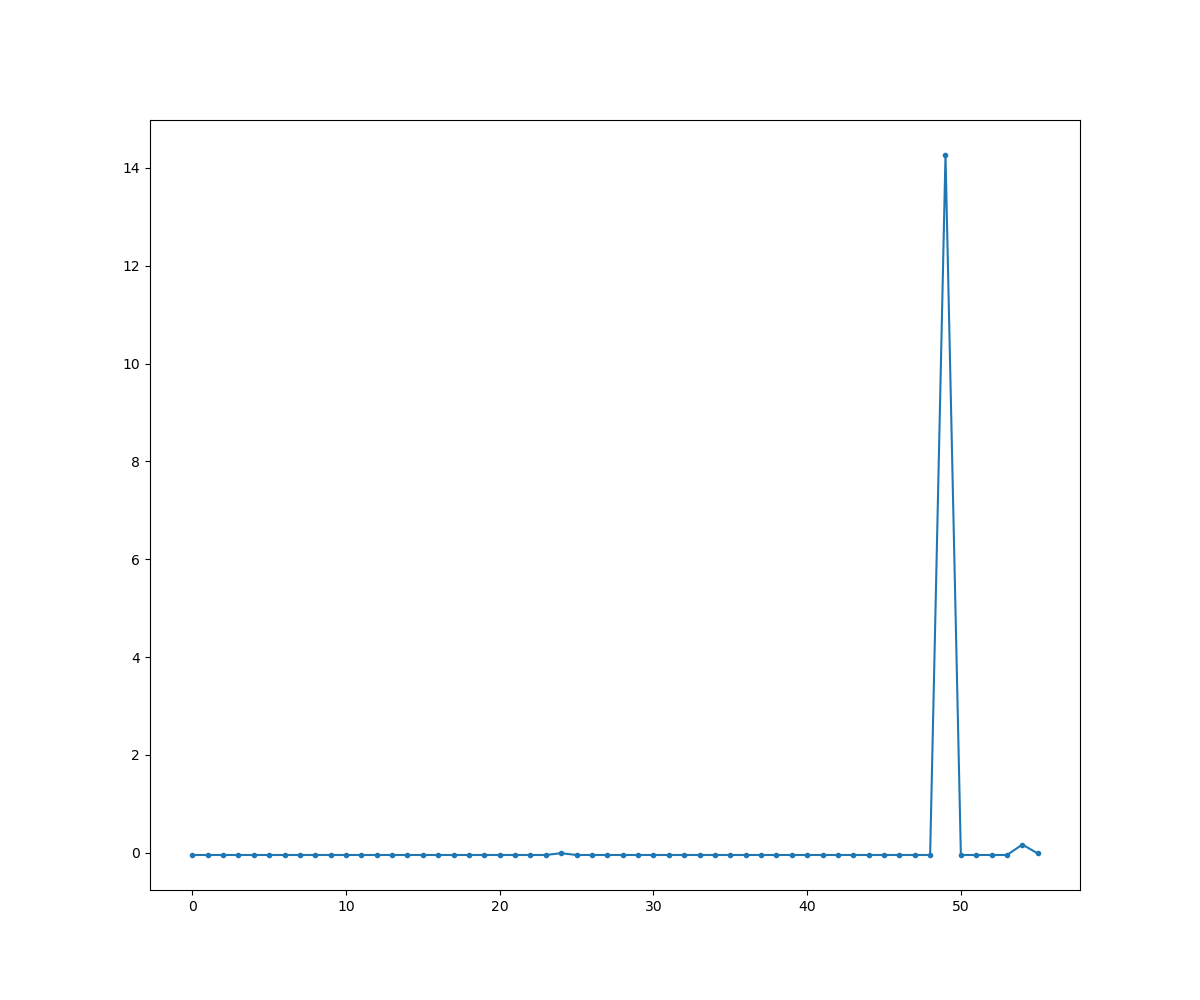

In [217]:
fig,ax = plt.subplots(figsize = (12,10))
ax.plot(np.array(amy_avgs.loc['Chat']), '.-')
#ax.set_xticklabels(xticks)
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha="right")
plt.show()

In [218]:
xticks

[Text(0, 0, '1-[Foxp2 Fmod]'),
 Text(1, 0, '2-[Foxp2 Adra2a]'),
 Text(2, 0, '3-[Foxp2 Col6a1]'),
 Text(3, 0, '4-[Foxp2 Htr1f]'),
 Text(4, 0, '5-[Pax6 Enpp2]'),
 Text(5, 0, '6-[Pax6 Th]'),
 Text(6, 0, '7-[Pax6 Cyp26a1]'),
 Text(7, 0, '8-[Prkcd Oprk1]'),
 Text(8, 0, '9-[Prkcd Ezr]'),
 Text(9, 0, '10-[Prkcd Adora2a]'),
 Text(10, 0, '11-[Adora2a Id4]'),
 Text(11, 0, '12-[Adora2a Scn4b]'),
 Text(12, 0, '13-[Adora2a Crh]'),
 Text(13, 0, '14-[Drd1 Scn4b]'),
 Text(14, 0, '15-[Drd1 Ebf1]'),
 Text(15, 0, '16-[Prkcd Nts]'),
 Text(16, 0, '17-[Pdyn Ebf1]'),
 Text(17, 0, '18-[Isl1 Tac1]'),
 Text(18, 0, '19-[Isl1 Aldoc]'),
 Text(19, 0, '20-[Gpr101 Gabre]'),
 Text(20, 0, '21-[Vdr Nts]'),
 Text(21, 0, '22-[Gal Avp]'),
 Text(22, 0, '23-[Fign Lrpprc]'),
 Text(23, 0, '24-[Fign Ucn3]'),
 Text(24, 0, '25-[Lhx8 Th]'),
 Text(25, 0, '26-[Cbln4 Sst]'),
 Text(26, 0, '27-[Lhx6 Nxph2]'),
 Text(27, 0, '28-[Cbln4 Luzp2]'),
 Text(28, 0, '29-[Prlr Greb1]'),
 Text(29, 0, '30-[Prlr Calcr]'),
 Text(30, 0, '31-[Prlr Cbln1

In [221]:
np.max(sd_avgs.loc['Chat'])

17.06952439616772

In [222]:
'Trap1a' in sd_avgs.index

False

Use 2024-07-10 dict with removed IEGs

In [746]:
#with open('/bigdata/isaac/gaba_files/gaba_cl_mg_dict2024-06-07.json') as json_data:
with open('/bigdata/isaac/gaba_files/gaba_cl_mg_dict_2024-07-10.json') as json_data:
    gaba_cl_mg_dict = json.load(json_data)

In [747]:
gaba_cl_mg_dict

{'31': ['Chat',
  'Th',
  'Hspb8',
  'Lhx8',
  'Isl1',
  'Matn2',
  'Ndrg1',
  'Deptor',
  'Pbx3',
  'Slc10a4',
  'Nkx2-1',
  'Zic1',
  'Ngfr',
  'Trap1a',
  'Slc5a7',
  'Slc18a3',
  'Ntrk1'],
 '12': ['Dkk2',
  'Rbp1',
  'Creb3l1',
  'Pdyn',
  'Fbn2',
  'Wfs1',
  'Map3k15',
  'Prok2',
  'Prdm13',
  'Esr1',
  'Hs3st6',
  'Cd68'],
 '42': ['Brinp3',
  'Arpp21',
  'Tmem100',
  'C1ql1',
  'Pappa',
  'Rcn1',
  'Cartpt',
  'Dkk3'],
 '43': ['Jsrp1', 'Unc13c', 'Crtac1', 'Phxr4', 'Clca3a1', 'Tmem26', 'Ddc'],
 '40': ['Apoc3', 'Igfbp6', 'Rprm'],
 '39': ['Cck', 'Bmpr1b', 'Grp', 'Slc35d3'],
 '36': ['Pde1c', 'Ramp3', 'Ppp1r17', 'Cbln1', 'Cckar', 'Plagl1', 'Prlr'],
 '55': ['Kcng2',
  'Klhl14',
  'Fam159b',
  'Gm28884',
  'Brs3',
  'Defb1',
  'St18',
  'Gm17660',
  'Chst8',
  'Gpd1'],
 '65': ['Phgdh'],
 '33': [],
 '16': ['Calcr', 'Gpc3', 'Myl4'],
 '38': ['Gm5141', 'Pgr15l'],
 '2': ['Col18a1'],
 '20': ['Lamb3', 'Greb1'],
 '35': ['Msn'],
 '0': ['Brinp1', 'Gpr101'],
 '14': ['Rxfp1', 'Ccdc153', 'Dnah5', 'N

In [748]:
#create updated dict with only genes found in gaba_df_prelinkage_ls
#since gaba_df_prelinkage_ls is the gene intersected version of the _orig

gaba_cl_mg_dict_updated = deepcopy(gaba_cl_mg_dict)
for k,v in gaba_cl_mg_dict_updated.items():
    for g in v:
        #print (g)
        if str(g) not in gaba_df_prelinkage_ls.index:
            v.remove(g)
    gaba_cl_mg_dict_updated[k] = v
            

In [229]:

def get_max_markers(cl_mg_dict,cluster_id):
    #UNUSED FUNCTION - sort markers for a given cluster id by max expression, return sorted gene list 
    g_lst = []
    g_max_lst = []
    for g in cl_mg_dict[str(cluster_id)]:
        if g in sd_avgs.index:
            print (g)
            g_lst.append(g)
            g_max = np.max(sd_avgs.loc[g])
            g_max_lst.append(g_max)
    #print (g_max_lst)
    cluster_maxs = dict(zip(g_lst, g_max_lst))
    print (cluster_maxs)
    sorted_cluster_maxs_genes = sorted(cluster_maxs, key=cluster_maxs.get, reverse=True)
    return sorted_cluster_maxs_genes

In [712]:
sorted_cluster_maxs_genes = get_max_markers(gaba_cl_mg_dict_updated, 31)
print ('sorted_cluster_maxs', sorted_cluster_maxs_genes)

Chat
Th
Lhx8
Isl1
Pbx3
Slc10a4
Zic1
Ngfr
Slc5a7
Slc18a3
{'Chat': 17.06952439616772, 'Th': 3.217474186954957, 'Lhx8': 8.521708314637577, 'Isl1': 4.710411893742128, 'Pbx3': 1.9369429408109549, 'Slc10a4': 9.406806178159153, 'Zic1': 9.64654667504288, 'Ngfr': 10.526251739870391, 'Slc5a7': 15.895491363747132, 'Slc18a3': 16.01087231471455}
sorted_cluster_maxs ['Chat', 'Slc18a3', 'Slc5a7', 'Ngfr', 'Zic1', 'Slc10a4', 'Lhx8', 'Isl1', 'Th', 'Pbx3']


In [751]:
connector_df_alt_lco_marker_shared = connector_df_alt_lco_marker.copy() 

In [752]:
connector_df_alt_lco_marker_shared.insert(5, 'sd_shared_marker', '')

In [753]:
#1st order to get sd makers - get shared overlaps with amy data
for i in np.array(connector_df_alt_lco_marker.loc[:,'index']):
    corr_cluster = np.array(connector_df_alt_lco_marker.loc[connector_df_alt_lco.loc[:,'index']==i,'corr_cluster'])
    #print (corr_cluster[0])
    
    if str(corr_cluster[0]) in gaba_cl_mg_dict_updated.keys():
        mgs_og = gaba_cl_mg_dict_updated[str(corr_cluster[0])]
    #hack since gaba_cl_mg_dict missing a few keys. need to debug compute_marker_genes function.
    #else:
        #mgs_og = []
    #print ('og')
    #print (mgs_og)
    mgs_amy = (np.array(connector_df_alt_lco_marker.loc[connector_df_alt_lco.loc[:,'index']==i,'amy_marker'])[0])
    #print ('amy')
    #print (mgs_amy)
    shared_genes = list(set(mgs_og).intersection(mgs_amy))
    #print ('shared genes')
    #print (shared_genes)
    #add shared genes to sd_shared_marker
    connector_df_alt_lco_marker_shared.loc[connector_df_alt_lco_marker.loc[:,'index']==i,'sd_shared_marker'] = connector_df_alt_lco_marker_shared.loc[connector_df_alt_lco_marker.loc[:,'index']==i,'sd_shared_marker'].apply(lambda x: shared_genes)
    #if len(shared_genes)>1:
        #connector_df_alt_lco_marker_shared.loc[connector_df_alt_lco_marker.loc[:,'index']==i,'sd_shared_marker'] = shared_genes
    

In [754]:
connector_df_alt_lco_marker_shared

index        amy_marker argmax       max corr_cluster sd_shared_marker
0      50       [Chat, Vip]      0  0.887527           31           [Chat]
1      32      [Prlr, Tac1]      3  0.873589           43               []
2      31     [Prlr, Cbln1]      5  0.887938           39               []
3      34     [Prlr, Satb1]      6  0.893623           36           [Prlr]
4      33      [Prlr, St18]      9   0.89231           33               []
5      30     [Prlr, Calcr]     10  0.888857           16          [Calcr]
6      21        [Vdr, Nts]     15  0.313583            0               []
7      28    [Cbln4, Luzp2]     18  0.719461            5               []
8      49     [Npnt, Calca]     25  0.829003           41          [Calca]
9      10  [Prkcd, Adora2a]     28  0.344838           18               []
10     11    [Adora2a, Id4]     28  0.456062           18               []
11     12  [Adora2a, Scn4b]     28  0.518989           18               []
12     13    [Adora2a, Crh]     28  0.275533           18               []
13     14     [Drd1, Scn4b]     29  0.320652           26               []
14     15      [Drd1, Ebf1]     29  0.398394           26           [Ebf1]
15     17      [Pdyn, Ebf1]     29  0.289208           26           [Ebf1]
16     19     [Isl1, Aldoc]     29  0.608402           26               []
17     22        [Gal, Avp]     32  0.834666           24            [Gal]
18     20   [Gpr101, Gabre]     32  0.390439           24               []
19     18      [Isl1, Tac1]     32  0.517463           24               []
20      6        [Pax6, Th]     34  0.850473            8               []
21      5     [Pax6, Enpp2]     34  0.583184            8               []
22      7   [Pax6, Cyp26a1]     34  0.507027            8               []
23      8    [Prkcd, Oprk1]     34  0.380026            8               []
24      9      [Prkcd, Ezr]     34  0.239009            8               []
25     16      [Prkcd, Nts]     35  0.252406            7               []
26     23    [Fign, Lrpprc]     35  0.833422            7               []
27      1     [Foxp2, Fmod]     37  0.454419           17               []
28      4    [Foxp2, Htr1f]     37  0.748034           17               []
29      2   [Foxp2, Adra2a]     37  0.832672           17               []
30      3   [Foxp2, Col6a1]     37  0.803021           17               []
31     24      [Fign, Ucn3]     40   0.87142           45               []
32     29     [Prlr, Greb1]     41  0.774819            9               []
33     27     [Lhx6, Nxph2]     44  0.831754           23               []
34     25        [Lhx8, Th]     49  0.889799           32               []
35     51        [Vip, Crh]     50  0.937958           56            [Vip]
36     53    [Htr3a, Kcnc2]     51  0.926582           51               []
37     52    [Calb2, Rgs12]     51  0.785322           51               []
38     54     [Scng, Kcnc2]     52  0.872103           57               []
39     55       [Sncg, Vip]     52  0.679781           57           [Sncg]
40     56     [Sncg, Krt73]     52  0.849278           57    [Krt73, Sncg]
41     47      [Reln, Ndnf]     53   0.94901           53     [Ndnf, Reln]
42     48     [Reln, Crim1]     55   0.80487           49               []
43     46      [Lamp5, Kit]     56  0.946995           59            [Kit]
44     45    [Lamp5, Hctr2]     57  0.956128           58               []
45     44    [Pthlh, Pvalb]     58  0.956332           61   [Pvalb, Pthlh]
46     40       [Rpb4, Sst]     59  0.865225           60               []
47     39       [Sst, Nek7]     59  0.667568           60               []
48     41    [Moxd1, Pvalb]     59   0.92954           60               []
49     43    [Crabp1, Etv1]     60  0.616825           63               []
50     42     [Moxd1, Vwc2]     60  0.940145           63          [Moxd1]
51     38      [Sst, Tmtc4]     61  0.912524           62               []
52     35    [Chodl, Moxd1]  

In [755]:
connector_df_alt_lco_marker_shared_top = connector_df_alt_lco_marker_shared.copy()

In [756]:
connector_df_alt_lco_marker_shared_top.insert(6, 'sd_shared_top_marker', '')

In [757]:
connector_df_alt_lco_marker_shared_top

index        amy_marker argmax       max corr_cluster sd_shared_marker  \
0      50       [Chat, Vip]      0  0.887527           31           [Chat]   
1      32      [Prlr, Tac1]      3  0.873589           43               []   
2      31     [Prlr, Cbln1]      5  0.887938           39               []   
3      34     [Prlr, Satb1]      6  0.893623           36           [Prlr]   
4      33      [Prlr, St18]      9   0.89231           33               []   
5      30     [Prlr, Calcr]     10  0.888857           16          [Calcr]   
6      21        [Vdr, Nts]     15  0.313583            0               []   
7      28    [Cbln4, Luzp2]     18  0.719461            5               []   
8      49     [Npnt, Calca]     25  0.829003           41          [Calca]   
9      10  [Prkcd, Adora2a]     28  0.344838           18               []   
10     11    [Adora2a, Id4]     28  0.456062           18               []   
11     12  [Adora2a, Scn4b]     28  0.518989           18               []   
12     13    [Adora2a, Crh]     28  0.275533           18               []   
13     14     [Drd1, Scn4b]     29  0.320652           26               []   
14     15      [Drd1, Ebf1]     29  0.398394           26           [Ebf1]   
15     17      [Pdyn, Ebf1]     29  0.289208           26           [Ebf1]   
16     19     [Isl1, Aldoc]     29  0.608402           26               []   
17     22        [Gal, Avp]     32  0.834666           24            [Gal]   
18     20   [Gpr101, Gabre]     32  0.390439           24               []   
19     18      [Isl1, Tac1]     32  0.517463           24               []   
20      6        [Pax6, Th]     34  0.850473            8               []   
21      5     [Pax6, Enpp2]     34  0.583184            8               []   
22      7   [Pax6, Cyp26a1]     34  0.507027            8               []   
23      8    [Prkcd, Oprk1]     34  0.380026            8               []   
24      9      [Prkcd, Ezr]     34  0.239009            8               []   
25     16      [Prkcd, Nts]     35  0.252406            7               []   
26     23    [Fign, Lrpprc]     35  0.833422            7               []   
27      1     [Foxp2, Fmod]     37  0.454419           17               []   
28      4    [Foxp2, Htr1f]     37  0.748034           17               []   
29      2   [Foxp2, Adra2a]     37  0.832672           17               []   
30      3   [Foxp2, Col6a1]     37  0.803021           17               []   
31     24      [Fign, Ucn3]     40   0.87142           45               []   
32     29     [Prlr, Greb1]     41  0.774819            9               []   
33     27     [Lhx6, Nxph2]     44  0.831754           23               []   
34     25        [Lhx8, Th]     49  0.889799           32               []   
35     51        [Vip, Crh]     50  0.937958           56            [Vip]   
36     53    [Htr3a, Kcnc2]     51  0.926582           51               []   
37     52    [Calb2, Rgs12]     51  0.785322           51               []   
38     54     [Scng, Kcnc2]     52  0.872103           57               []   
39     55       [Sncg, Vip]     52  0.679781           57           [Sncg]   
40     56     [Sncg, Krt73]     52  0.849278           57    [Krt73, Sncg]   
41     47      [Reln, Ndnf]     53   0.94901           53     [Ndnf, Reln]   
42     48     [Reln, Crim1]     55   0.80487           49               []   
43     46      [Lamp5, Kit]     56  0.946995           59            [Kit]   
44     45    [Lamp5, Hctr2]     57  0.956128           58               []   
45     44    [Pthlh, Pvalb]     58  0.956332           61   [Pvalb, Pthlh]   
46     40       [Rpb4, Sst]     59  0.865225           60               []   
47     39       [Sst, Nek7]     59  0.667568           60               []   
48     41    [Moxd1, Pvalb]     59   0.92954           60               []   
49     43    [Crabp1, Etv1]     60  0.616825           63               []   
50     42     [Moxd1, Vwc2

In [722]:
for x in gaba_cl_mg_dict['31']:
    print (x)

Chat
Th
Lhx8
Isl1
Ndrg1
Pbx3
Slc10a4
Zic1
Ngfr
Slc5a7
Slc18a3


In [758]:
#2nd pass - for all corr cluster with 1 sd_shared marker, get top marker from sd data cluster/marker dict. if already 2 markers, skip
current_cluster = [] #track cluster number

for i in np.array(connector_df_alt_lco_marker.loc[:,'index']):
    #get sd_shared_marker list
    l = list(connector_df_alt_lco_marker_shared.loc[connector_df_alt_lco.loc[:,'index']==i,'sd_shared_marker'])[0]
    corr_cluster = np.array(connector_df_alt_lco_marker.loc[connector_df_alt_lco.loc[:,'index']==i,'corr_cluster'])
    
    if len(l)==1 and len(gaba_cl_mg_dict_updated[str(corr_cluster[0])])>=2:
        #use next most specific gene from the dict
        l_cp = l.copy()
        ng_l = []
        for x in gaba_cl_mg_dict_updated[str(corr_cluster[0])]:
            if x not in l_cp:
                ng_l.append(x)
        #print (ng)
        l_cp.append(ng_l[0])
        
        '''
        #get list of markers sorted by max expression
        sorted_cluster_maxs_genes = get_max_markers(gaba_cl_mg_dict_updated, corr_cluster[0])
        l_cp = l.copy()
        
        for g in sorted_cluster_maxs_genes:
            #if g not in sd_shared_marker list already, add it
            if g not in l_cp:
                l_cp.append(g)
            #break after adding
            if len(l_cp) == 2:
                break
'''
        connector_df_alt_lco_marker_shared_top.loc[connector_df_alt_lco_marker.loc[:,'index']==i,'sd_shared_top_marker'] = connector_df_alt_lco_marker_shared_top.loc[connector_df_alt_lco_marker.loc[:,'index']==i,'sd_shared_top_marker'].apply(lambda x: l_cp)  
    
    if len(l) == 2:
        #copy over the two overlapping genes
        l_cp = l.copy()
        connector_df_alt_lco_marker_shared_top.loc[connector_df_alt_lco_marker.loc[:,'index']==i,'sd_shared_top_marker'] = connector_df_alt_lco_marker_shared_top.loc[connector_df_alt_lco_marker.loc[:,'index']==i,'sd_shared_top_marker'].apply(lambda x: l_cp)
'''
    if len(l) == 0:
        sorted_cluster_maxs_genes = get_max_markers(gaba_cl_mg_dict_updated, corr_cluster[0])
        print (corr_cluster[0])
        print (sorted_cluster_maxs_genes[:2])
        #connector_df_alt_lco_marker_shared_top.loc[connector_df_alt_lco_marker.loc[:,'index']==i,'sd_shared_top_marker'] = connector_df_alt_lco_marker_shared_top.loc[connector_df_alt_lco_marker.loc[:,'index']==i,'sd_shared_top_marker'].apply(lambda x: sorted_cluster_maxs_genes[:2])  
'''

"\n    if len(l) == 0:\n        sorted_cluster_maxs_genes = get_max_markers(gaba_cl_mg_dict_updated, corr_cluster[0])\n        print (corr_cluster[0])\n        print (sorted_cluster_maxs_genes[:2])\n        #connector_df_alt_lco_marker_shared_top.loc[connector_df_alt_lco_marker.loc[:,'index']==i,'sd_shared_top_marker'] = connector_df_alt_lco_marker_shared_top.loc[connector_df_alt_lco_marker.loc[:,'index']==i,'sd_shared_top_marker'].apply(lambda x: sorted_cluster_maxs_genes[:2])  \n"

In [759]:
connector_df_alt_lco_marker_shared.head()

index     amy_marker argmax       max corr_cluster sd_shared_marker
0     50    [Chat, Vip]      0  0.887527           31           [Chat]
1     32   [Prlr, Tac1]      3  0.873589           43               []
2     31  [Prlr, Cbln1]      5  0.887938           39               []
3     34  [Prlr, Satb1]      6  0.893623           36           [Prlr]
4     33   [Prlr, St18]      9   0.89231           33               []

In [760]:
connector_df_alt_lco_marker_shared_top

index        amy_marker argmax       max corr_cluster sd_shared_marker  \
0      50       [Chat, Vip]      0  0.887527           31           [Chat]   
1      32      [Prlr, Tac1]      3  0.873589           43               []   
2      31     [Prlr, Cbln1]      5  0.887938           39               []   
3      34     [Prlr, Satb1]      6  0.893623           36           [Prlr]   
4      33      [Prlr, St18]      9   0.89231           33               []   
5      30     [Prlr, Calcr]     10  0.888857           16          [Calcr]   
6      21        [Vdr, Nts]     15  0.313583            0               []   
7      28    [Cbln4, Luzp2]     18  0.719461            5               []   
8      49     [Npnt, Calca]     25  0.829003           41          [Calca]   
9      10  [Prkcd, Adora2a]     28  0.344838           18               []   
10     11    [Adora2a, Id4]     28  0.456062           18               []   
11     12  [Adora2a, Scn4b]     28  0.518989           18               []   
12     13    [Adora2a, Crh]     28  0.275533           18               []   
13     14     [Drd1, Scn4b]     29  0.320652           26               []   
14     15      [Drd1, Ebf1]     29  0.398394           26           [Ebf1]   
15     17      [Pdyn, Ebf1]     29  0.289208           26           [Ebf1]   
16     19     [Isl1, Aldoc]     29  0.608402           26               []   
17     22        [Gal, Avp]     32  0.834666           24            [Gal]   
18     20   [Gpr101, Gabre]     32  0.390439           24               []   
19     18      [Isl1, Tac1]     32  0.517463           24               []   
20      6        [Pax6, Th]     34  0.850473            8               []   
21      5     [Pax6, Enpp2]     34  0.583184            8               []   
22      7   [Pax6, Cyp26a1]     34  0.507027            8               []   
23      8    [Prkcd, Oprk1]     34  0.380026            8               []   
24      9      [Prkcd, Ezr]     34  0.239009            8               []   
25     16      [Prkcd, Nts]     35  0.252406            7               []   
26     23    [Fign, Lrpprc]     35  0.833422            7               []   
27      1     [Foxp2, Fmod]     37  0.454419           17               []   
28      4    [Foxp2, Htr1f]     37  0.748034           17               []   
29      2   [Foxp2, Adra2a]     37  0.832672           17               []   
30      3   [Foxp2, Col6a1]     37  0.803021           17               []   
31     24      [Fign, Ucn3]     40   0.87142           45               []   
32     29     [Prlr, Greb1]     41  0.774819            9               []   
33     27     [Lhx6, Nxph2]     44  0.831754           23               []   
34     25        [Lhx8, Th]     49  0.889799           32               []   
35     51        [Vip, Crh]     50  0.937958           56            [Vip]   
36     53    [Htr3a, Kcnc2]     51  0.926582           51               []   
37     52    [Calb2, Rgs12]     51  0.785322           51               []   
38     54     [Scng, Kcnc2]     52  0.872103           57               []   
39     55       [Sncg, Vip]     52  0.679781           57           [Sncg]   
40     56     [Sncg, Krt73]     52  0.849278           57    [Krt73, Sncg]   
41     47      [Reln, Ndnf]     53   0.94901           53     [Ndnf, Reln]   
42     48     [Reln, Crim1]     55   0.80487           49               []   
43     46      [Lamp5, Kit]     56  0.946995           59            [Kit]   
44     45    [Lamp5, Hctr2]     57  0.956128           58               []   
45     44    [Pthlh, Pvalb]     58  0.956332           61   [Pvalb, Pthlh]   
46     40       [Rpb4, Sst]     59  0.865225           60               []   
47     39       [Sst, Nek7]     59  0.667568           60               []   
48     41    [Moxd1, Pvalb]     59   0.92954           60               []   
49     43    [Crabp1, Etv1]     60  0.616825           63               []   
50     42     [Moxd1, Vwc2

In [761]:
#build sd_shared_dict
sd_shared_cl_mg_dict = {}
for i in np.array(connector_df_alt_lco_marker.loc[:,'index']):
    corr_cluster = np.array(connector_df_alt_lco_marker.loc[connector_df_alt_lco.loc[:,'index']==i,'corr_cluster'])
    
    
    l1 = list(connector_df_alt_lco_marker_shared_top.loc[connector_df_alt_lco.loc[:,'index']==i,'sd_shared_marker'])[0]
    l2 = list(connector_df_alt_lco_marker_shared_top.loc[connector_df_alt_lco.loc[:,'index']==i,'sd_shared_top_marker'])[0]
    
    if l1 and l2:
        if len(l2)>len(l1):
            sd_shared_cl_mg_dict.update({str(corr_cluster[0]):l2})
        if len(l2)==len(l1):
            #prioritize overlapped markers
            sd_shared_cl_mg_dict.update({str(corr_cluster[0]):l1})


In [762]:
sd_shared_cl_mg_dict

{'31': ['Chat', 'Th'],
 '36': ['Prlr', 'Pde1c'],
 '16': ['Calcr', 'Gpc3'],
 '41': ['Calca', 'D030055H07Rik'],
 '24': ['Gal', 'Arhgap36'],
 '56': ['Vip', 'Aebp1'],
 '57': ['Krt73', 'Sncg'],
 '53': ['Ndnf', 'Reln'],
 '59': ['Kit', 'Egfr'],
 '61': ['Pvalb', 'Pthlh'],
 '63': ['Moxd1', '3110035E14Rik']}

In [771]:
gaba_mg_cl_dict_final = {}
for k,v in gaba_cl_mg_dict.items():
    #use shared keys
    if k in sd_shared_cl_mg_dict.keys():
        gaba_mg_cl_dict_final.update({int(k):sd_shared_cl_mg_dict[k]})
    else:
        gaba_mg_cl_dict_final.update({int(k):gaba_cl_mg_dict[k][:2]})

In [772]:
len(gaba_mg_cl_dict_final)

62

In [773]:
sorted(gaba_mg_cl_dict_final.items())

[(0, ['Brinp1', 'Gpr101']),
 (1, ['Dlk1', 'Cntnap5a']),
 (2, ['Col18a1']),
 (3, ['Ddit4l']),
 (4, ['Spint1', 'Myh7']),
 (5, ['Col23a1']),
 (6, ['Scn7a', 'Pde11a']),
 (7, ['Oprk1']),
 (8, ['Npy2r']),
 (9, ['Plscr4', 'Nxph2']),
 (10, []),
 (11, []),
 (12, ['Dkk2', 'Rbp1']),
 (13, ['Zbtb20', 'Cbln4']),
 (14, ['Rxfp1', 'Ccdc153']),
 (15, ['Plk5', 'Fxyd1']),
 (16, ['Calcr', 'Gpc3']),
 (17, ['A730046J19Rik', 'Tspan9']),
 (18, ['Dach1', 'Cyp26b1']),
 (19, ['AF529169', 'Col6a1']),
 (20, ['Lamb3', 'Greb1']),
 (21, ['Pax6', 'Npnt']),
 (22, ['Syt2', 'Satb2']),
 (23, ['Npsr1']),
 (24, ['Gal', 'Arhgap36']),
 (25, ['Nrn1', 'Adcyap1']),
 (26, ['Zfp503', 'Ebf1']),
 (27, ['Drd5', 'Gbx2']),
 (28, ['Gpc4']),
 (29, ['Rnf152', 'Bdnf']),
 (30, ['Pcdh11x', 'Tac1']),
 (31, ['Chat', 'Th']),
 (32, ['Coro6', 'Chrna2']),
 (33, []),
 (35, ['Msn']),
 (36, ['Prlr', 'Pde1c']),
 (37, ['Mfge8', 'Dsc3']),
 (38, ['Gm5141', 'Pgr15l']),
 (39, ['Cck', 'Bmpr1b']),
 (40, ['Apoc3', 'Igfbp6']),
 (41, ['Calca', 'D030055H07Rik'])

In [774]:
#manually add missing keys...

In [775]:
gaba_mg_cl_dict_final.update({34:[],52:[],54:[],64:[]})

In [769]:
gaba_mg_cl_dict_final.pop(65)

['Phgdh']

In [780]:
len(gaba_mg_cl_dict_final)

66

In [777]:
gaba_mg_cl_dict_final_sorted = {key:value for key, value in sorted(gaba_mg_cl_dict_final.items(), key=lambda item: int(item[0]))}

In [778]:
len(np.arange(-1,np.max(np.array(connector_df_alt_lco['corr_cluster'])))+1)

65

In [779]:
gaba_mg_cl_dict_final_sorted.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])

In [264]:
np.arange(-1,np.max(np.array(connector_df_alt_lco['corr_cluster'])))+1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

In [781]:
sd_tics = [k for k,v in gaba_mg_cl_dict_final_sorted.items() if v]

In [782]:
sd_tics

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 53,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 65]

In [783]:
len(sd_tics)

58

In [784]:
len(gaba_mg_cl_dict_final.keys())

66

In [785]:
sd_labels = [f"{key} {'-'.join(value)}" for key, value in gaba_mg_cl_dict_final_sorted.items() if value]

In [786]:
sd_labels

['0 Brinp1-Gpr101',
 '1 Dlk1-Cntnap5a',
 '2 Col18a1',
 '3 Ddit4l',
 '4 Spint1-Myh7',
 '5 Col23a1',
 '6 Scn7a-Pde11a',
 '7 Oprk1',
 '8 Npy2r',
 '9 Plscr4-Nxph2',
 '12 Dkk2-Rbp1',
 '13 Zbtb20-Cbln4',
 '14 Rxfp1-Ccdc153',
 '15 Plk5-Fxyd1',
 '16 Calcr-Gpc3',
 '17 A730046J19Rik-Tspan9',
 '18 Dach1-Cyp26b1',
 '19 AF529169-Col6a1',
 '20 Lamb3-Greb1',
 '21 Pax6-Npnt',
 '22 Syt2-Satb2',
 '23 Npsr1',
 '24 Gal-Arhgap36',
 '25 Nrn1-Adcyap1',
 '26 Zfp503-Ebf1',
 '27 Drd5-Gbx2',
 '28 Gpc4',
 '29 Rnf152-Bdnf',
 '30 Pcdh11x-Tac1',
 '31 Chat-Th',
 '32 Coro6-Chrna2',
 '35 Msn',
 '36 Prlr-Pde1c',
 '37 Mfge8-Dsc3',
 '38 Gm5141-Pgr15l',
 '39 Cck-Bmpr1b',
 '40 Apoc3-Igfbp6',
 '41 Calca-D030055H07Rik',
 '42 Brinp3-Arpp21',
 '43 Jsrp1-Unc13c',
 '44 Gpr88-Lrpprc',
 '45 Nts',
 '46 Ankrd63-Upb1',
 '47 Lpl-Adamtsl2',
 '48 Egln3-Ogfrl1',
 '49 Prrx1',
 '50 9830147E19Rik-Pcdhb22',
 '53 Ndnf-Reln',
 '55 Kcng2-Klhl14',
 '56 Vip-Aebp1',
 '57 Krt73-Sncg',
 '58 Id2-Hapln1',
 '59 Kit-Egfr',
 '60 Lgals1-Cort',
 '61 Pvalb-P

In [285]:
len(sd_labels)

51

In [270]:
#sorted(cluster_2_markers_dict.items())

In [271]:
#cluster_2_markers_dict_sorted = {key:value for key, value in sorted(cluster_2_markers_dict.items(), key=lambda item: int(item[0]))}
#cluster_2_markers_dict_sorted

In [661]:
amy_labels = (connector_df_alt_lco_marker.loc[:,['index','amy_marker']])

In [662]:
amy_labels = amy_labels.sort_values(by = 'index')

In [663]:
amy_labels = [f"{row['index']} {'-'.join(row['amy_marker'])}" for _, row in amy_labels.iterrows()]

In [664]:
amy_labels

['1 Foxp2-Fmod',
 '2 Foxp2-Adra2a',
 '3 Foxp2-Col6a1',
 '4 Foxp2-Htr1f',
 '5 Pax6-Enpp2',
 '6 Pax6-Th',
 '7 Pax6-Cyp26a1',
 '8 Prkcd-Oprk1',
 '9 Prkcd-Ezr',
 '10 Prkcd-Adora2a',
 '11 Adora2a-Id4',
 '12 Adora2a-Scn4b',
 '13 Adora2a-Crh',
 '14 Drd1-Scn4b',
 '15 Drd1-Ebf1',
 '16 Prkcd-Nts',
 '17 Pdyn-Ebf1',
 '18 Isl1-Tac1',
 '19 Isl1-Aldoc',
 '20 Gpr101-Gabre',
 '21 Vdr-Nts',
 '22 Gal-Avp',
 '23 Fign-Lrpprc',
 '24 Fign-Ucn3',
 '25 Lhx8-Th',
 '26 Cbln4-Sst',
 '27 Lhx6-Nxph2',
 '28 Cbln4-Luzp2',
 '29 Prlr-Greb1',
 '30 Prlr-Calcr',
 '31 Prlr-Cbln1',
 '32 Prlr-Tac1',
 '33 Prlr-St18',
 '34 Prlr-Satb1',
 '35 Chodl-Moxd1',
 '36 Sst-Fign',
 '37 Sst-Npy',
 '38 Sst-Tmtc4',
 '39 Sst-Nek7',
 '40 Rpb4-Sst',
 '41 Moxd1-Pvalb',
 '42 Moxd1-Vwc2',
 '43 Crabp1-Etv1',
 '44 Pthlh-Pvalb',
 '45 Lamp5-Hctr2',
 '46 Lamp5-Kit',
 '47 Reln-Ndnf',
 '48 Reln-Crim1',
 '49 Npnt-Calca',
 '50 Chat-Vip',
 '51 Vip-Crh',
 '52 Calb2-Rgs12',
 '53 Htr3a-Kcnc2',
 '54 Scng-Kcnc2',
 '55 Sncg-Vip',
 '56 Sncg-Krt73']

<IPython.core.display.Javascript object>


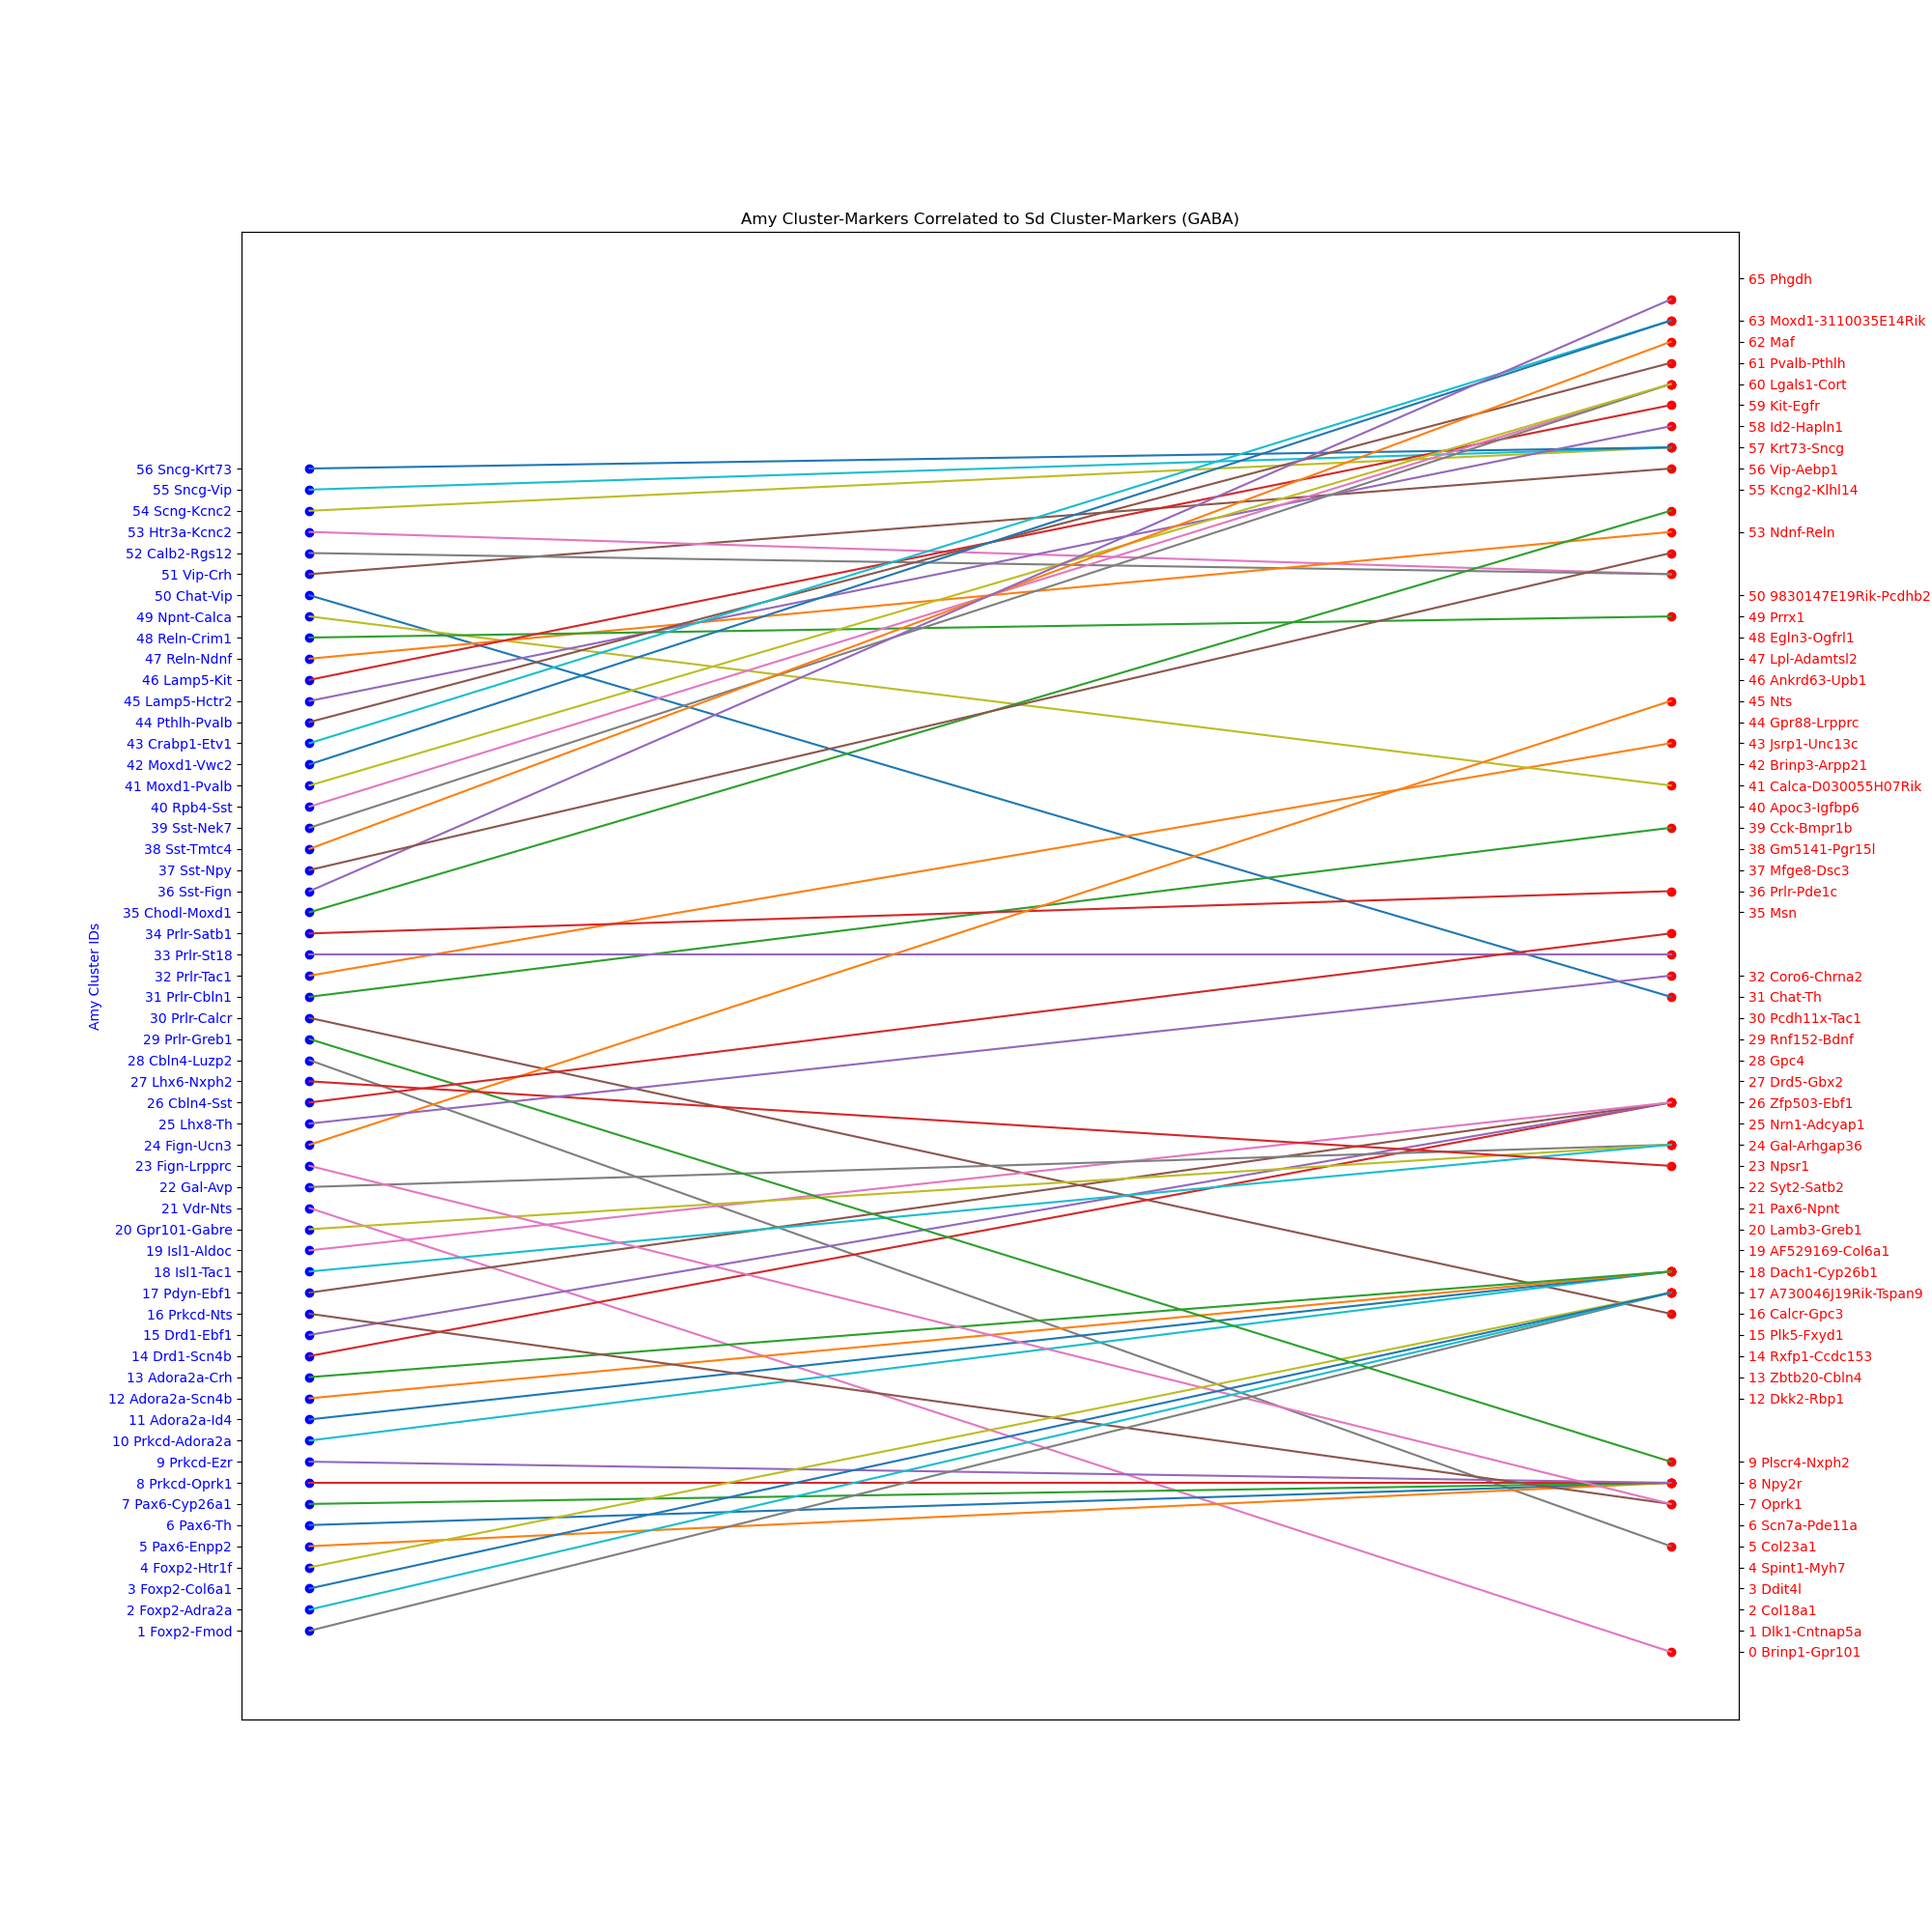

In [787]:
fig,ax1 = plt.subplots(figsize = (20,20))
ax1.set_title('Amy Cluster-Markers Correlated to Sd Cluster-Markers (GABA)')

ax2 = ax1.twinx()

x1 = np.zeros((1,len(connector_df_alt_lco['index'])))[0]
y1 = np.array(connector_df_alt_lco['index'])

x2 = np.ones((1,len(connector_df_alt_lco['corr_cluster'])))[0]
y2 = np.array(connector_df_alt_lco['corr_cluster'])

ax1.scatter(x = x1, 
            y = y1, color = 'b', label = 'amy_clusters')


ax1.set_yticks(ticks = np.sort(np.array(connector_df_alt_lco['index'])),labels = amy_labels)
#plt.xticks([])
ax1.set_xticks([])
ax1.set_ylabel('Amy Cluster IDs', color = 'b')
ax1.tick_params(labelcolor = 'b')



ax1.scatter(x = x2, 
            y = y2, color = 'r', label = 'sd_clusters')

for i in range(len(connector_df_alt_lco)):
    plt.plot([x1[i], x2[i]], [y1[i], y2[i]], '-') 
    

#plt.ylabel('cluster_id')
#plt.yticks(np.arange(1,57))


#plt.tight_layout()
ax2.set_yticks(ticks = sd_tics, labels = sd_labels)

ax2.set_ylabel('SD Cluster IDs', color = 'r')
ax2.tick_params(labelcolor = 'r')

#ax1.legend()
#plt.autoscale()
plt.savefig(folder+'gaba_connector_plot_amy_sd_lco_w_marker_labels_v2' + today + '.png')
plt.show()

In [ ]:
# update corr plots with marker pari labels

In [320]:
(corr_matrix_manual_alt_lco.columns)

Index([31, 12, 42, 43, 40, 39, 36, 55, 65, 33, 16, 38,  2, 20, 35,  0, 14,  4,
        5,  3, 15, 11, 10,  6, 21, 41, 37, 25, 18, 26, 22, 27, 24, 28,  8,  7,
       19, 17, 44, 46, 45,  9, 47, 50, 23,  1, 13, 29, 30, 32, 56, 51, 57, 53,
       48, 49, 59, 58, 61, 60, 63, 62, 54, 34, 64, 52],
      dtype='object')

In [790]:
sd_labels_df = pd.DataFrame(data = corr_matrix_manual_alt_lco_sorted.columns, columns = ['lco_index'])

In [791]:
sd_labels_df.insert(1, column= 'sd_label', value='')

In [792]:
sd_labels_df['sd_label'] = sd_labels_df['sd_label'].astype(object)

In [793]:
sd_labels_df

lco_index sd_label
0         31         
1         12         
2         42         
3         43         
4         40         
..       ...      ...
61        62         
62        54         
63        34         
64        64         
65        52         

[66 rows x 2 columns]

In [503]:
sd_labels_df.loc[sd_labels_df['lco_index']==12,['sd_label']]

sd_label
1

In [504]:
sd_labels_df.dtypes

lco_index    object
sd_label     object
dtype: object

In [505]:
sd_labels_df.at[0,'sd_label']

''

In [513]:
l = gaba_mg_cl_dict_final[31]

In [794]:
for i,v in enumerate(sd_labels_df['lco_index']):
    if v in gaba_mg_cl_dict_final.keys():
        #print (gaba_mg_cl_dict_final[i])
        l = gaba_mg_cl_dict_final[v]
        sd_labels_df.at[i,'sd_label'] = l
    

In [795]:
sd_labels_df

lco_index          sd_label
0         31        [Chat, Th]
1         12      [Dkk2, Rbp1]
2         42  [Brinp3, Arpp21]
3         43   [Jsrp1, Unc13c]
4         40   [Apoc3, Igfbp6]
..       ...               ...
61        62             [Maf]
62        54                []
63        34                []
64        64                []
65        52                []

[66 rows x 2 columns]

In [796]:
sd_labels_df['sd_label_complete'] = sd_labels_df.apply(lambda row: f"{row['lco_index']} {'-'.join(row['sd_label'])}", axis=1)

In [797]:
sd_labels_df

lco_index          sd_label sd_label_complete
0         31        [Chat, Th]        31 Chat-Th
1         12      [Dkk2, Rbp1]      12 Dkk2-Rbp1
2         42  [Brinp3, Arpp21]  42 Brinp3-Arpp21
3         43   [Jsrp1, Unc13c]   43 Jsrp1-Unc13c
4         40   [Apoc3, Igfbp6]   40 Apoc3-Igfbp6
..       ...               ...               ...
61        62             [Maf]            62 Maf
62        54                []               54 
63        34                []               34 
64        64                []               64 
65        52                []               52 

[66 rows x 3 columns]

In [ ]:
amy_labels = [f"{row['index']} {'-'.join(row['amy_marker'])}" for _, row in amy_labels.iterrows()]

In [542]:
#pos_xlabel = [(pos,xlabel) for pos,xlabel in zip(corr_matrix_manual_alt_lco_sorted.columns,np.array(sd_labels_df['sd_label_complete']))]

In [307]:
amy_labels_df = pd.DataFrame(data = amy_labels, index = corr_matrix_manual_alt_lco.index)

In [572]:
#ylabel_w_idx = [str(i)+ ':'+ s for i,s in pos_ylabel]

In [676]:
today

'2024-07-04'

In [798]:
#hack to get sd labels on x axis - set columns of corr_matrix to the labels... using xticks = pos_xlabel, same method as y ticks produces blank plot..
corr_matrix_manual_alt_lco_sorted_col_labeled = corr_matrix_manual_alt_lco_sorted.copy()
corr_matrix_manual_alt_lco_sorted_col_labeled.columns = sd_labels_df['sd_label_complete']

pos_ylabel = [(pos,ylabel) for pos,ylabel in zip(np.arange(len(corr_matrix_manual_alt_lco_sorted.index)),np.array(amy_labels_df.reindex(index = corr_matrix_manual_alt_lco_sorted.index)[0]))]
#ylabel_w_idx = [str(i)+ ':'+ s for i,s in pos_ylabel]
#pos_ylabel_w_idx = [(pos,ylabel) for pos,ylabel in zip(np.arange(len(corr_matrix_manual_alt_lco_sorted.index)),ylabel_w_idx)]
heatmap2 = corr_matrix_manual_alt_lco_sorted_col_labeled.reset_index().drop(columns='index').hvplot.heatmap(title='Arg Max sorted Amy_avgs (y) correlated with Sd_avgs_linkage_sorted (x)',  
                                                                                                yticks = corr_matrix_manual_alt_lco_sorted.index,
                                                                                                rot = 90,
                                                                                                #xticks = pos_xlabel,
                                                                                                cmap='viridis', width=900, height=900, colorbar=True)
heatmap2.opts(xlabel='Cluster IDs + Gene Markers (Sd_avgs)',ylabel='Cluster IDs + Gene Markers (Amy_avgs)', yticks = pos_ylabel)

#heatmap2.opts(xticks = pos_xlabel)

# Display the plot
hvplot.show(heatmap2)
    
# Ensure output is displayed inline
hv.output(heatmap2, backend='bokeh')

#save
folder = '/bigdata/isaac/gaba_files/'
panel_object = pn.pane.HoloViews(heatmap2)
pn.pane.HoloViews(heatmap2).save(folder+'gaba_corr_plot_amy_sd_lco_w_labels_v2' + today, embed=True, resources=INLINE)

Launching server at http://localhost:32803


:HeatMap   [columns,index]   (value)

In [799]:
#gaba_cl_mg_dict

In [800]:
gaba_cl_mg_dict_df = pd.DataFrame.from_dict(gaba_cl_mg_dict, orient='index').reset_index()

In [802]:
#gaba_cl_mg_dict

In [804]:
today

'2024-07-10'

In [805]:
folder

'/bigdata/isaac/gaba_files/'

In [807]:
gaba_cl_mg_dict_df.to_csv(folder + 'gaba_cl_mg_dict_df_' + today + '.csv')

In [610]:
#gaba_cl_mg_dict_df['markers'] = gaba_cl_mg_dict_df.apply(lambda row: [row[col] for col in gaba_cl_mg_dict_df.columns[1:] if row[col] is not None], axis=1)

# Keep only the 'index' and 'combined' columns
#gaba_cl_mg_dict_df = gaba_cl_mg_dict_df[['index', 'markers']]


In [611]:
#gaba_cl_mg_dict_df

index                                            markers
0     31  [[[Chat, Slc10a4, Th, Zic1, Lhx8, Pbx3, Ndrg1,...
1     12  [[[Prok2, Pdyn, Map3k15, Dkk2, Prdm13, Wfs1, R...
2     42  [[[Arpp21, Cartpt, Pappa, Dkk3, Rcn1, C1ql1, N...
3     43  [[[Crtac1, Jsrp1, Unc13c, None, None, None, No...
4     40  [[[Rprm, Igfbp6, None, None, None, None, None,...
..   ...                                                ...
57    58  [[[Cryab, Vcan, Hcrtr2, Id2, Hapln1, None, Non...
58    61  [[[Igfbp4, Thsd7a, Nek7, Pvalb, Tcap, Pthlh, N...
59    60  [[[Cort, Lgals1, Rbp4, Nxph1, Fam150b, None, N...
60    63  [[[3110035E14Rik, Mpped1, Tmem132c, Gpr83, Mox...
61    62  [[[Maf, None, None, None, None, None, None, No...

[62 rows x 2 columns]

In [684]:
gaba_cl_mg_dict['31']

['Chat',
 'Th',
 'Lhx8',
 'Isl1',
 'Ndrg1',
 'Pbx3',
 'Slc10a4',
 'Zic1',
 'Ngfr',
 'Slc5a7',
 'Slc18a3']

In [808]:
sd_labels

['0 Brinp1-Gpr101',
 '1 Dlk1-Cntnap5a',
 '2 Col18a1',
 '3 Ddit4l',
 '4 Spint1-Myh7',
 '5 Col23a1',
 '6 Scn7a-Pde11a',
 '7 Oprk1',
 '8 Npy2r',
 '9 Plscr4-Nxph2',
 '12 Dkk2-Rbp1',
 '13 Zbtb20-Cbln4',
 '14 Rxfp1-Ccdc153',
 '15 Plk5-Fxyd1',
 '16 Calcr-Gpc3',
 '17 A730046J19Rik-Tspan9',
 '18 Dach1-Cyp26b1',
 '19 AF529169-Col6a1',
 '20 Lamb3-Greb1',
 '21 Pax6-Npnt',
 '22 Syt2-Satb2',
 '23 Npsr1',
 '24 Gal-Arhgap36',
 '25 Nrn1-Adcyap1',
 '26 Zfp503-Ebf1',
 '27 Drd5-Gbx2',
 '28 Gpc4',
 '29 Rnf152-Bdnf',
 '30 Pcdh11x-Tac1',
 '31 Chat-Th',
 '32 Coro6-Chrna2',
 '35 Msn',
 '36 Prlr-Pde1c',
 '37 Mfge8-Dsc3',
 '38 Gm5141-Pgr15l',
 '39 Cck-Bmpr1b',
 '40 Apoc3-Igfbp6',
 '41 Calca-D030055H07Rik',
 '42 Brinp3-Arpp21',
 '43 Jsrp1-Unc13c',
 '44 Gpr88-Lrpprc',
 '45 Nts',
 '46 Ankrd63-Upb1',
 '47 Lpl-Adamtsl2',
 '48 Egln3-Ogfrl1',
 '49 Prrx1',
 '50 9830147E19Rik-Pcdhb22',
 '53 Ndnf-Reln',
 '55 Kcng2-Klhl14',
 '56 Vip-Aebp1',
 '57 Krt73-Sncg',
 '58 Id2-Hapln1',
 '59 Kit-Egfr',
 '60 Lgals1-Cort',
 '61 Pvalb-P

In [624]:
IEG_list

['Btg2',
 'Jun',
 'Egr4',
 'Fosb',
 'Junb',
 'Gadd45g',
 'Fos',
 'Arc',
 'Nr4a1',
 'Npas4',
 'Coq10b',
 'Tns1',
 'Per2',
 'Ptgs2',
 'Rnd3',
 'Tnfaip6',
 'Srxn1',
 'Tiparp',
 'Ccnl1',
 'Mcl1',
 'Dnajb5',
 'Nr4a3',
 'Fosl2',
 'Nptx2',
 'Rasl11a',
 'Mest',
 'Sertad1',
 'Egr2',
 'Midn',
 'Gadd45b',
 'Dusp6',
 'Irs2',
 'Plat',
 'Ier2',
 'Rrad',
 'Tpbg',
 'Csrnp1',
 'Peli1',
 'Per1',
 'Kdm6b',
 'Inhba',
 'Plk2',
 'Ifrd1',
 'Baz1a',
 'Trib1',
 'Pim3',
 'Lrrk2',
 'Dusp1',
 'Cdkn1a',
 'Pim1',
 'Sik1',
 'Frat2',
 'Dusp5']

## Vglut1 Analysis <a name="vglut1_analysis"></a>

In [ ]:
###################old/backup/scratch###################

In [ ]:
tips = sns.load_dataset("tips") 

In [ ]:
tips

In [ ]:
fig,ax = plt.subplots()
sns.stripplot(x="day", y="total_bill", data=tips, jitter = 0.1)
plt.show()

### corrwith() vs. corr() example

In [ ]:
np.random.seed(5)
index = ["g1", "g2", "g3", "g4", "g5"]
columns = ["one", "two", "three", "four","five"]
df1 = pd.DataFrame(np.random.rand(5,5), index=index, columns=columns)
df2 = pd.DataFrame(np.random.rand(5,4), index=index, columns=columns[:4])


In [ ]:
df1

In [ ]:
df2

In [ ]:
df1.corrwith(df2, axis=0)

In [ ]:
pd.concat([df1, df2],axis=1).corr()

In [ ]:

# Initialize an empty dataframe to hold the correlation coefficients
correlation_matrix_chat = pd.DataFrame(index=df1.columns, columns=df2.columns)

# Compute the correlation coefficients
for col1 in df1.columns:
    for col2 in df2.columns:
        correlation_matrix_chat.loc[col1, col2] = df1[col1].corr(df2[col2])

In [ ]:
correlation_matrix_chat

In [ ]:
np.random.rand(4,4)

In [ ]:
sd_avgs.columns

2024-06-07 gaba_cl_mg_dict is missing a few clusters for some reason, reran on 2024-06-27

In [ ]:

#with open('/bigdata/isaac/gaba_files/gaba_cl_mg_dict2024-06-07.json') as json_data:
    #gaba_cl_mg_dict = json.load(json_data)

In [ ]:
sorted(gaba_cl_mg_dict.items())

In [ ]:
gaba_cl_mg_dict['31']

In [ ]:
gaba_df_marker_log_and_std.index[:18]

In [ ]:
gaba_df_marker_log_and_std.shape

In [ ]:
gaba_df_marker

In [ ]:
gaba_meta_data_df_plis

In [ ]:
gaba_mean_marker_per_cluster = pd.DataFrame(columns=['gene', 'avg_expr','cluster_id'])
for k,v in gaba_cl_mg_dict.items():
    #print (k,v)
    tmp_df = pd.DataFrame({'gene':gaba_cl_mg_dict[k],
                           'avg_expr':np.array(gaba_df_marker.loc[gaba_cl_mg_dict[k],gaba_df_marker.iloc[:,np.where(gaba_meta_data_df_plis.loc['cluster_label']==int(k))[0]].columns].mean(axis=1)), 
                           'cluster_id':np.array(int(k)*np.ones(len(gaba_cl_mg_dict[k])))})
    gaba_mean_marker_per_cluster = pd.concat([gaba_mean_marker_per_cluster, tmp_df])

gaba_mean_marker_per_cluster

In [ ]:
np.where(gaba_meta_data_df_plis.loc['cluster_label']==31)[0]

In [ ]:
gaba_cl_mg_dict['63']

In [ ]:
def compute_class_marker_mean(df,meta_data_df,cl_mg_dict):
    '''
    For level 2 analysis. Computes average expression of each marker gene for a specific cell class (e.g. gaba)                  
    ----------------------------------------------------------------------
    Parameters

    df: pandas.core.frame.DataFrame
        marker gene expression dataframe of a single cell class
    meta_data_df: pandas.core.frame.DataFrame
        gene expression metadata corresponding to df
    cl_mg_dict: pandas.core.frame.DataFrame
        2D input array, typically output from tsne, in dataframe format
    ----------------------------------------------------------------------
    Returns
    mean_marker_per_cluster: pandas.core.frame.DataFrame
        dataframe storing marker gene, avg expression, and cluster ID
    '''
    mean_marker_per_cluster = pd.DataFrame(columns=['gene', 'avg_expr','cluster_id'])
    for k,v in cl_mg_dict.items():
        #print (k,v)
        tmp_df = pd.DataFrame({'gene':cl_mg_dict[k],
                               'avg_expr':np.array(df.loc[cl_mg_dict[k],df.iloc[:,np.where(meta_data_df.loc['cluster_label']==int(k))[0]].columns].mean(axis=1)), 
                               'cluster_id':np.array(int(k)*np.ones(len(cl_mg_dict[k])))})
        
        #print (tmp_df.head())
        mean_marker_per_cluster = pd.concat([mean_marker_per_cluster, tmp_df])

    return mean_marker_per_cluster 

In [ ]:
gaba_mean_marker_per_cluster = compute_class_marker_mean(gaba_df_marker, gaba_meta_data_df_plis, gaba_cl_mg_dict)

In [ ]:
gaba_mean_marker_per_cluster